# Business Problem: Flight Cancellations Prediction  



**Background:**
An airline company is facing challenges with flight cancellations, resulting in financial losses, customer dissatisfaction, and operational disruptions. Frequent cancellations lead to increased costs, loss of revenue, and a negative impact on the airline's reputation. The company aims to implement a proactive solution to predict and reduce the likelihood of flight cancellations.

**Objective:**
Develop a machine learning model that accurately predicts the probability of a flight being canceled based on historical data, enabling the airline to take preemptive measures to minimize cancellations and optimize its operations.

**Dataset:**
The dataset includes historical information on flights, airports, weather conditions, air traffic, and other relevant features. Key attributes include flight details (departure time, arrival time, airline, etc.), weather data, airport information, and any previous cancellation incidents.

**Challenges:**
1. **Imbalanced Classes:** The dataset is likely to have imbalanced classes, as flight cancellations are relatively rare compared to successful flights. Handling this class imbalance is crucial for model training and evaluation.

2. **Temporal Dynamics:** Flight cancellations may exhibit temporal patterns influenced by factors such as seasons, holidays, or specific days of the week. Capturing these temporal dynamics is essential for accurate predictions.

3. **Weather Dependency:** Weather conditions play a significant role in flight cancellations. Incorporating real-time weather data and understanding its impact on cancellations is vital.

4. **Operational Factors:** Factors such as airport congestion, air traffic control issues, and aircraft maintenance can contribute to cancellations. These operational aspects need to be considered for a comprehensive model.

**Expected Outcomes:**
1. A machine learning model capable of predicting the probability of flight cancellations for individual flights.
   
2. Insights into the most influential factors contributing to cancellations, allowing the airline to prioritize and address specific issues.

3. Proactive decision-making tools for airline staff to take preventive measures, such as rescheduling, notifying passengers in advance, and optimizing resource allocation.

4. Reduced financial losses, improved operational efficiency, and enhanced customer satisfaction by minimizing the impact of cancellations.

**Success Criteria:**
The machine learning model should achieve a high area under the ROC curve (AUC-ROC) or precision-recall curve, indicating its ability to discriminate between canceled and non-canceled flights effectively. Additionally, the model should be interpretable, allowing stakeholders to understand the key features influencing cancellation predictions.

Chunk Processing hints:

Make 2 chunks,do cleaning,processing,EDA,Model builing,model evaltuion of each chunk,write user defined functions for the same.

Aggregate results from each chunk,let say chunk1 std dev = 0.78,
				                  Chunk2 std dev = 1
																					Hence final aggregated std dev = 0.78+1/no_of_chunks=0.78/2.

Then use
•  Incremental Learning: Use a model that supports incremental learning (also known as online learning). This approach allows you to train a single model iteratively on each chunk, updating the model parameters with each new chunk.
•  Ensemble Methods: Train separate models on each chunk and then combine their predictions using ensemble methods like voting or averaging.
Build final modeland deploy it using any above method.	(bagging,boosting,voting)

can we combine .pickle file from 2chunks?
Combining .pickle files directly is not straightforward, as .pickle files are binary representations of Python objects. Instead, you need to load the models from the .pickle files, combine them using ensemble methods, and then save the combined model to a new .pickle file. Here's how you can achieve that:
1.	Train and Save Models on Each Chunk Separately
2.	Load the Saved Models
3.	Combine the Models using an Ensemble Method
4.	Save the Combined Model
Step 1: Train and Save Models on Each Chunk Separately
First, train individual models on different chunks and save each model to a .pickle file.


import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import joblib

chunk_size = 1000000

# Train model on first chunk and save
chunk1 = pd.read_csv('large_dataset.csv', chunksize=chunk_size).get_chunk()
X_chunk1 = chunk1.drop(columns=['target_column'])
y_chunk1 = chunk1['target_column']
model1 = LogisticRegression().fit(X_chunk1, y_chunk1)
joblib.dump(model1, 'model1.pkl')

# Train model on second chunk and save
chunk2 = pd.read_csv('large_dataset.csv', chunksize=chunk_size).get_chunk()
X_chunk2 = chunk2.drop(columns=['target_column'])
y_chunk2 = chunk2['target_column']
model2 = DecisionTreeClassifier().fit(X_chunk2, y_chunk2)
joblib.dump(model2, 'model2.pkl')
Step 2: Load the Saved Models
Load the models from the .pickle files.
# Load the models
model1 = joblib.load('model1.pkl')
model2 = joblib.load('model2.pkl')
Step 3: Combine the Models using an Ensemble Method
Combine the loaded models using a VotingClassifier.
python
Copy code
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2)
], voting='hard')
Step 4: Save the Combined Model
Save the combined model to a new .pickle file.
joblib.dump(ensemble_model, 'combined_voting_classifier.pkl')
Full Example
Here's the full process from training on chunks to combining and saving the models:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import joblib

# Train and save model on the first chunk
chunk1 = pd.read_csv('large_dataset.csv', chunksize=1000000).get_chunk()
X_chunk1 = chunk1.drop(columns=['target_column'])
y_chunk1 = chunk1['target_column']
model1 = LogisticRegression().fit(X_chunk1, y_chunk1)
joblib.dump(model1, 'model1.pkl')

# Train and save model on the second chunk
chunk2 = pd.read_csv('large_dataset.csv', chunksize=1000000).get_chunk()
X_chunk2 = chunk2.drop(columns=['target_column'])
y_chunk2 = chunk2['target_column']
model2 = DecisionTreeClassifier().fit(X_chunk2, y_chunk2)

In [ ]:
# Import Library That are needed 
import pandas as pd 
#from ydata_profiling import ProfileReport
pd.set_option('display.max_columns',None)
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats 
#from fancyimpute import KNN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#from xgboost import XGBClassifier
import plotly.express as px
from sklearn.metrics import f1_score,classification_report
import sys
sys.setrecursionlimit(100000000)  # Set a higher recursion limit (adjust as needed)
import imblearn
from collections import Counter
from imblearn.under_sampling import ClusterCentroids 
import joblib

## Below is primary dataset 

In [2]:
chunk1 = pd.read_csv('flights_sample_3m.csv', chunksize=100000).get_chunk()

In [3]:
chunk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  100000 non-null  object 
 1   AIRLINE                  100000 non-null  object 
 2   AIRLINE_DOT              100000 non-null  object 
 3   AIRLINE_CODE             100000 non-null  object 
 4   DOT_CODE                 100000 non-null  int64  
 5   FL_NUMBER                100000 non-null  int64  
 6   ORIGIN                   100000 non-null  object 
 7   ORIGIN_CITY              100000 non-null  object 
 8   DEST                     100000 non-null  object 
 9   DEST_CITY                100000 non-null  object 
 10  CRS_DEP_TIME             100000 non-null  int64  
 11  DEP_TIME                 97443 non-null   float64
 12  DEP_DELAY                97442 non-null   float64
 13  TAXI_OUT                 97414 non-null   float64
 14  WHEEL

In [4]:
chunk1.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


# checking dimensions 

In [5]:
chunk1.shape 

(100000, 32)

# checking class imbalance

In [6]:
chunk1['CANCELLED'].value_counts(normalize=True)

0.0    0.97404
1.0    0.02596
Name: CANCELLED, dtype: float64

# Sampling to 1 lakhs samples and gettting the chunks  

# Checking for redundant columns 

In [7]:
chunk1['AIRLINE_CODE'].unique()

array(['UA', 'DL', 'NK', 'WN', 'AA', 'YX', 'AS', 'B6', 'OH', 'G4', 'EV',
       'OO', '9E', 'MQ', 'F9', 'YV', 'QX', 'HA'], dtype=object)

In [8]:
chunk1['AIRLINE'].value_counts(normalize=True)

Southwest Airlines Co.                0.18911
Delta Air Lines Inc.                  0.13503
American Airlines Inc.                0.12678
SkyWest Airlines Inc.                 0.11569
United Air Lines Inc.                 0.08443
Republic Airline                      0.04863
Envoy Air                             0.04099
Endeavor Air Inc.                     0.03814
JetBlue Airways                       0.03704
PSA Airlines Inc.                     0.03595
Alaska Airlines Inc.                  0.03240
Spirit Air Lines                      0.03186
Frontier Airlines Inc.                0.02194
Mesa Airlines Inc.                    0.02119
Allegiant Air                         0.01737
Hawaiian Airlines Inc.                0.01069
Horizon Air                           0.00639
ExpressJet Airlines LLC d/b/a aha!    0.00637
Name: AIRLINE, dtype: float64

In [9]:
chunk1['AIRLINE'].nunique()

18

In [10]:
chunk1['AIRLINE'].unique()

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC d/b/a aha!',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

In [11]:
chunk1['AIRLINE_DOT'].nunique()

18

In [12]:
chunk1['AIRLINE_DOT'].unique()

array(['United Air Lines Inc.: UA', 'Delta Air Lines Inc.: DL',
       'Spirit Air Lines: NK', 'Southwest Airlines Co.: WN',
       'American Airlines Inc.: AA', 'Republic Airline: YX',
       'Alaska Airlines Inc.: AS', 'JetBlue Airways: B6',
       'PSA Airlines Inc.: OH', 'Allegiant Air: G4',
       'ExpressJet Airlines LLC d/b/a aha!: EV',
       'SkyWest Airlines Inc.: OO', 'Endeavor Air Inc.: 9E',
       'Envoy Air: MQ', 'Frontier Airlines Inc.: F9',
       'Mesa Airlines Inc.: YV', 'Horizon Air: QX',
       'Hawaiian Airlines Inc.: HA'], dtype=object)

In [13]:
chunk1['AIRLINE_DOT'].value_counts(normalize=True)

Southwest Airlines Co.: WN                0.18911
Delta Air Lines Inc.: DL                  0.13503
American Airlines Inc.: AA                0.12678
SkyWest Airlines Inc.: OO                 0.11569
United Air Lines Inc.: UA                 0.08443
Republic Airline: YX                      0.04863
Envoy Air: MQ                             0.04099
Endeavor Air Inc.: 9E                     0.03814
JetBlue Airways: B6                       0.03704
PSA Airlines Inc.: OH                     0.03595
Alaska Airlines Inc.: AS                  0.03240
Spirit Air Lines: NK                      0.03186
Frontier Airlines Inc.: F9                0.02194
Mesa Airlines Inc.: YV                    0.02119
Allegiant Air: G4                         0.01737
Hawaiian Airlines Inc.: HA                0.01069
Horizon Air: QX                           0.00639
ExpressJet Airlines LLC d/b/a aha!: EV    0.00637
Name: AIRLINE_DOT, dtype: float64

In [14]:
chunk1['AIRLINE_CODE'].unique()

array(['UA', 'DL', 'NK', 'WN', 'AA', 'YX', 'AS', 'B6', 'OH', 'G4', 'EV',
       'OO', '9E', 'MQ', 'F9', 'YV', 'QX', 'HA'], dtype=object)

In [15]:
chunk1['AIRLINE_CODE'].nunique()

18

In [16]:
chunk1['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.18911
DL    0.13503
AA    0.12678
OO    0.11569
UA    0.08443
YX    0.04863
MQ    0.04099
9E    0.03814
B6    0.03704
OH    0.03595
AS    0.03240
NK    0.03186
F9    0.02194
YV    0.02119
G4    0.01737
HA    0.01069
QX    0.00639
EV    0.00637
Name: AIRLINE_CODE, dtype: float64

In [17]:
chunk1['ORIGIN'].nunique()

375

In [18]:
chunk1['ORIGIN'].unique()

array(['FLL', 'MSP', 'DEN', 'MCO', 'DAL', 'DCA', 'HSV', 'IAH', 'SEA',
       'ATL', 'RDU', 'MDW', 'BDL', 'SJC', 'BWI', 'STT', 'SRQ', 'JFK',
       'GRR', 'DFW', 'CLT', 'ORD', 'LAS', 'TUL', 'USA', 'SLC', 'BNA',
       'AUS', 'IND', 'MHT', 'SFO', 'PRC', 'BOS', 'LAX', 'SMF', 'DTW',
       'SAT', 'MSY', 'CMH', 'STL', 'SJU', 'PHX', 'TPA', 'LGA', 'PHL',
       'GRK', 'ILM', 'JLN', 'MKE', 'BIL', 'BLI', 'CHS', 'RIC', 'GSO',
       'MCI', 'EWR', 'ELP', 'SDF', 'HPN', 'SAN', 'BHM', 'ASE', 'HNL',
       'MAF', 'BUF', 'TUS', 'SYR', 'MSN', 'FAT', 'FWA', 'LAN', 'ABI',
       'ICT', 'CMI', 'IAD', 'OAK', 'EUG', 'MIA', 'CHA', 'BTV', 'RSW',
       'PDX', 'SNA', 'PIT', 'OGG', 'HRL', 'BIS', 'SHR', 'BOI', 'RNO',
       'SBP', 'GSP', 'MLB', 'GRB', 'CRW', 'LGB', 'OKC', 'PVD', 'YAK',
       'CID', 'FSD', 'HYS', 'VPS', 'ROC', 'SAV', 'CLE', 'RDD', 'ANC',
       'DVL', 'SWO', 'BUR', 'PIR', 'HOU', 'PBI', 'MLI', 'AZA', 'MKG',
       'PNS', 'MYR', 'GTF', 'LSE', 'RDM', 'ORF', 'KOA', 'MQT', 'COS',
       'CVG', 'MOB',

In [19]:
chunk1['ORIGIN_CITY'].unique()

array(['Fort Lauderdale, FL', 'Minneapolis, MN', 'Denver, CO',
       'Orlando, FL', 'Dallas, TX', 'Washington, DC', 'Huntsville, AL',
       'Houston, TX', 'Seattle, WA', 'Atlanta, GA', 'Raleigh/Durham, NC',
       'Chicago, IL', 'Hartford, CT', 'San Jose, CA', 'Baltimore, MD',
       'Charlotte Amalie, VI', 'Sarasota/Bradenton, FL', 'New York, NY',
       'Grand Rapids, MI', 'Dallas/Fort Worth, TX', 'Charlotte, NC',
       'Las Vegas, NV', 'Tulsa, OK', 'Concord, NC', 'Salt Lake City, UT',
       'Nashville, TN', 'Austin, TX', 'Indianapolis, IN',
       'Manchester, NH', 'San Francisco, CA', 'Prescott, AZ',
       'Boston, MA', 'Los Angeles, CA', 'Sacramento, CA', 'Detroit, MI',
       'San Antonio, TX', 'New Orleans, LA', 'Columbus, OH',
       'St. Louis, MO', 'San Juan, PR', 'Phoenix, AZ', 'Tampa, FL',
       'Philadelphia, PA', 'Killeen, TX', 'Wilmington, NC', 'Joplin, MO',
       'Milwaukee, WI', 'Billings, MT', 'Bellingham, WA',
       'Charleston, SC', 'Richmond, VA', 'Greensbo

# From above 3 features :airline_code,airline,airline_dot gives same information,so we can keep only 1 column airline_code and drop remaining two

In [20]:
chunk1['CANCELLATION_CODE'].unique()

array([nan, 'D', 'B', 'A', 'C'], dtype=object)

In [21]:
chunk1['DELAY_DUE_CARRIER'].nunique()

426

In [22]:
chunk1['DELAY_DUE_CARRIER'].unique()

array([      nan, 0.000e+00, 1.410e+02, 6.000e+01, 5.700e+01, 3.100e+01,
       7.100e+01, 2.000e+01, 1.100e+02, 2.200e+01, 1.000e+00, 1.000e+01,
       7.800e+01, 4.000e+00, 3.800e+01, 3.000e+00, 2.500e+01, 3.500e+01,
       1.600e+01, 3.000e+01, 1.200e+01, 2.400e+01, 7.000e+00, 2.000e+00,
       1.700e+01, 6.000e+00, 2.600e+01, 3.200e+01, 1.800e+01, 2.300e+01,
       3.600e+01, 1.370e+02, 1.400e+01, 4.000e+01, 1.900e+01, 1.500e+01,
       4.370e+02, 3.300e+01, 6.400e+01, 4.300e+01, 8.000e+01, 6.600e+01,
       1.190e+02, 1.090e+02, 5.400e+01, 5.000e+00, 1.300e+02, 2.100e+01,
       8.000e+00, 3.400e+01, 9.000e+00, 5.500e+01, 3.900e+01, 4.200e+01,
       2.900e+01, 6.800e+01, 1.170e+02, 1.570e+02, 1.300e+01, 4.100e+01,
       2.800e+01, 4.900e+01, 1.880e+02, 9.100e+01, 2.700e+01, 1.440e+02,
       1.240e+02, 8.300e+01, 1.100e+01, 2.290e+02, 9.400e+01, 2.310e+02,
       1.120e+02, 5.900e+01, 1.330e+02, 5.800e+01, 4.700e+01, 5.100e+01,
       2.510e+02, 5.600e+01, 4.400e+01, 8.400e+01, 

In [23]:
chunk1['CANCELLATION_CODE'].value_counts()

B    952
D    813
A    623
C    208
Name: CANCELLATION_CODE, dtype: int64

# Checking for Null values 

In [24]:
chunk1['CANCELLATION_CODE'].isnull().sum()

97404

In [25]:
chunk1['DELAY_DUE_CARRIER'].isnull().sum()

82239

In [26]:
chunk1['DELAY_DUE_LATE_AIRCRAFT'].isnull().sum()

82239

In [27]:
chunk1['DELAY_DUE_NAS'].isnull().sum()

82239

In [28]:
chunk1['DELAY_DUE_WEATHER'].isnull().sum()

82239

In [29]:
chunk1['DELAY_DUE_SECURITY'].isnull().sum()

82239

In [30]:
chunk1['CANCELLED'].value_counts()

0.0    97404
1.0     2596
Name: CANCELLED, dtype: int64

In [31]:
chunk1['DIVERTED'].value_counts(normalize=True)*100

0.0    99.801
1.0     0.199
Name: DIVERTED, dtype: float64

In [32]:
chunk1.head(1)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN


In [33]:
from scipy.stats import chi2_contingency

In [34]:
 chi2_contingency(pd.crosstab(chunk1.DIVERTED,chunk1.CANCELLED))

Chi2ContingencyResult(statistic=4.335382952271209, pvalue=0.037328017923832515, dof=1, expected_freq=array([[9.72101660e+04, 2.59083396e+03],
       [1.93833960e+02, 5.16604000e+00]]))

# From above we can say that cancelled and diverted as an association but since the flights that are diverted will not have further information about the next connecting destination so dropping it is preferred 

In [35]:
chunk1['AIRLINE_CODE'].value_counts()

WN    18911
DL    13503
AA    12678
OO    11569
UA     8443
YX     4863
MQ     4099
9E     3814
B6     3704
OH     3595
AS     3240
NK     3186
F9     2194
YV     2119
G4     1737
HA     1069
QX      639
EV      637
Name: AIRLINE_CODE, dtype: int64

In [36]:
chunk1['DOT_CODE'].value_counts()

19393    18911
19790    13503
19805    12678
20304    11569
19977     8443
20452     4863
20398     4099
20363     3814
20409     3704
20397     3595
19930     3240
20416     3186
20436     2194
20378     2119
20368     1737
19690     1069
19687      639
20366      637
Name: DOT_CODE, dtype: int64

In [37]:
chunk1['CANCELLED'].value_counts()

0.0    97404
1.0     2596
Name: CANCELLED, dtype: int64

<Axes: xlabel='AIRLINE_CODE', ylabel='count'>

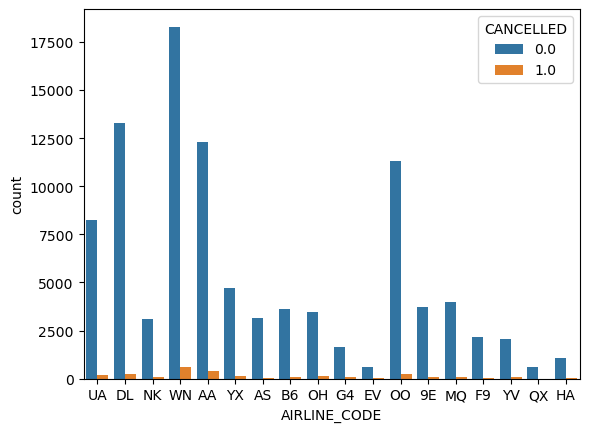

In [38]:
# WHICH AIRLNE HAS MAXIMUN CANCELLATIONS 
sns.countplot(x=chunk1['AIRLINE_CODE'],hue=chunk1['CANCELLED'])

#WN AIRLINE HAS HIGHEST CANCELLED FLIGHTS THAN OTHERS


<Axes: xlabel='AIRLINE_CODE', ylabel='count'>

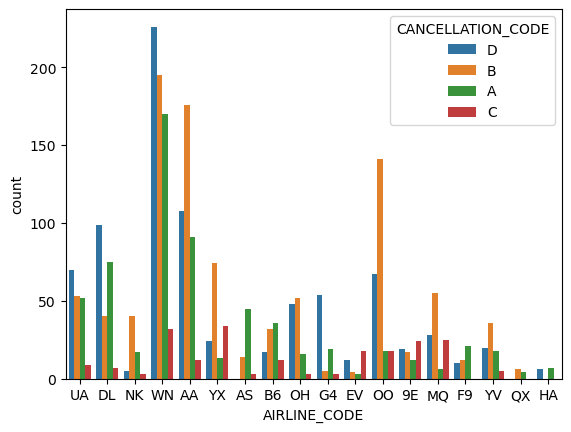

In [39]:
# REASONS BEHIND CANCELLATION

sns.countplot(x=chunk1['AIRLINE_CODE'],hue=chunk1['CANCELLATION_CODE'])

# WN MADEJAST CANCELLED THEN AA
# WN HAS HIGHEST CANCELLATION,REASON IS MAXIMUM D,THEN B
#AA made B maximum reason aahe,then D

In [40]:
chunk1['CANCELLED'] = chunk1['CANCELLED'].replace({0.0:0,1.0:1})

# Dropping redundant and not useful columns 

In [41]:
chunk1.drop(columns=['AIRLINE','AIRLINE_DOT','DOT_CODE','ORIGIN_CITY','DEST_CITY','DIVERTED','CRS_ARR_TIME','ARR_TIME','CRS_DEP_TIME','DEP_TIME','ELAPSED_TIME'],axis=1,inplace=True)

# Null value Treatment for delay columns
Logic to fill with 0 is because in the dataset the flights having the no delay they are on time 

In [42]:
chunk1['DELAY_DUE_CARRIER']=chunk1['DELAY_DUE_CARRIER'].fillna(0)

In [43]:
chunk1['DELAY_DUE_LATE_AIRCRAFT']=chunk1['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)
chunk1['DELAY_DUE_NAS']=chunk1['DELAY_DUE_NAS'].fillna(0)
chunk1['DELAY_DUE_SECURITY']=chunk1['DELAY_DUE_SECURITY'].fillna(0)
chunk1['DELAY_DUE_WEATHER']=chunk1['DELAY_DUE_WEATHER'].fillna(0)
chunk1['CANCELLATION_CODE']=chunk1['CANCELLATION_CODE'].fillna(0)

# Splitting FL_DATE into 3 columns FlightYear,FlightDay,FlightMonth

In [44]:
chunk1['FlightYear']=chunk1['FL_DATE'].apply(lambda x:int(x.split('-')[0]))
chunk1['FlightDay']=chunk1['FL_DATE'].apply(lambda x:int(x.split('-')[2]))
chunk1['FlightMonth']=chunk1['FL_DATE'].apply(lambda x:int(x.split('-')[1]))

In [45]:
chunk1.drop(columns='FL_DATE',axis=0,inplace=True)

In [46]:
chunk1.reset_index(inplace=True)

In [47]:
chunk1.head(1)

,index,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,0,UA,1562,FLL,EWR,-4.0,19.0,1210.0,1443.0,4.0,-14.0,0.0,0,186.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,9,1


In [48]:
chunk1.drop('index',axis=1,inplace=True)

# Since we are predicting flight cancellation for normal scenario we will drop the covid data i.e. March 2020 data 

In [49]:
chunk1 = chunk1[~((chunk1.FlightYear==2020) & (chunk1.FlightMonth==3) )]
chunk1

,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,UA,1562,FLL,EWR,-4.0,19.0,1210.0,1443.0,4.0,-14.0,0.0,0,186.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,9,1
1,DL,1149,MSP,SEA,-6.0,9.0,2123.0,2232.0,38.0,-5.0,0.0,0,235.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,2022,19,11
2,UA,459,DEN,MSP,6.0,20.0,1020.0,1247.0,5.0,0.0,0.0,0,118.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,2022,22,7
3,DL,2295,MSP,SFO,-1.0,27.0,1635.0,1844.0,9.0,24.0,0.0,0,260.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,2023,6,3
4,NK,407,MCO,DFW,-2.0,15.0,1853.0,2026.0,14.0,-1.0,0.0,0,181.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,2020,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,OO,3991,SEA,BOI,8.0,13.0,1531.0,1723.0,3.0,-13.0,0.0,0,89.0,52.0,399.0,0.0,0.0,0.0,0.0,0.0,2019,11,12
99996,WN,343,ATL,DAL,108.0,11.0,1929.0,2029.0,4.0,108.0,0.0,0,135.0,120.0,721.0,0.0,0.0,108.0,0.0,0.0,2021,4,11
99997,YX,4651,SRQ,DCA,-3.0,50.0,1229.0,1425.0,4.0,29.0,0.0,0,138.0,116.0,851.0,0.0,0.0,29.0,0.0,0.0,2020,26,12
99998,AA,1469,DFW,RSW,-5.0,17.0,727.0,1036.0,3.0,-11.0,0.0,0,155.0,129.0,1017.0,0.0,0.0,0.0,0.0,0.0,2019,20,10


<Axes: xlabel='FlightYear', ylabel='FL_NUMBER'>

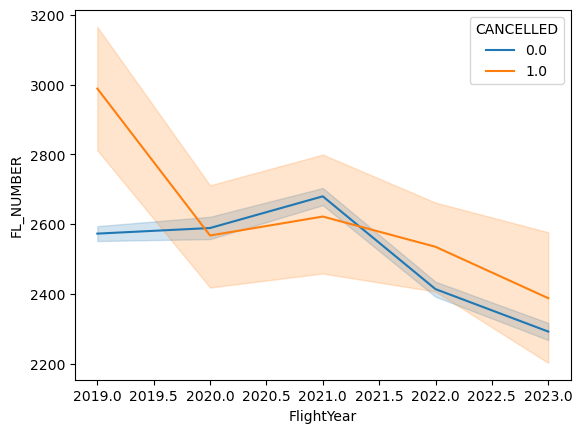

In [50]:
sns.lineplot(x=chunk1['FlightYear'],y=chunk1['FL_NUMBER'],hue=chunk1['CANCELLED'])

#2019 made highest flights cancel,then steap decrease,then after 2020 steapincrease 2021 2nd highest cancelled flights.

<Axes: xlabel='FlightMonth', ylabel='FL_NUMBER'>

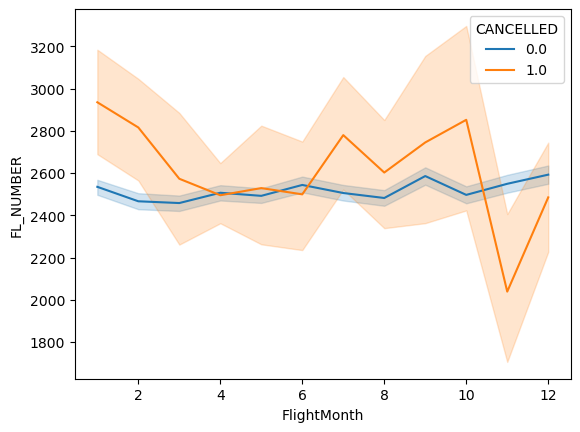

In [51]:
sns.lineplot(x=chunk1['FlightMonth'],y=chunk1['FL_NUMBER'],hue=chunk1['CANCELLED'])

# 6,8  month made =1 flights jast cancel hotat with flightnumber =2900

In [52]:
chunk1.describe()

,FL_NUMBER,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
count,97764.000000,95565.000000,95538.000000,95538.000000,95507.000000,95507.000000,95333.000000,97764.000000,97762.000000,95333.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000
mean,2518.144051,10.367446,16.668844,1350.317539,1460.365942,7.736438,4.549915,0.022871,142.037018,112.067626,807.655241,4.644071,0.748271,2.288849,0.025388,4.540659,2020.894225,15.749397,6.314799
std,1743.064404,50.153165,9.201122,501.400717,527.281739,6.331721,52.079040,0.149494,71.178570,69.354607,585.192296,33.469210,15.069632,14.055648,1.483338,25.065885,1.425801,8.762046,3.375567
min,1.000000,-68.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,20.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000
25%,1065.000000,-6.000000,11.000000,930.000000,1048.000000,4.000000,-15.000000,0.000000,90.000000,61.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,8.000000,3.000000
50%,2163.000000,-2.000000,14.000000,1333.000000,1459.000000,6.000000,-7.000000,0.000000,125.000000,95.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,16.000000,6.000000
75%,3786.000000,7.000000,19.000000,1751.000000,1907.000000,9.000000,7.000000,0.000000,172.000000,142.000000,1045.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,23.000000,9.000000
max,8814.000000,1643.000000,172.000000,2400.000000,2400.000000,222.000000,1644.000000,1.000000,685.000000,661.000000,5095.000000,1643.000000,1230.000000,1124.000000,286.000000,1321.000000,2023.000000,31.000000,12.000000


In [53]:
chunk1['ORIGIN'].nunique()

375

In [54]:
chunk1['DEST'].nunique()

368

In [55]:
chunk1['AIRLINE_CODE'].value_counts()
# frequncy encoding as different counts for each category
chunk1['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.189497
DL    0.134825
AA    0.126662
OO    0.115810
UA    0.084561
YX    0.048730
MQ    0.040864
9E    0.038092
B6    0.037018
OH    0.035923
AS    0.032323
NK    0.032016
F9    0.022012
YV    0.021061
G4    0.017389
HA    0.010669
QX    0.006536
EV    0.006014
Name: AIRLINE_CODE, dtype: float64

<Axes: >

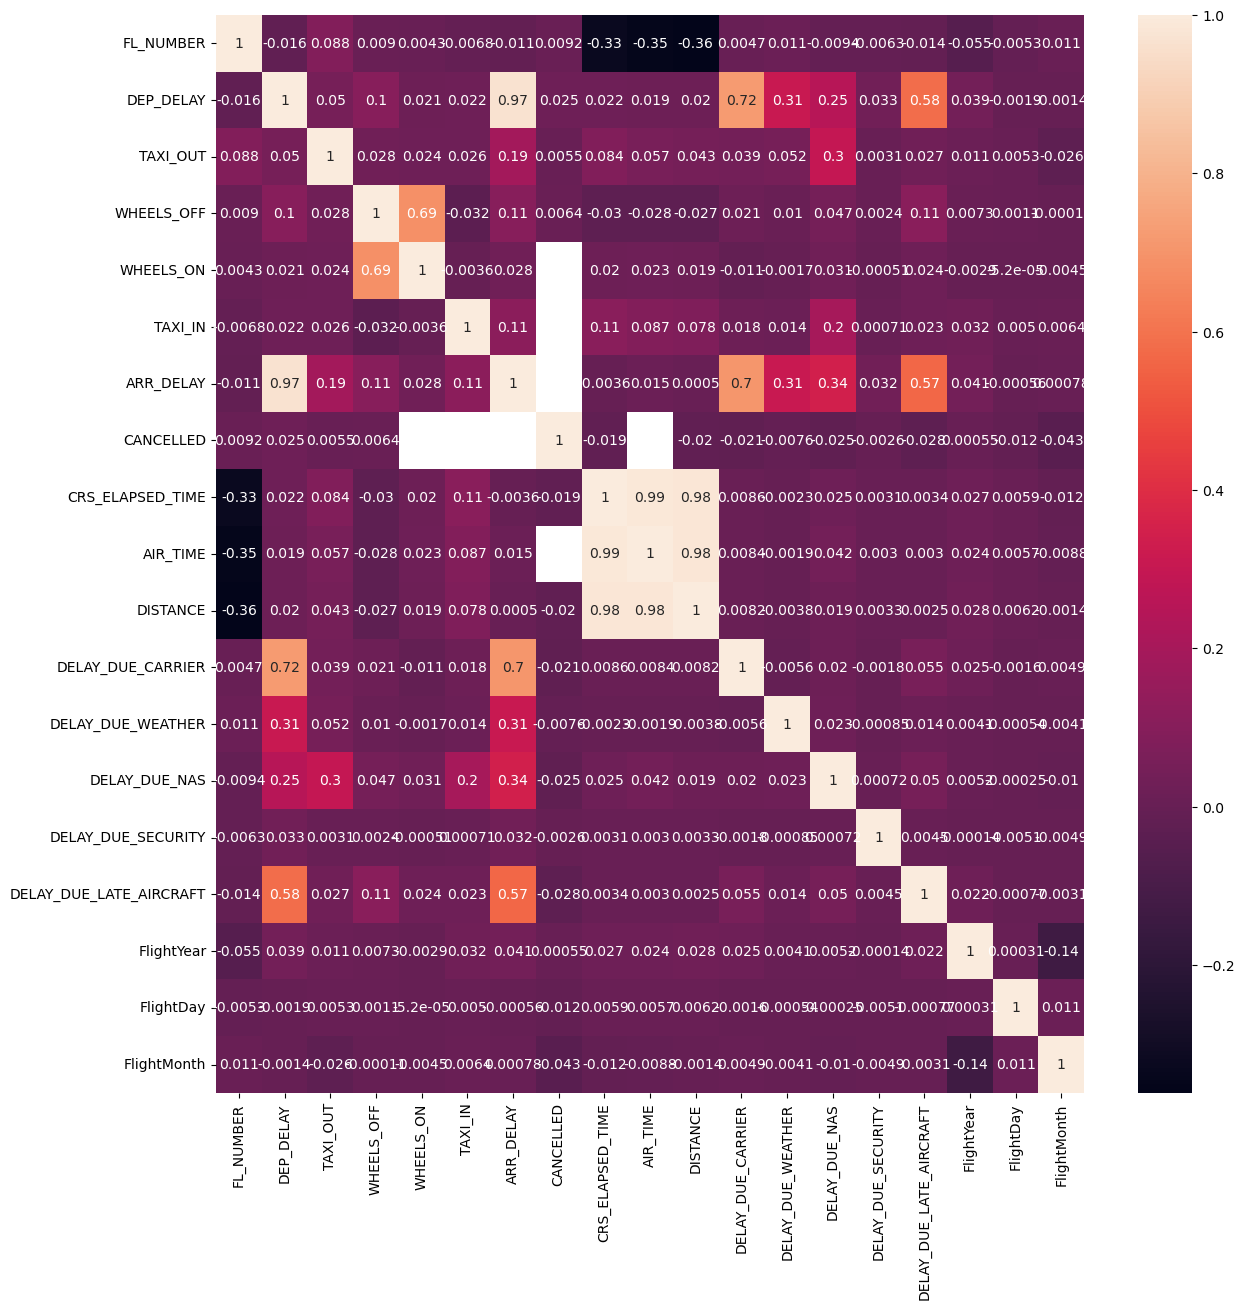

In [56]:
plt.figure(figsize=[14,14])


sns.heatmap(chunk1.select_dtypes(exclude='object').corr(),annot=True)


# Converting the Categorical into numeric for machine learning model 

# FREQUENCY/PERCENTAGE ENCODING,CATBOOST ENCODING

In [57]:
d = chunk1['AIRLINE_CODE'].value_counts(normalize=True).to_dict()
chunk1['AIRLINE_CODE_en'] = chunk1['AIRLINE_CODE'].map(d)
chunk1.drop(columns='AIRLINE_CODE',axis=1,inplace=True)

In [58]:
import  category_encoders as ce 
def catboost(catin , tar):
    catboo=ce.cat_boost.CatBoostEncoder()
    catboo.fit(catin,tar)
    chunk1_encode=catboo.transform(catin)
    
    return chunk1_encode

# CAT BOOST ENCONDING FOR ORIGIN AND DEST

In [59]:
chunk1['ORIGIN'] = catboost(chunk1.ORIGIN, chunk1.CANCELLED)
chunk1['DEST'] = catboost(chunk1.DEST, chunk1.CANCELLED)

In [60]:
chunk1['CANCELLATION_CODE'].isnull().sum()

0

In [61]:
chunk1['CANCELLATION_CODE'].value_counts()

0    95528
B      951
A      592
D      488
C      205
Name: CANCELLATION_CODE, dtype: int64

# FREQUENCY ENCODING FOR CANCELLATION_CODE

In [62]:
v = chunk1['CANCELLATION_CODE'].value_counts(normalize=True).to_dict()
chunk1['CANCELLATION_CODE'] = chunk1['CANCELLATION_CODE'].replace({'B': 0.00957, 'D': 0.008212, 'A': 0.006503, 'C': 0.002115})
chunk1['CANCELLATION_CODE'].astype('float')




0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: CANCELLATION_CODE, Length: 97764, dtype: float64

In [63]:
chunk1.isnull().sum()

FL_NUMBER                     0
ORIGIN                        0
DEST                          0
DEP_DELAY                  2199
TAXI_OUT                   2226
WHEELS_OFF                 2226
WHEELS_ON                  2257
TAXI_IN                    2257
ARR_DELAY                  2431
CANCELLED                     0
CANCELLATION_CODE             0
CRS_ELAPSED_TIME              2
AIR_TIME                   2431
DISTANCE                      0
DELAY_DUE_CARRIER             0
DELAY_DUE_WEATHER             0
DELAY_DUE_NAS                 0
DELAY_DUE_SECURITY            0
DELAY_DUE_LATE_AIRCRAFT       0
FlightYear                    0
FlightDay                     0
FlightMonth                   0
AIRLINE_CODE_en               0
dtype: int64

# Handling imbalanced dataset with different methods

1.Centroid based undersampling


2.SMOTE oversampling




# 1.Centroid based undersampling

In [64]:
chunk1.isnull().sum()

FL_NUMBER                     0
ORIGIN                        0
DEST                          0
DEP_DELAY                  2199
TAXI_OUT                   2226
WHEELS_OFF                 2226
WHEELS_ON                  2257
TAXI_IN                    2257
ARR_DELAY                  2431
CANCELLED                     0
CANCELLATION_CODE             0
CRS_ELAPSED_TIME              2
AIR_TIME                   2431
DISTANCE                      0
DELAY_DUE_CARRIER             0
DELAY_DUE_WEATHER             0
DELAY_DUE_NAS                 0
DELAY_DUE_SECURITY            0
DELAY_DUE_LATE_AIRCRAFT       0
FlightYear                    0
FlightDay                     0
FlightMonth                   0
AIRLINE_CODE_en               0
dtype: int64

In [65]:
chunk1.describe()

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
count,97764.000000,97764.000000,97764.000000,95565.000000,95538.000000,95538.000000,95507.000000,95507.000000,95333.000000,97764.000000,97764.000000,97762.000000,95333.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000
mean,2518.144051,0.022871,0.022861,10.367446,16.668844,1350.317539,1460.365942,7.736438,4.549915,0.022871,0.000178,142.037018,112.067626,807.655241,4.644071,0.748271,2.288849,0.025388,4.540659,2020.894225,15.749397,6.314799,0.102342
std,1743.064404,0.010707,0.011247,50.153165,9.201122,501.400717,527.281739,6.331721,52.079040,0.149494,0.001209,71.178570,69.354607,585.192296,33.469210,15.069632,14.055648,1.483338,25.065885,1.425801,8.762046,3.375567,0.058323
min,1.000000,0.000194,0.000124,-68.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,0.000000,20.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.006014
25%,1065.000000,0.017517,0.016420,-6.000000,11.000000,930.000000,1048.000000,4.000000,-15.000000,0.000000,0.000000,90.000000,61.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,8.000000,3.000000,0.038092
50%,2163.000000,0.021745,0.022429,-2.000000,14.000000,1333.000000,1459.000000,6.000000,-7.000000,0.000000,0.000000,125.000000,95.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,16.000000,6.000000,0.115810
75%,3786.000000,0.028230,0.027352,7.000000,19.000000,1751.000000,1907.000000,9.000000,7.000000,0.000000,0.000000,172.000000,142.000000,1045.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,23.000000,9.000000,0.134825
max,8814.000000,0.288982,0.255718,1643.000000,172.000000,2400.000000,2400.000000,222.000000,1644.000000,1.000000,0.009570,685.000000,661.000000,5095.000000,1643.000000,1230.000000,1124.000000,286.000000,1321.000000,2023.000000,31.000000,12.000000,0.189497


# NULL VALUE TREATMENT FOR COLUMNS OTHER THAN DELAY 

In [66]:
chunk1['WHEELS_OFF'] = chunk1['WHEELS_OFF'].fillna(chunk1['WHEELS_OFF'].median())
chunk1['WHEELS_ON'] = chunk1['WHEELS_ON'].fillna(chunk1['WHEELS_ON'].median())
chunk1['TAXI_IN'] = chunk1['TAXI_IN'].fillna(chunk1['TAXI_IN'].median())
chunk1['ARR_DELAY'] = chunk1['ARR_DELAY'].fillna(0)
chunk1['AIR_TIME'] = chunk1['AIR_TIME'].fillna(chunk1['AIR_TIME'].median())
chunk1['TAXI_OUT'] = chunk1['TAXI_OUT'].fillna(np.mean(chunk1['TAXI_OUT']))

chunk1['DEP_DELAY'] = chunk1['DEP_DELAY'].fillna(0)
chunk1['CRS_ELAPSED_TIME'] = chunk1['CRS_ELAPSED_TIME'].fillna(0)

In [67]:
chunk1.isnull().sum()

FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
CRS_ELAPSED_TIME           0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FlightYear                 0
FlightDay                  0
FlightMonth                0
AIRLINE_CODE_en            0
dtype: int64

In [68]:
chunk1['CANCELLED'] = chunk1['CANCELLED'].astype(int)

# Dividing into X(predictors ) and y(Target) 

In [69]:
X = chunk1.drop(["CANCELLED"],axis=1)
y =chunk1['CANCELLED']

In [70]:
X.isnull().sum()

FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_DELAY                  0
CANCELLATION_CODE          0
CRS_ELAPSED_TIME           0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FlightYear                 0
FlightDay                  0
FlightMonth                0
AIRLINE_CODE_en            0
dtype: int64

In [71]:
chunk1[chunk1['CRS_ELAPSED_TIME'].isnull()==True]

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en


# CLUSTER CENTROID UNDERSAMPLING

In [72]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE, RandomOverSampler

class HandleImbalance:
    def __init__(self, df):
        self.df = df
        self.X = df.drop(["CANCELLED"], axis=1)
        self.y = df['CANCELLED']

    def undersample(self):
        cc = ClusterCentroids(random_state=42)
        X_res, y_res = cc.fit_resample(self.X, self.y)
        return X_res, y_res

    def oversample_smote(self):
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(self.X, self.y)
        return X_res, y_res

    def oversample_random(self):
        ros = RandomOverSampler(random_state=42)
        X_res, y_res = ros.fit_resample(self.X, self.y)
        return X_res, y_res



handle_imbalance = HandleImbalance(chunk1)
X_res_undersample, y_res_undersample = handle_imbalance.undersample()
X_res_smote, y_res_smote = handle_imbalance.oversample_smote()
X_res_random, y_res_random = handle_imbalance.oversample_random()


C:\Users\ashwi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [73]:
from sklearn.pipeline import Pipeline

In [74]:
X_res_undersample.columns

Index(['FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CANCELLATION_CODE',
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth',
       'AIRLINE_CODE_en'],
      dtype='object')

In [75]:
X_out = X_res_undersample[['FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth']]

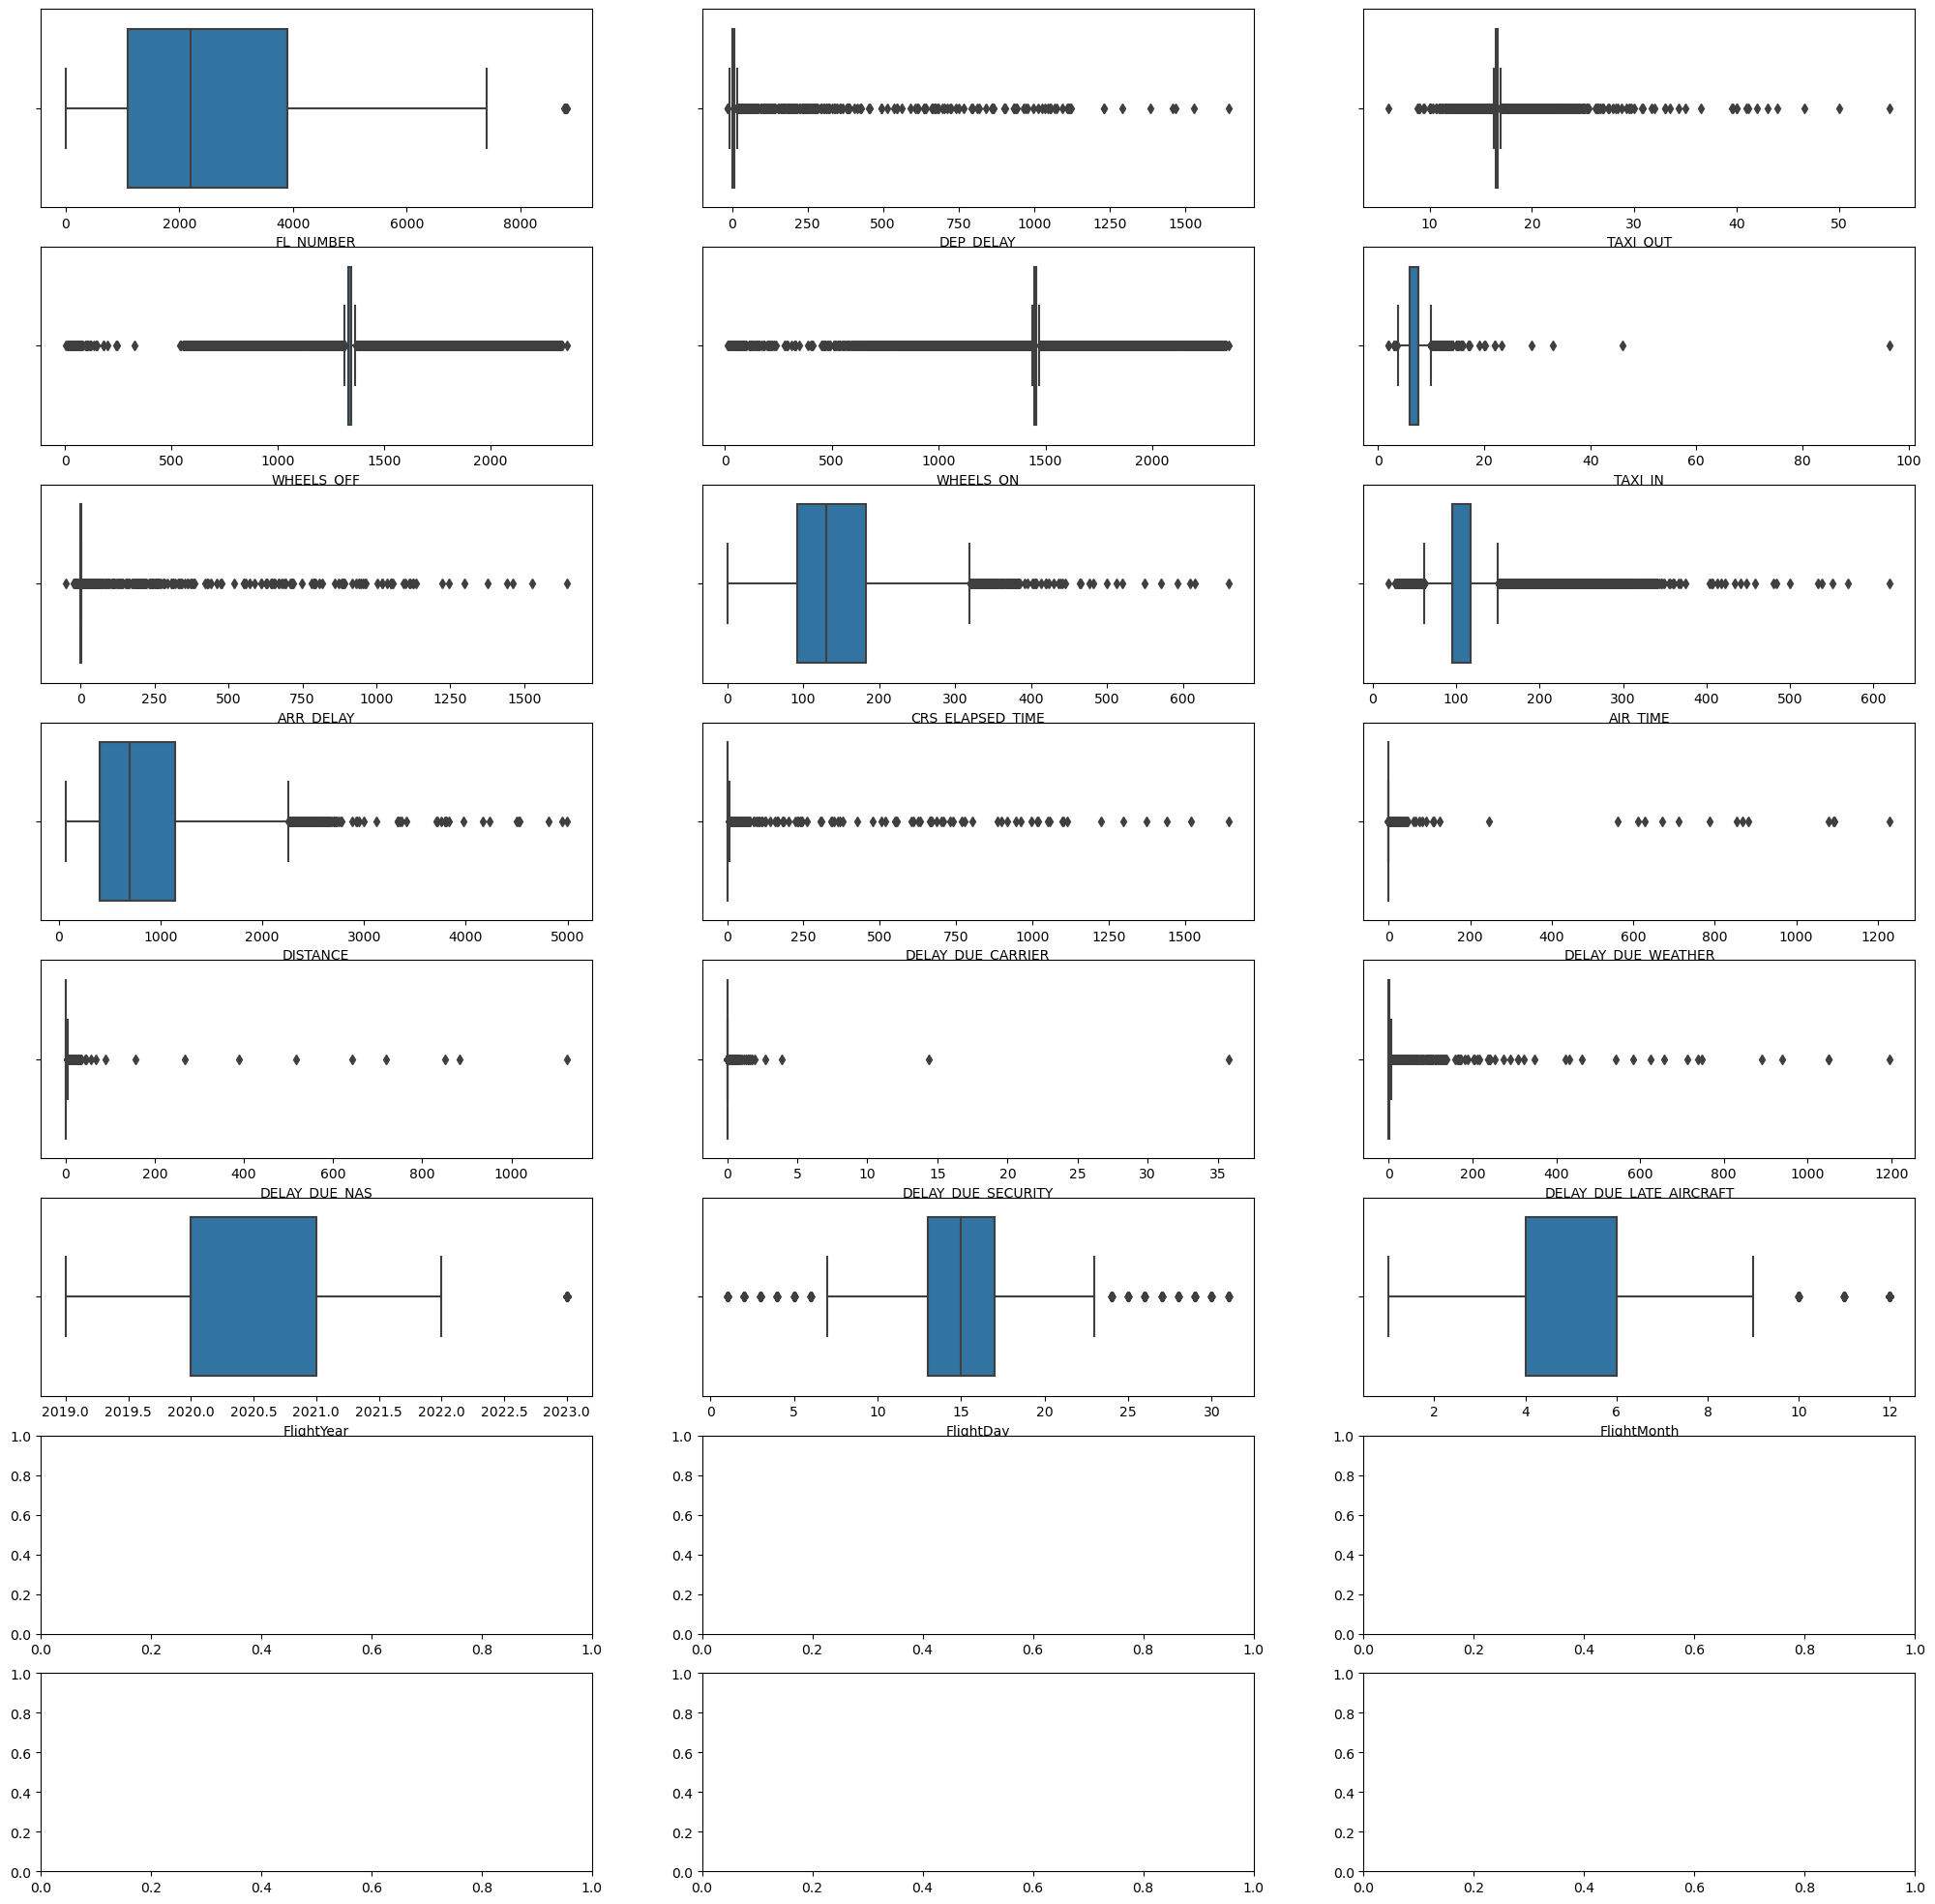

In [76]:
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

# Treating outliers using capping

C:\Users\ashwi\AppData\Local\Temp\ipykernel_700\1235594124.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_700\1235594124.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)
C:\Users\ashwi\AppData\Local\Temp\ipykernel_700\1235594124.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

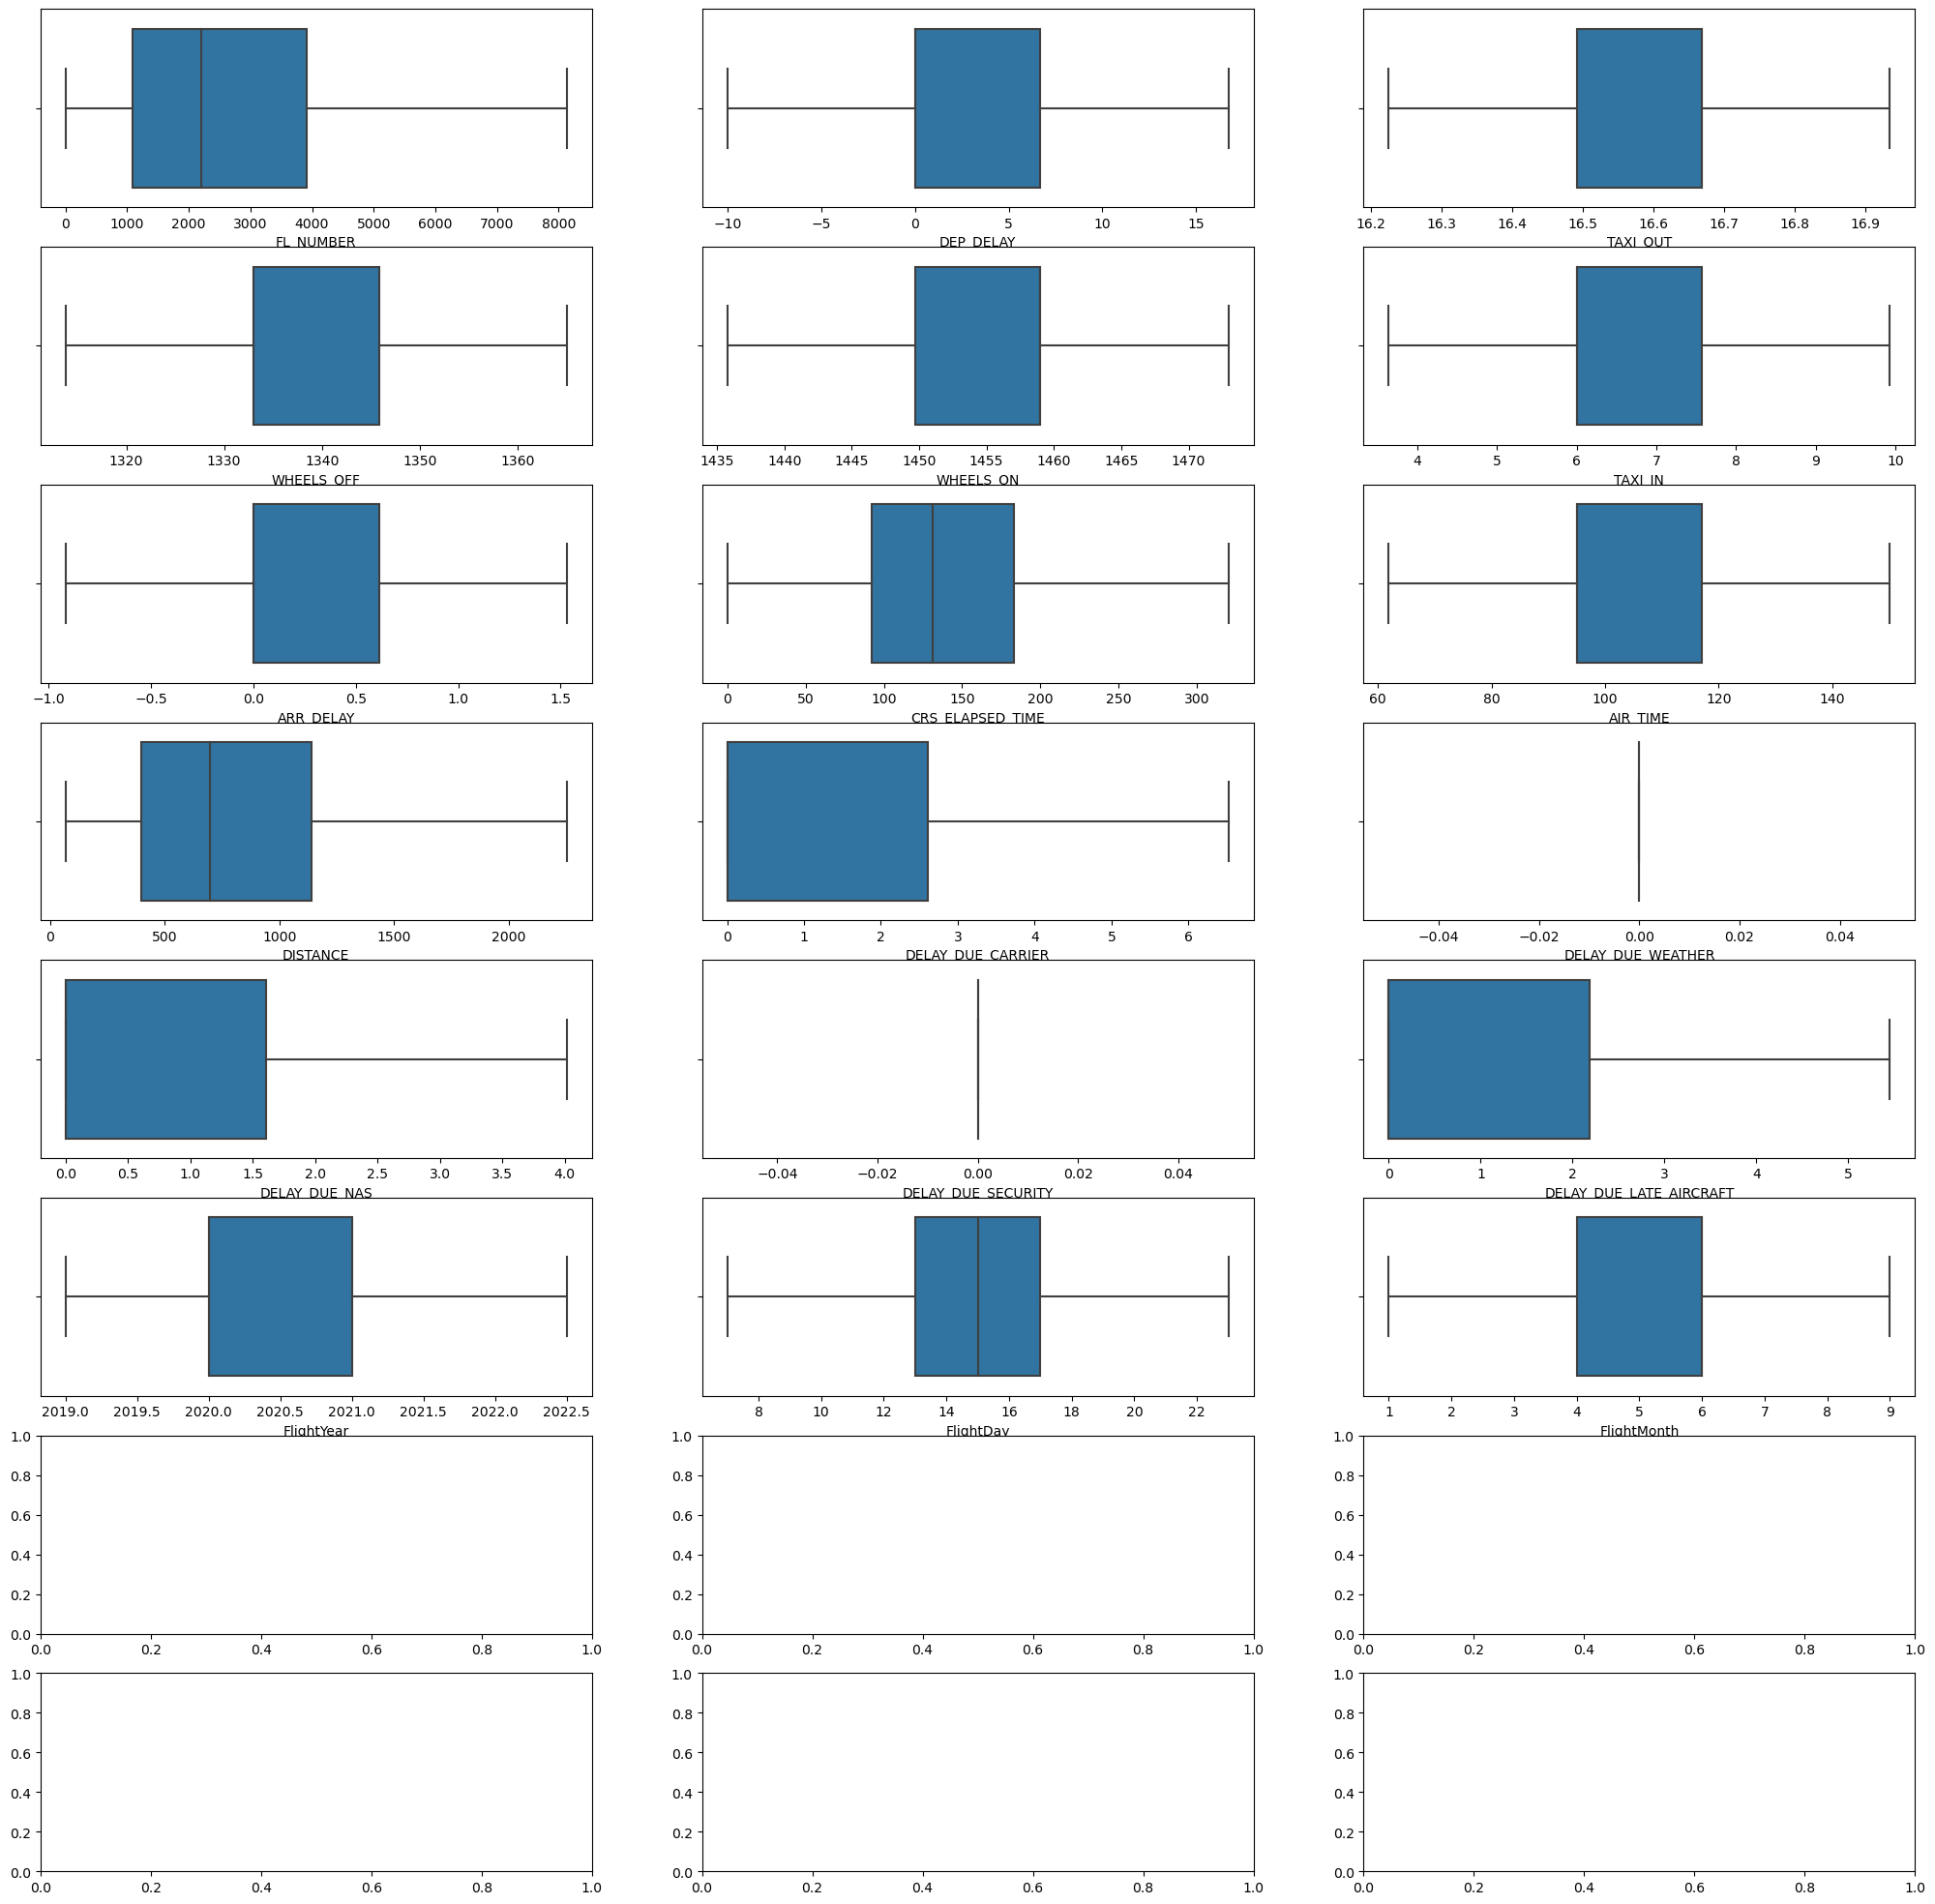

In [77]:
for i in X_out:
    q1=X_out[i].quantile(0.25)
    q3=X_out[i].quantile(0.75)
    iqr=q3-q1
    u=q3+(1.5*iqr)
    l=q1-(1.5*iqr)
    X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)

    
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

In [78]:
X_res_undersample = pd.concat((X_res_undersample[['ORIGIN','DEST','CANCELLATION_CODE','AIRLINE_CODE_en']]  ,X_out),axis=1)

In [79]:
X_res_undersample

,ORIGIN,DEST,CANCELLATION_CODE,AIRLINE_CODE_en,FL_NUMBER,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,0.022208,0.022441,0.000000,0.135151,1962.0,6.705128,16.224804,1365.02225,1472.951242,5.743590,1.530342,78.166667,61.879850,294.782051,2.807692,0.0,2.346154,0.0,4.025641,2020.0,15.0,5.0
1,0.020272,0.024318,0.000000,0.070953,4824.0,5.621622,16.864865,1365.02225,1472.951242,7.040541,-0.635135,107.162162,77.608108,499.621622,5.716216,0.0,0.797297,0.0,1.581081,2021.0,17.0,6.0
2,0.024598,0.022842,0.000000,0.119110,245.0,6.409091,16.224804,1313.78665,1435.747931,7.295455,1.530342,136.386364,112.431818,810.045455,2.022727,0.0,4.017197,0.0,3.840909,2020.0,15.0,5.0
3,0.022212,0.024277,0.000000,0.078591,3690.0,-0.057971,16.449275,1313.78665,1435.747931,7.811594,-0.918205,125.710145,96.115942,634.014493,2.304348,0.0,0.666667,0.0,0.275362,2020.0,16.0,6.0
4,0.019956,0.024721,0.000000,0.122611,1069.0,11.456522,16.224804,1365.02225,1472.951242,7.652174,1.530342,184.521739,150.200250,1246.586957,2.978261,0.0,1.630435,0.0,5.453065,2021.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,0.033801,0.010793,0.009570,0.084561,2032.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,319.900168,95.000000,2254.618924,0.000000,0.0,0.000000,0.0,0.000000,2021.0,9.0,7.0
4468,0.023592,0.023621,0.008212,0.126662,1313.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,176.000000,95.000000,1120.000000,0.000000,0.0,0.000000,0.0,0.000000,2020.0,7.0,4.0
4469,0.013623,0.016899,0.006503,0.084561,2128.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,125.000000,95.000000,599.000000,0.000000,0.0,0.000000,0.0,0.000000,2022.0,23.0,6.0
4470,0.021705,0.017295,0.008212,0.189497,1720.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,85.000000,95.000000,417.000000,0.000000,0.0,0.000000,0.0,0.000000,2020.0,22.0,4.0


In [80]:
import warnings
warnings.filterwarnings('ignore')

# FEATURE SELECTION USING RFE

In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV



rfe_mod = RFECV(DecisionTreeClassifier(),min_features_to_select = 10) 
myvalues= rfe_mod.fit(X_res_undersample,y_res_undersample)

In [83]:
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

Num Features: 10
Selected Features: [False False  True False False False False False False  True False False
 False False  True  True  True  True  True  True  True  True]
Feature Ranking: [13 12  1  7  6  5  4  3  2  1  9 11 10  8  1  1  1  1  1  1  1  1]


# FEATURES SELECTED BY RFE

In [84]:
myvalues.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

In [85]:


X_res_feat_sel = X_res_undersample[myvalues.feature_names_in_]

# MODEL FITTING ON BALANCED DATA WITH FEATURE SELECTION

In [86]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X_res_feat_sel, y_res_undersample,
                                                    random_state=0)

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [88]:
def performance(model):
        model.fit(X_train, y_train) 
        y_pred_tr = model.predict(X_train)
        y_pred_tst = model.predict(X_test)
      
        plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test,y_pred_tst),annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.show()
        
        print("Train")
        print(classification_report(y_train, y_pred_tr))
        print("Test")
        print(classification_report(y_test, y_pred_tst))

# GaussianNB

In [89]:
from sklearn.model_selection import GridSearchCV
gn=GaussianNB()
param_grid = {
    'var_smoothing':[0.01,0.001,0.5,1,8,15]
}
grid_search = GridSearchCV(estimator=gn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
k = grid_search.best_estimator_
k

GaussianNB(var_smoothing=0.001)

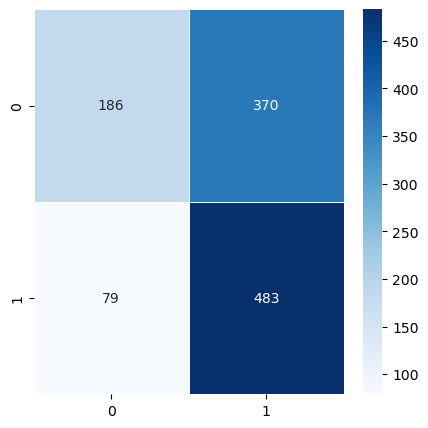

Train
              precision    recall  f1-score   support

           0       0.75      0.37      0.50      1680
           1       0.58      0.87      0.70      1674

    accuracy                           0.62      3354
   macro avg       0.66      0.62      0.60      3354
weighted avg       0.66      0.62      0.60      3354

Test
              precision    recall  f1-score   support

           0       0.70      0.33      0.45       556
           1       0.57      0.86      0.68       562

    accuracy                           0.60      1118
   macro avg       0.63      0.60      0.57      1118
weighted avg       0.63      0.60      0.57      1118



In [90]:
gn=GaussianNB(**best_params)
performance(gn)

# KNeighborsClassifier

In [91]:
s= StandardScaler()

In [92]:
X_trainknn= X_train.copy()
X_testknn=X_test.copy()

In [93]:
for i in X_train.columns:
    X_trainknn[i]=s.fit_transform(X_trainknn[[i]])
    X_trainknn[i]=s.transform(X_trainknn[[i]])
    

In [94]:

param_grid = {
    'weights': ['uniform','distance'],
    'n_neighbors':[6,10,15]
}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainknn, y_train)
best_params = grid_search.best_params_
k = grid_search.best_estimator_

In [95]:
k

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [96]:
kn = KNeighborsClassifier(**best_params)


In [97]:
kn.fit(X_trainknn,y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [98]:
print(classification_report(y_train,kn.predict(X_trainknn)))
print(classification_report(y_test,kn.predict(X_testknn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1674

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.50      1.00      0.67       562

    accuracy                           0.50      1118
   macro avg       0.25      0.50      0.33      1118
weighted avg       0.25      0.50      0.34      1118



<Axes: >

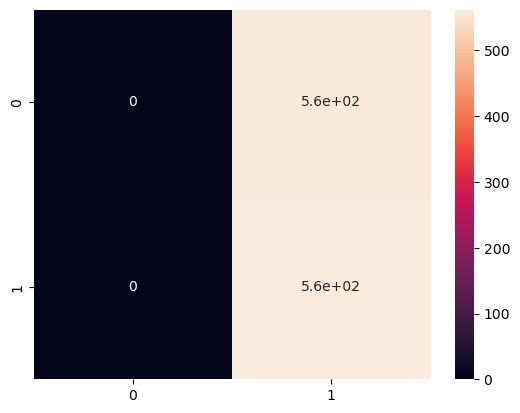

In [99]:
sns.heatmap(confusion_matrix(y_test,kn.predict(X_testknn)),annot=True)

# LogisticRegression

In [100]:

param_grid = {
   
    'max_iter' : range(14,15,16),
    'C': [0.001,0.00001] }
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
regul_lr = grid_search.best_estimator_

In [101]:
regul_lr

LogisticRegression(C=0.001, max_iter=14)

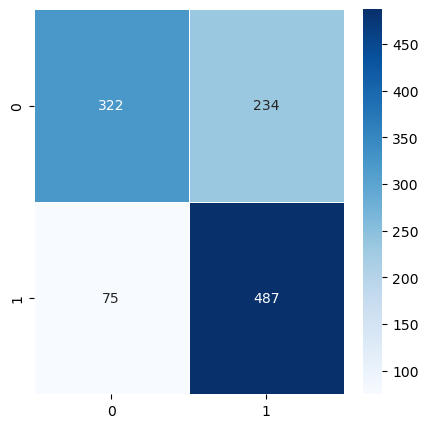

Train
              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1680
           1       0.72      0.89      0.79      1674

    accuracy                           0.77      3354
   macro avg       0.79      0.77      0.77      3354
weighted avg       0.79      0.77      0.77      3354

Test
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       556
           1       0.68      0.87      0.76       562

    accuracy                           0.72      1118
   macro avg       0.74      0.72      0.72      1118
weighted avg       0.74      0.72      0.72      1118



In [102]:
lr = LogisticRegression(max_iter=14,C=0.00001)
performance(lr)

In [103]:
from sklearn.metrics import f1_score,accuracy_score

In [104]:
accuracy_score(y_test,lr.predict(X_test))

0.723613595706619

In [105]:
lr.coef_

array([[ 1.56645930e-05,  1.84338077e-05,  2.58728154e-05,
        -9.77223160e-07, -3.10996399e-05, -2.37133974e-02,
         3.91410144e-04, -2.13408354e-02,  1.75519620e-02,
        -5.19386225e-03, -1.32231820e-03,  1.20363900e-03,
        -2.54170593e-02, -7.60488675e-04, -1.02245972e-02,
         0.00000000e+00, -6.29713751e-03,  0.00000000e+00,
        -8.92441729e-03,  3.03487327e-03, -1.13996050e-03,
        -3.01257340e-03]])

In [106]:
lr.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

# Decision Tree 

In [107]:

param_grid = {
   
    'max_depth' : range(7,11),
    'criterion' : ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
dt_pruned  = grid_search.best_estimator_

In [108]:
best_params

{'criterion': 'gini', 'max_depth': 7}

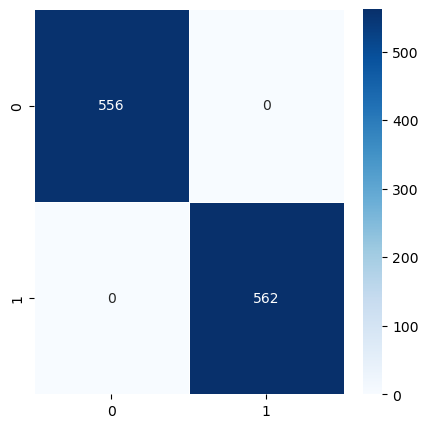

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1674

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       562

    accuracy                           1.00      1118
   macro avg       1.00      1.00      1.00      1118
weighted avg       1.00      1.00      1.00      1118



In [109]:
dt=DecisionTreeClassifier(**best_params)
performance(dt)

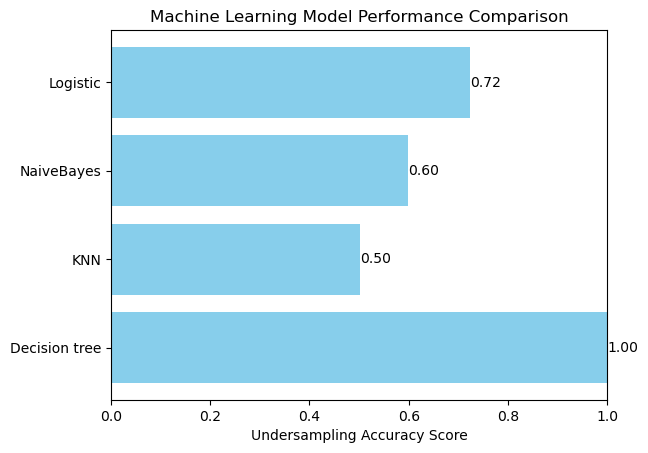

In [110]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores = [accuracy_score(y_test,dt.predict(X_test)),accuracy_score(y_test,kn.predict(X_test)),accuracy_score(y_test,gn.predict(X_test))
                  ,accuracy_score(y_test,lr.predict(X_test))]

# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Undersampling Accuracy Score')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

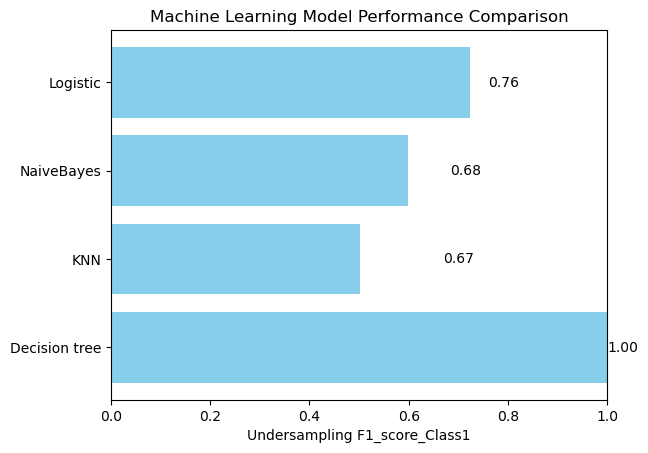

In [111]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
F1_score_Class1 = [f1_score(y_test,dt.predict(X_test)),f1_score(y_test,kn.predict(X_test)),f1_score(y_test,gn.predict(X_test))
                  ,f1_score(y_test,lr.predict(X_test))]


# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Undersampling F1_score_Class1')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(F1_score_Class1):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

In [112]:
from sklearn.metrics import roc_auc_score,roc_curve

In [113]:
def roc_plot(model,x,y,label):
    yprod= model.predict_proba(x)[:,1]
    
    fpr,tpr,thres = roc_curve(y,yprod)
    
    auc_score = roc_auc_score(y,yprod)
    
    plt.plot(fpr,tpr, label=label+'(AUC_SCore =%0.4f )'% auc_score)
    
    
    plt.xlim([0.0,1.0])
    
    plt.ylim([0.0,1.0])
    
    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)



    


    plt.grid(True)
    
    plt.legend(loc='lower right')
    
    
    

# 2. SMOTE based Oversampling

In [114]:
X_res_smote.columns

Index(['FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CANCELLATION_CODE',
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth',
       'AIRLINE_CODE_en'],
      dtype='object')

In [115]:
X_out_2 = X_res_smote[['FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth']]

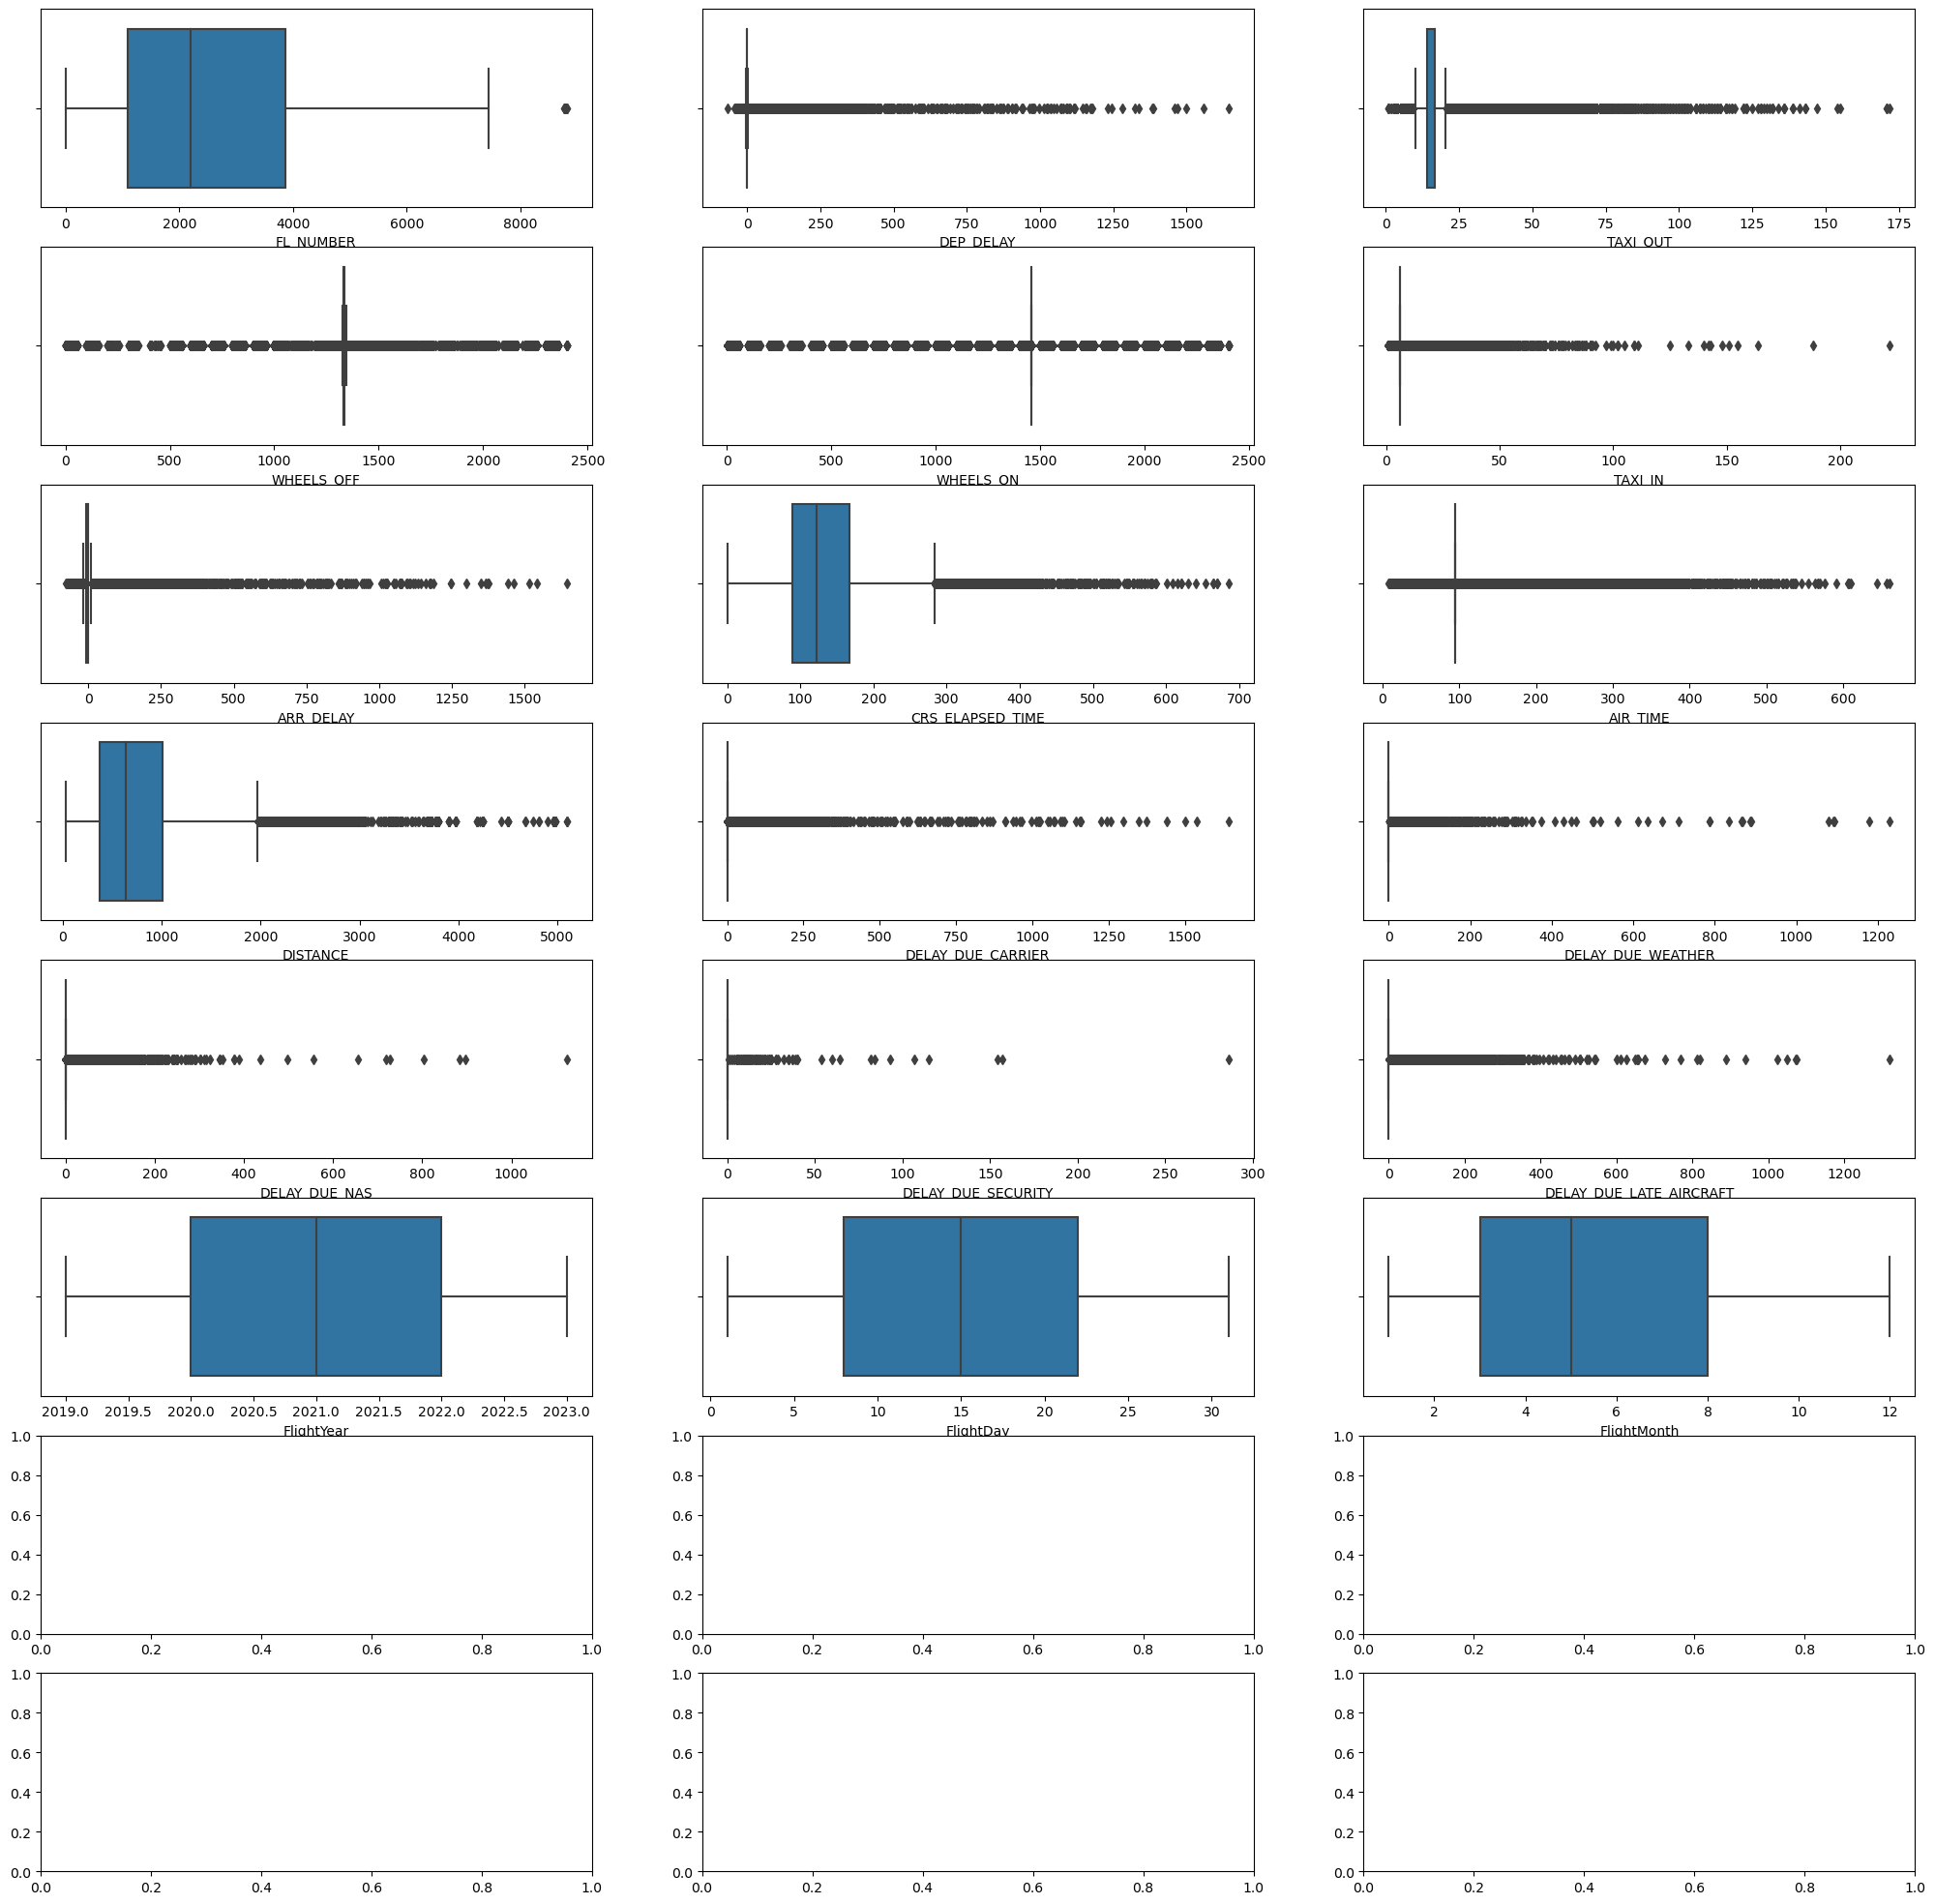

In [116]:
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out_2,ax.flatten()):
    
    sns.boxplot(x=X_out_2[var],ax=subplot)

plt.show()

# Treating outliers using capping

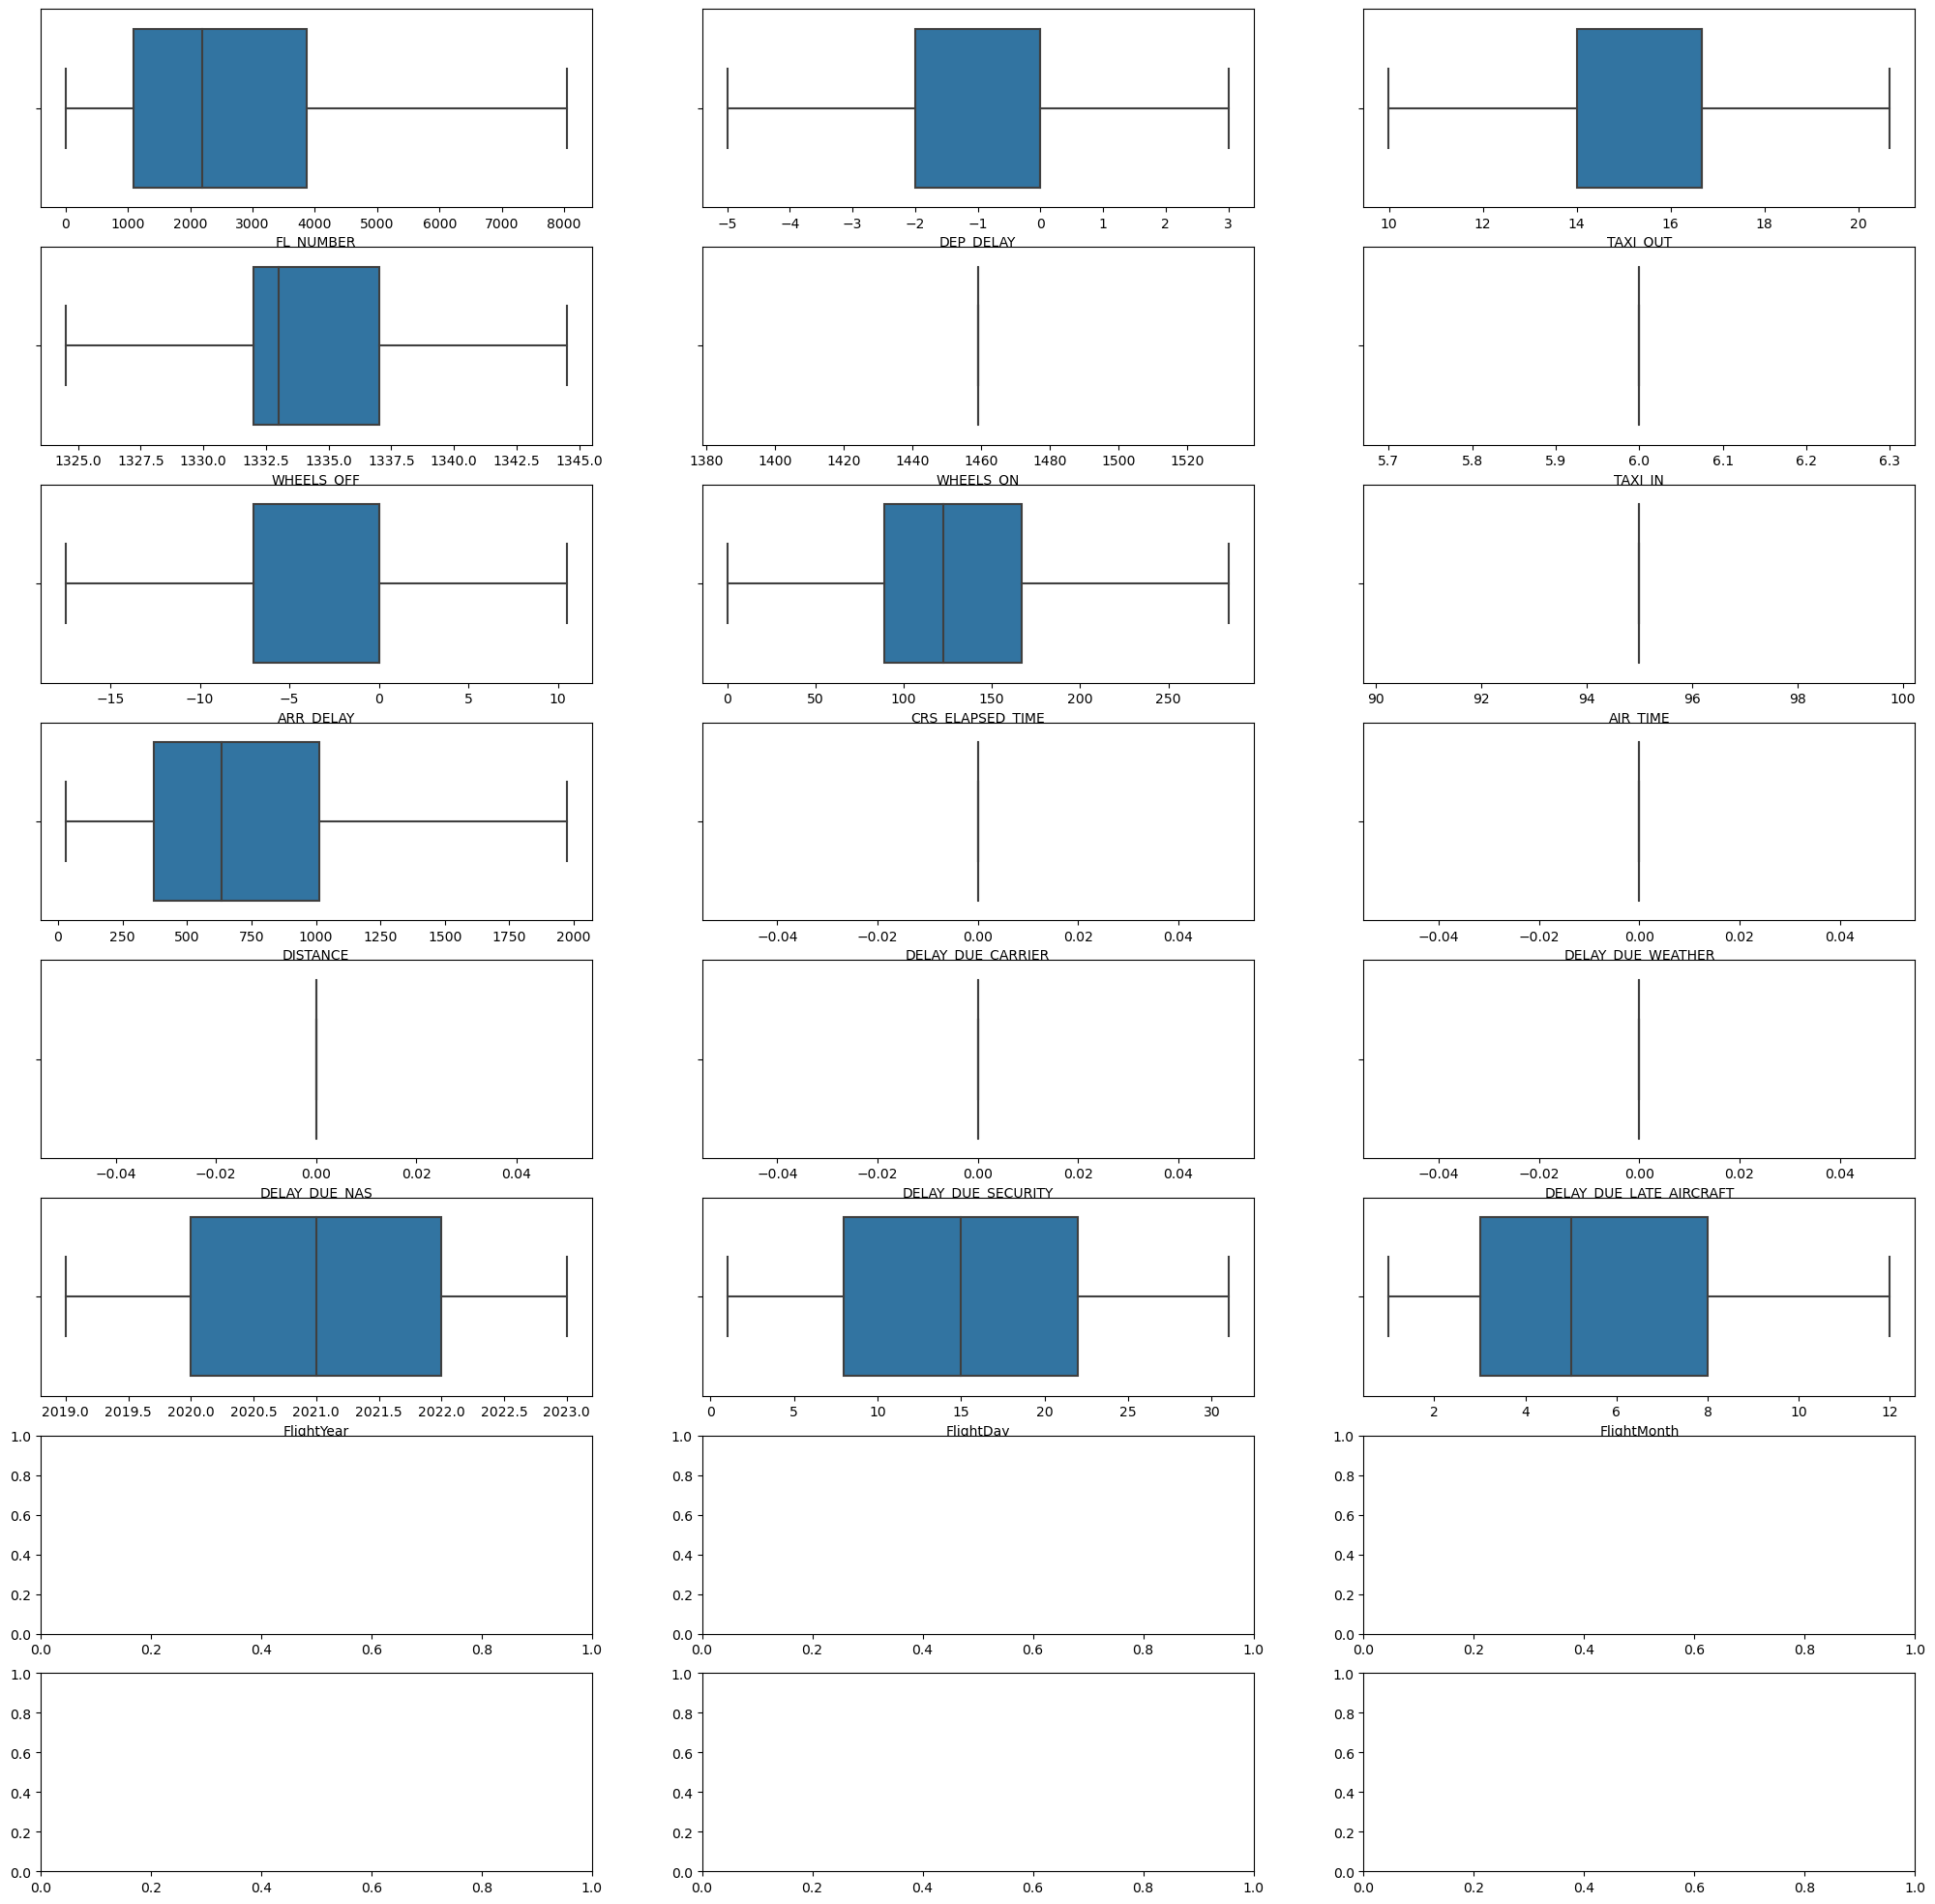

In [117]:
for i in X_out_2:
    q1=X_out_2[i].quantile(0.25)
    q3=X_out_2[i].quantile(0.75)
    iqr=q3-q1
    u=q3+(1.5*iqr)
    l=q1-(1.5*iqr)
    X_out_2[i]=X_out_2[i].apply(lambda x:l if x<l else u if x>u else x)

    
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out_2,ax.flatten()):
    
    sns.boxplot(x=X_out_2[var],ax=subplot)

plt.show()

In [118]:
X_res_smote = pd.concat((X_res_smote[['ORIGIN','DEST','CANCELLATION_CODE','AIRLINE_CODE_en']]  ,X_out_2),axis=1)

# FEATURE SELECTION USING SFS

In [119]:
from sklearn.feature_selection  import SequentialFeatureSelector

In [120]:
import statsmodels.api as sm


In [121]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res_smote, y_res_smote,test_size=0.3,
                                                    random_state=0)

In [122]:
sfs = SequentialFeatureSelector(estimator=DecisionTreeClassifier(),cv=7,n_features_to_select=10)

In [123]:
sfs.fit(X_train2,y_train2)

SequentialFeatureSelector(cv=7, estimator=DecisionTreeClassifier(),
                          n_features_to_select=10)

In [124]:
sfs.get_feature_names_out()

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN'], dtype=object)

In [125]:
X_train2=X_train2[sfs.get_feature_names_out()]
X_test2=X_test2[sfs.get_feature_names_out()]


In [126]:
X_test2.columns

Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
      dtype='object')

In [127]:
X_train2.columns

Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
      dtype='object')

# MODEL FITTING ON BALANCED DATA WITH FEATURE SELECTION

In [128]:
def performance2(model):
        model.fit(X_train2, y_train2) 
        y_pred_tr = model.predict(X_train2)
        y_pred_tst = model.predict(X_test2)
      
        plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test2,y_pred_tst),annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.show()
        
        print("Train")
        print(classification_report(y_train2, y_pred_tr))
        print("Test")
        print(classification_report(y_test2, y_pred_tst))

# GaussianNB

In [129]:



# Assuming X_train2 and y_train2 are your training data
param_grid2 = {
    'var_smoothing': [0.05, 0.045, 0.80, 7, 17, 22]
}


grid_search2 = GridSearchCV(estimator= GaussianNB(), param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train2, y_train2)

best_params2 = grid_search2.best_params_
best_estimator2 = grid_search2.best_estimator_

print("Best parameters found: ", best_params2)
print("Best estimator found: ", best_estimator2)


Best parameters found:  {'var_smoothing': 7}
Best estimator found:  GaussianNB(var_smoothing=7)


In [130]:
gn3=GaussianNB(**best_params2)


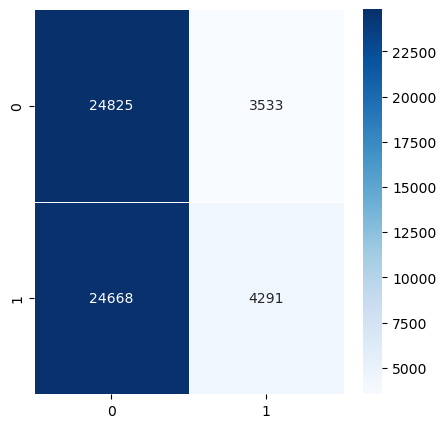

Train
              precision    recall  f1-score   support

           0       0.51      0.88      0.64     67170
           1       0.54      0.15      0.23     66569

    accuracy                           0.51    133739
   macro avg       0.53      0.51      0.44    133739
weighted avg       0.53      0.51      0.44    133739

Test
              precision    recall  f1-score   support

           0       0.50      0.88      0.64     28358
           1       0.55      0.15      0.23     28959

    accuracy                           0.51     57317
   macro avg       0.53      0.51      0.44     57317
weighted avg       0.53      0.51      0.43     57317



In [131]:
performance2(gn3)

# KNeighborsClassifier

In [132]:
s= StandardScaler()

X_trainknn= X_train2.copy()
X_testknn=X_test2.copy()

for i in X_train2.columns:
    X_trainknn[i]=s.fit_transform(X_trainknn[[i]])
    X_testknn[i]=s.transform(X_testknn[[i]])
    




In [133]:

param_gridk = {
    'weights': ['uniform','distance'],
    'n_neighbors':[34,20,76]
}
grid_searchk = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_gridk, cv=5, scoring='accuracy')
grid_searchk.fit(X_trainknn, y_train2)
best_paramsk = grid_searchk.best_params_
kk = grid_searchk.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67170
           1       1.00      1.00      1.00     66569

    accuracy                           1.00    133739
   macro avg       1.00      1.00      1.00    133739
weighted avg       1.00      1.00      1.00    133739

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



<Axes: >

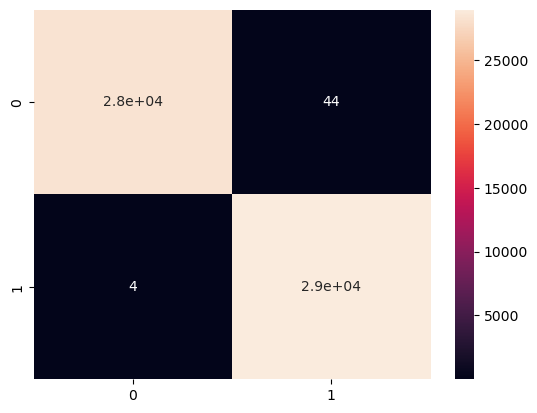

In [134]:
knn2 = KNeighborsClassifier(**best_paramsk)


knn2.fit(X_trainknn,y_train2)

print(classification_report(y_train2,knn2.predict(X_trainknn)))
print(classification_report(y_test2,knn2.predict(X_testknn)))

sns.heatmap(confusion_matrix(y_test2,knn2.predict(X_testknn)),annot=True)

In [135]:
X_test2.columns,X_train2.columns

(Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
        'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
       dtype='object'),
 Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
        'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
       dtype='object'))

# LogisticRegression

In [136]:

param_gridlr2 = {
   
    'max_iter' : range(16,17,18),
    'C': [0.0045,0.00051] }
grid_searchlr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_gridlr2, cv=5, scoring='accuracy')
grid_searchlr.fit(X_train2, y_train2)
best_paramslr = grid_searchlr.best_params_
regul_lr2 = grid_searchlr.best_estimator_

In [137]:
regul_lr2

LogisticRegression(C=0.0045, max_iter=16)

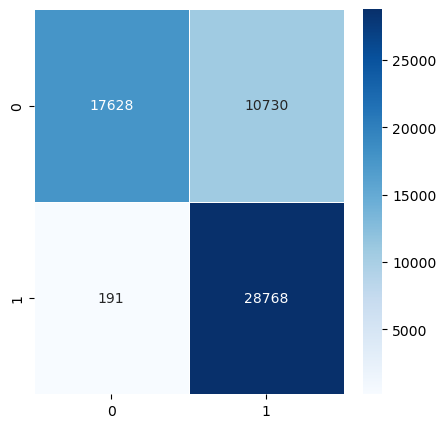

Train
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     67170
           1       0.72      0.99      0.83     66569

    accuracy                           0.80    133739
   macro avg       0.85      0.80      0.80    133739
weighted avg       0.85      0.80      0.80    133739

Test
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     28358
           1       0.73      0.99      0.84     28959

    accuracy                           0.81     57317
   macro avg       0.86      0.81      0.80     57317
weighted avg       0.86      0.81      0.80     57317



In [138]:
lr2 = LogisticRegression(**best_paramslr)
performance2(lr2)

In [139]:
lr2.coef_

array([[ 5.80889857e-04,  6.45880277e-04,  8.71512581e-04,
         2.52479917e-04,  3.06938940e-05,  1.61868573e-01,
         1.86545436e-01, -8.65495953e-02,  7.70835029e-02,
         3.16998641e-04]])

In [140]:
lr2.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN'], dtype=object)

# DecisionTreeClassifier

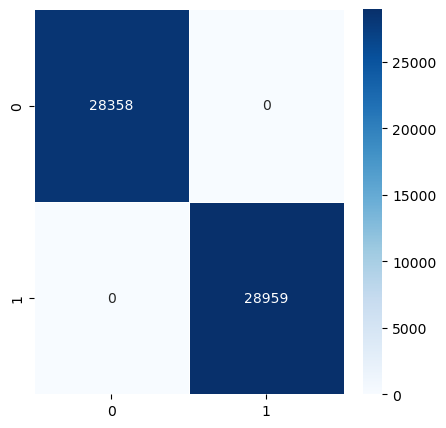

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67170
           1       1.00      1.00      1.00     66569

    accuracy                           1.00    133739
   macro avg       1.00      1.00      1.00    133739
weighted avg       1.00      1.00      1.00    133739

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



In [141]:

param_grid = {
   
    'max_depth' : range(7,16),
    'criterion' : ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train2, y_train2)
best_params = grid_search.best_params_
dt_pruned  = grid_search.best_estimator_

best_params

dt3=DecisionTreeClassifier(**best_params)
performance2(dt3)

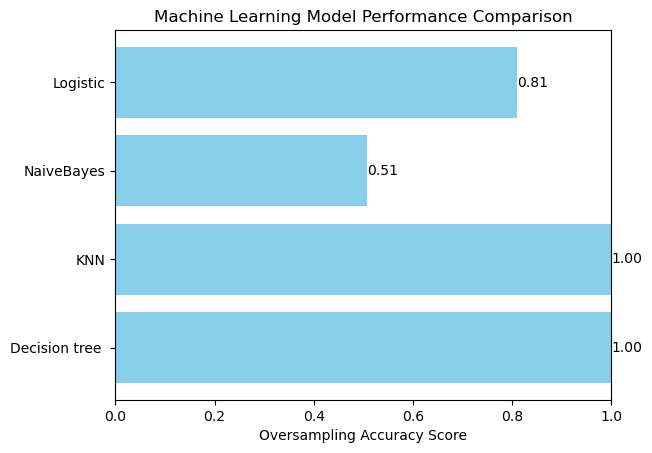

In [142]:
model_names = ['Decision tree ', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores = [accuracy_score(y_test2,dt3.predict(X_test2)),accuracy_score(y_test2,knn2.predict(X_testknn)),accuracy_score(y_test2,gn3.predict(X_test2))
                  ,accuracy_score(y_test2,lr2.predict(X_test2))]


# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Oversampling Accuracy Score')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

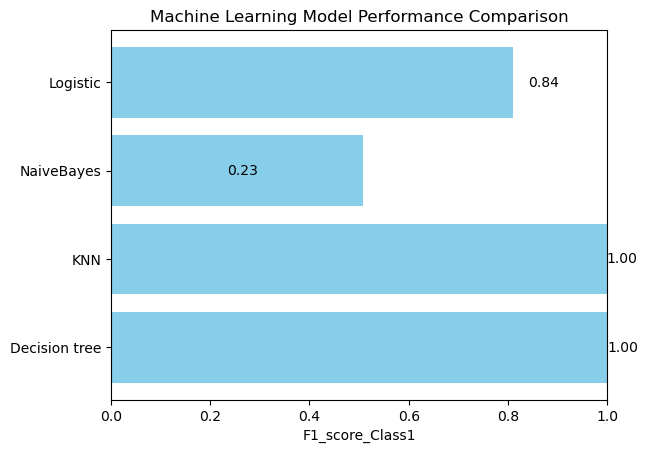

In [143]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
F1_score_Class1 = [f1_score(y_test2,dt3.predict(X_test2)),f1_score(y_test2,knn2.predict(X_testknn)),f1_score(y_test2,gn3.predict(X_test2))
                  ,f1_score(y_test2,lr2.predict(X_test2))]

# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('F1_score_Class1')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(F1_score_Class1):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

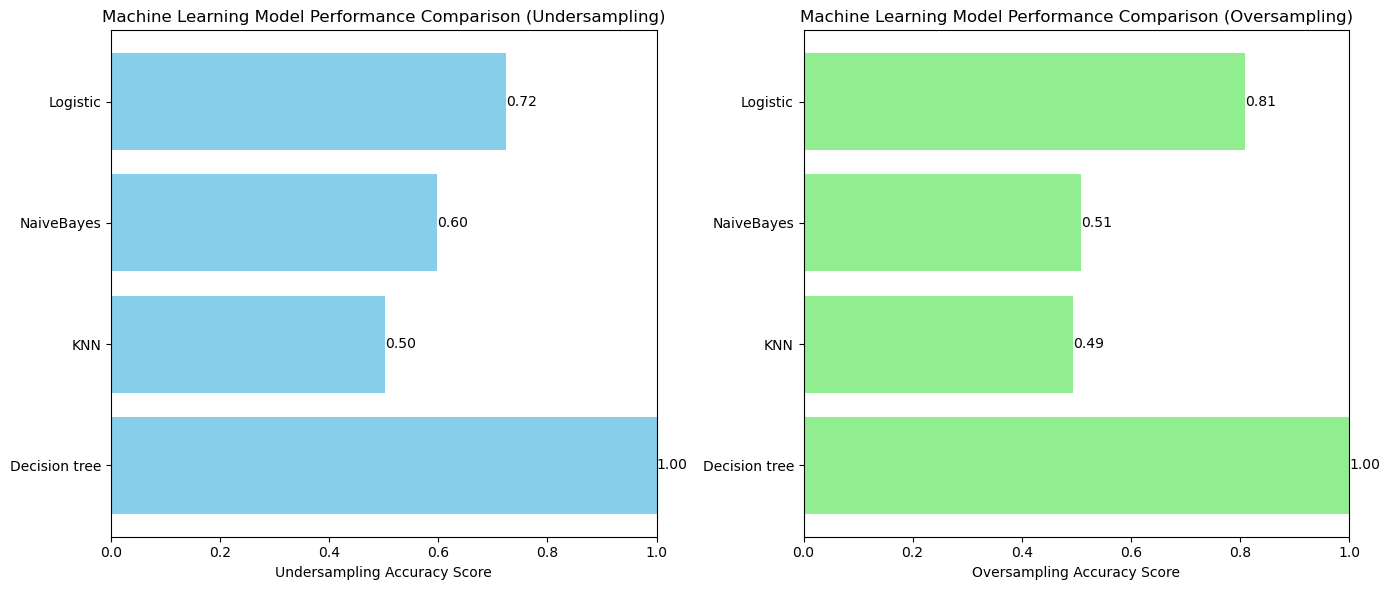

In [144]:


# Sample data and model predictions
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores_undersampling = [
    accuracy_score(y_test, dt.predict(X_test)),
    accuracy_score(y_test, kn.predict(X_test)),
    accuracy_score(y_test, gn.predict(X_test)),
    accuracy_score(y_test, lr.predict(X_test))
]

accuracy_scores_oversampling = [
    accuracy_score(y_test2, dt3.predict(X_test2)),
    accuracy_score(y_test2, knn2.predict(X_test2)),
    accuracy_score(y_test2, gn3.predict(X_test2)),
    accuracy_score(y_test2, lr2.predict(X_test2))
]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# First subplot - Undersampling Accuracy Scores
axes[0].barh(model_names, accuracy_scores_undersampling, color='skyblue')
axes[0].set_xlabel('Undersampling Accuracy Score')
axes[0].set_title('Machine Learning Model Performance Comparison (Undersampling)')
axes[0].set_xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars for undersampling
for index, value in enumerate(accuracy_scores_undersampling):
    axes[0].text(value, index, f'{value:.2f}', va='center')

# Second subplot - Oversampling Accuracy Scores
axes[1].barh(model_names, accuracy_scores_oversampling, color='lightgreen')
axes[1].set_xlabel('Oversampling Accuracy Score')
axes[1].set_title('Machine Learning Model Performance Comparison (Oversampling)')
axes[1].set_xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

for index, value in enumerate(accuracy_scores_oversampling):
    axes[1].text(value, index, f'{value:.2f}', va='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



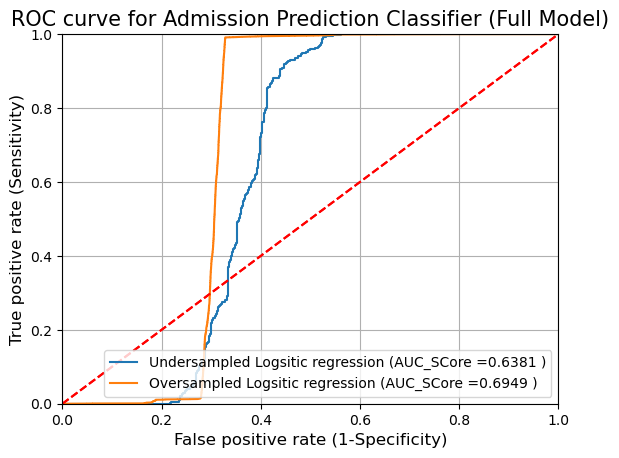

In [145]:

roc_plot(lr,X_test,y_test,'Undersampled Logsitic regression ')
roc_plot(lr2,X_test2,y_test2,'Oversampled Logsitic regression ')

# Use of pipelines 

In [146]:
from sklearn.feature_selection import SelectKBest, f_classif

In [147]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Feature scaling
    ('feature_selection', SelectKBest(f_classif)),     # Feature selection
    ('classifier', RandomForestClassifier())           # Random forest classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'feature_selection__k': [10, 15, 20],                  # Number of features to select
    'classifier__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       562

    accuracy                           1.00      1118
   macro avg       1.00      1.00      1.00      1118
weighted avg       1.00      1.00      1.00      1118



In [148]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Feature scaling
    ('feature_selection', SelectKBest(f_classif)),     # Feature selection
    ('classifier', RandomForestClassifier())           # Random forest classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'feature_selection__k': [10, 15, 20],                  # Number of features to select
    'classifier__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train2, y_train2)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test2)

print("Classification Report:\n", classification_report(y_test2, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



In [149]:
from sklearn.metrics import mean_squared_error

In [150]:
# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10)

train_errors = []
test_errors = []

# Train models and compute errors
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train, y_train)
    
    # Compute training and test errors
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)


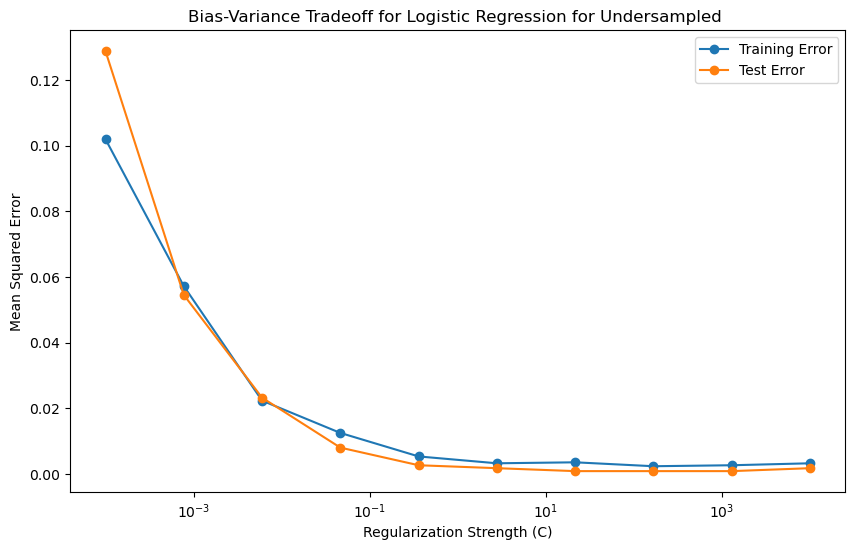

In [151]:
# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o')
plt.plot(C_values, test_errors, label='Test Error', marker='o')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff for Logistic Regression for Undersampled ')
plt.legend()
plt.show()


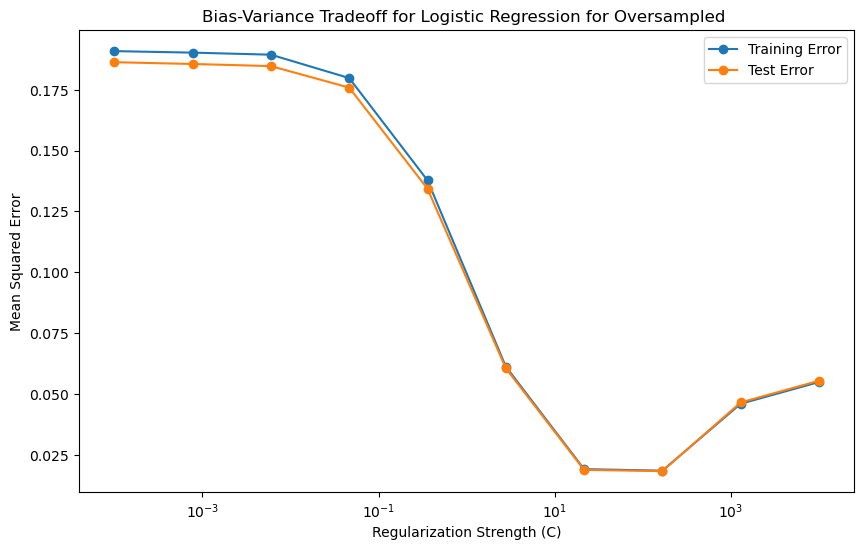

In [152]:
# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10)

train_errors = []
test_errors = []

# Train models and compute errors
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train2, y_train2)
    
    # Compute training and test errors
    train_error = mean_squared_error(y_train2, model.predict(X_train2))
    test_error = mean_squared_error(y_test2, model.predict(X_test2))
    
    train_errors.append(train_error)
    test_errors.append(test_error)


# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o')
plt.plot(C_values, test_errors, label='Test Error', marker='o')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff for Logistic Regression for Oversampled ')
plt.legend()
plt.show()


# Chunk-2


In [153]:
chunk2 = pd.read_csv('flights_sample_3m.csv', chunksize=100000).get_chunk()

In [154]:
chunk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   FL_DATE                  100000 non-null  object 
 1   AIRLINE                  100000 non-null  object 
 2   AIRLINE_DOT              100000 non-null  object 
 3   AIRLINE_CODE             100000 non-null  object 
 4   DOT_CODE                 100000 non-null  int64  
 5   FL_NUMBER                100000 non-null  int64  
 6   ORIGIN                   100000 non-null  object 
 7   ORIGIN_CITY              100000 non-null  object 
 8   DEST                     100000 non-null  object 
 9   DEST_CITY                100000 non-null  object 
 10  CRS_DEP_TIME             100000 non-null  int64  
 11  DEP_TIME                 97443 non-null   float64
 12  DEP_DELAY                97442 non-null   float64
 13  TAXI_OUT                 97414 non-null   float64
 14  WHEEL

In [155]:
chunk2.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0.0,NaN,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0.0,NaN,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0.0,NaN,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0.0,NaN,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [156]:
# checking dimensions 

In [157]:
chunk2.shape 

(100000, 32)

In [158]:
# checking class imbalance

In [159]:
chunk2['CANCELLED'].value_counts(normalize=True)

0.0    0.97404
1.0    0.02596
Name: CANCELLED, dtype: float64

In [160]:
# Sampling to 1 lakhs samples and gettting the chunks  

In [161]:
# Checking for redundant columns 

In [162]:
chunk2['AIRLINE_CODE'].unique()

array(['UA', 'DL', 'NK', 'WN', 'AA', 'YX', 'AS', 'B6', 'OH', 'G4', 'EV',
       'OO', '9E', 'MQ', 'F9', 'YV', 'QX', 'HA'], dtype=object)

In [163]:
chunk2['AIRLINE'].value_counts(normalize=True)

Southwest Airlines Co.                0.18911
Delta Air Lines Inc.                  0.13503
American Airlines Inc.                0.12678
SkyWest Airlines Inc.                 0.11569
United Air Lines Inc.                 0.08443
Republic Airline                      0.04863
Envoy Air                             0.04099
Endeavor Air Inc.                     0.03814
JetBlue Airways                       0.03704
PSA Airlines Inc.                     0.03595
Alaska Airlines Inc.                  0.03240
Spirit Air Lines                      0.03186
Frontier Airlines Inc.                0.02194
Mesa Airlines Inc.                    0.02119
Allegiant Air                         0.01737
Hawaiian Airlines Inc.                0.01069
Horizon Air                           0.00639
ExpressJet Airlines LLC d/b/a aha!    0.00637
Name: AIRLINE, dtype: float64

In [164]:
chunk2['AIRLINE'].nunique()

18

In [165]:
chunk2['AIRLINE'].unique()

array(['United Air Lines Inc.', 'Delta Air Lines Inc.',
       'Spirit Air Lines', 'Southwest Airlines Co.',
       'American Airlines Inc.', 'Republic Airline',
       'Alaska Airlines Inc.', 'JetBlue Airways', 'PSA Airlines Inc.',
       'Allegiant Air', 'ExpressJet Airlines LLC d/b/a aha!',
       'SkyWest Airlines Inc.', 'Endeavor Air Inc.', 'Envoy Air',
       'Frontier Airlines Inc.', 'Mesa Airlines Inc.', 'Horizon Air',
       'Hawaiian Airlines Inc.'], dtype=object)

In [166]:
chunk2['AIRLINE_DOT'].nunique()

18

In [167]:
chunk2['AIRLINE_DOT'].unique()

array(['United Air Lines Inc.: UA', 'Delta Air Lines Inc.: DL',
       'Spirit Air Lines: NK', 'Southwest Airlines Co.: WN',
       'American Airlines Inc.: AA', 'Republic Airline: YX',
       'Alaska Airlines Inc.: AS', 'JetBlue Airways: B6',
       'PSA Airlines Inc.: OH', 'Allegiant Air: G4',
       'ExpressJet Airlines LLC d/b/a aha!: EV',
       'SkyWest Airlines Inc.: OO', 'Endeavor Air Inc.: 9E',
       'Envoy Air: MQ', 'Frontier Airlines Inc.: F9',
       'Mesa Airlines Inc.: YV', 'Horizon Air: QX',
       'Hawaiian Airlines Inc.: HA'], dtype=object)

In [168]:
chunk2['AIRLINE_DOT'].value_counts(normalize=True)

Southwest Airlines Co.: WN                0.18911
Delta Air Lines Inc.: DL                  0.13503
American Airlines Inc.: AA                0.12678
SkyWest Airlines Inc.: OO                 0.11569
United Air Lines Inc.: UA                 0.08443
Republic Airline: YX                      0.04863
Envoy Air: MQ                             0.04099
Endeavor Air Inc.: 9E                     0.03814
JetBlue Airways: B6                       0.03704
PSA Airlines Inc.: OH                     0.03595
Alaska Airlines Inc.: AS                  0.03240
Spirit Air Lines: NK                      0.03186
Frontier Airlines Inc.: F9                0.02194
Mesa Airlines Inc.: YV                    0.02119
Allegiant Air: G4                         0.01737
Hawaiian Airlines Inc.: HA                0.01069
Horizon Air: QX                           0.00639
ExpressJet Airlines LLC d/b/a aha!: EV    0.00637
Name: AIRLINE_DOT, dtype: float64

In [169]:
chunk2['AIRLINE_CODE'].unique()

array(['UA', 'DL', 'NK', 'WN', 'AA', 'YX', 'AS', 'B6', 'OH', 'G4', 'EV',
       'OO', '9E', 'MQ', 'F9', 'YV', 'QX', 'HA'], dtype=object)

In [170]:
chunk2['AIRLINE_CODE'].nunique()

18

In [171]:
chunk2['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.18911
DL    0.13503
AA    0.12678
OO    0.11569
UA    0.08443
YX    0.04863
MQ    0.04099
9E    0.03814
B6    0.03704
OH    0.03595
AS    0.03240
NK    0.03186
F9    0.02194
YV    0.02119
G4    0.01737
HA    0.01069
QX    0.00639
EV    0.00637
Name: AIRLINE_CODE, dtype: float64

In [172]:
chunk2['ORIGIN'].nunique()

375

In [173]:
chunk2['ORIGIN'].unique()

array(['FLL', 'MSP', 'DEN', 'MCO', 'DAL', 'DCA', 'HSV', 'IAH', 'SEA',
       'ATL', 'RDU', 'MDW', 'BDL', 'SJC', 'BWI', 'STT', 'SRQ', 'JFK',
       'GRR', 'DFW', 'CLT', 'ORD', 'LAS', 'TUL', 'USA', 'SLC', 'BNA',
       'AUS', 'IND', 'MHT', 'SFO', 'PRC', 'BOS', 'LAX', 'SMF', 'DTW',
       'SAT', 'MSY', 'CMH', 'STL', 'SJU', 'PHX', 'TPA', 'LGA', 'PHL',
       'GRK', 'ILM', 'JLN', 'MKE', 'BIL', 'BLI', 'CHS', 'RIC', 'GSO',
       'MCI', 'EWR', 'ELP', 'SDF', 'HPN', 'SAN', 'BHM', 'ASE', 'HNL',
       'MAF', 'BUF', 'TUS', 'SYR', 'MSN', 'FAT', 'FWA', 'LAN', 'ABI',
       'ICT', 'CMI', 'IAD', 'OAK', 'EUG', 'MIA', 'CHA', 'BTV', 'RSW',
       'PDX', 'SNA', 'PIT', 'OGG', 'HRL', 'BIS', 'SHR', 'BOI', 'RNO',
       'SBP', 'GSP', 'MLB', 'GRB', 'CRW', 'LGB', 'OKC', 'PVD', 'YAK',
       'CID', 'FSD', 'HYS', 'VPS', 'ROC', 'SAV', 'CLE', 'RDD', 'ANC',
       'DVL', 'SWO', 'BUR', 'PIR', 'HOU', 'PBI', 'MLI', 'AZA', 'MKG',
       'PNS', 'MYR', 'GTF', 'LSE', 'RDM', 'ORF', 'KOA', 'MQT', 'COS',
       'CVG', 'MOB',

In [174]:
chunk2['ORIGIN_CITY'].unique()

array(['Fort Lauderdale, FL', 'Minneapolis, MN', 'Denver, CO',
       'Orlando, FL', 'Dallas, TX', 'Washington, DC', 'Huntsville, AL',
       'Houston, TX', 'Seattle, WA', 'Atlanta, GA', 'Raleigh/Durham, NC',
       'Chicago, IL', 'Hartford, CT', 'San Jose, CA', 'Baltimore, MD',
       'Charlotte Amalie, VI', 'Sarasota/Bradenton, FL', 'New York, NY',
       'Grand Rapids, MI', 'Dallas/Fort Worth, TX', 'Charlotte, NC',
       'Las Vegas, NV', 'Tulsa, OK', 'Concord, NC', 'Salt Lake City, UT',
       'Nashville, TN', 'Austin, TX', 'Indianapolis, IN',
       'Manchester, NH', 'San Francisco, CA', 'Prescott, AZ',
       'Boston, MA', 'Los Angeles, CA', 'Sacramento, CA', 'Detroit, MI',
       'San Antonio, TX', 'New Orleans, LA', 'Columbus, OH',
       'St. Louis, MO', 'San Juan, PR', 'Phoenix, AZ', 'Tampa, FL',
       'Philadelphia, PA', 'Killeen, TX', 'Wilmington, NC', 'Joplin, MO',
       'Milwaukee, WI', 'Billings, MT', 'Bellingham, WA',
       'Charleston, SC', 'Richmond, VA', 'Greensbo

In [175]:
# From above 3 features :airline_code,airline,airline_dot gives same information,so we can keep only 1 column airline_code and drop remaining two

In [176]:
chunk2['CANCELLATION_CODE'].unique()

array([nan, 'D', 'B', 'A', 'C'], dtype=object)

In [177]:
chunk2['DELAY_DUE_CARRIER'].nunique()

426

In [178]:
chunk2['DELAY_DUE_CARRIER'].unique()

array([      nan, 0.000e+00, 1.410e+02, 6.000e+01, 5.700e+01, 3.100e+01,
       7.100e+01, 2.000e+01, 1.100e+02, 2.200e+01, 1.000e+00, 1.000e+01,
       7.800e+01, 4.000e+00, 3.800e+01, 3.000e+00, 2.500e+01, 3.500e+01,
       1.600e+01, 3.000e+01, 1.200e+01, 2.400e+01, 7.000e+00, 2.000e+00,
       1.700e+01, 6.000e+00, 2.600e+01, 3.200e+01, 1.800e+01, 2.300e+01,
       3.600e+01, 1.370e+02, 1.400e+01, 4.000e+01, 1.900e+01, 1.500e+01,
       4.370e+02, 3.300e+01, 6.400e+01, 4.300e+01, 8.000e+01, 6.600e+01,
       1.190e+02, 1.090e+02, 5.400e+01, 5.000e+00, 1.300e+02, 2.100e+01,
       8.000e+00, 3.400e+01, 9.000e+00, 5.500e+01, 3.900e+01, 4.200e+01,
       2.900e+01, 6.800e+01, 1.170e+02, 1.570e+02, 1.300e+01, 4.100e+01,
       2.800e+01, 4.900e+01, 1.880e+02, 9.100e+01, 2.700e+01, 1.440e+02,
       1.240e+02, 8.300e+01, 1.100e+01, 2.290e+02, 9.400e+01, 2.310e+02,
       1.120e+02, 5.900e+01, 1.330e+02, 5.800e+01, 4.700e+01, 5.100e+01,
       2.510e+02, 5.600e+01, 4.400e+01, 8.400e+01, 

In [179]:
chunk2['CANCELLATION_CODE'].value_counts()

B    952
D    813
A    623
C    208
Name: CANCELLATION_CODE, dtype: int64

In [180]:
# Checking for Null values 

In [181]:
chunk2['CANCELLATION_CODE'].isnull().sum()

97404

In [182]:
chunk2['DELAY_DUE_CARRIER'].isnull().sum()

82239

In [183]:
chunk2['DELAY_DUE_LATE_AIRCRAFT'].isnull().sum()

82239

In [184]:
chunk2['DELAY_DUE_NAS'].isnull().sum()

82239

In [185]:
chunk2['DELAY_DUE_WEATHER'].isnull().sum()

82239

In [186]:
chunk2['DELAY_DUE_SECURITY'].isnull().sum()

82239

In [187]:
chunk2['CANCELLED'].value_counts()

0.0    97404
1.0     2596
Name: CANCELLED, dtype: int64

In [188]:
chunk2['DIVERTED'].value_counts(normalize=True)*100

0.0    99.801
1.0     0.199
Name: DIVERTED, dtype: float64

In [189]:
chunk2.head(1)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0.0,NaN,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN


In [190]:
from scipy.stats import chi2_contingency

In [191]:
 chi2_contingency(pd.crosstab(chunk2.DIVERTED,chunk2.CANCELLED))

Chi2ContingencyResult(statistic=4.335382952271209, pvalue=0.037328017923832515, dof=1, expected_freq=array([[9.72101660e+04, 2.59083396e+03],
       [1.93833960e+02, 5.16604000e+00]]))

In [192]:
# From above we can say that cancelled and diverted as an association but since the flights that are diverted will not have further information about the next connecting destination so dropping it is preferred 

In [193]:
chunk2['AIRLINE_CODE'].value_counts()

WN    18911
DL    13503
AA    12678
OO    11569
UA     8443
YX     4863
MQ     4099
9E     3814
B6     3704
OH     3595
AS     3240
NK     3186
F9     2194
YV     2119
G4     1737
HA     1069
QX      639
EV      637
Name: AIRLINE_CODE, dtype: int64

In [194]:
chunk2['DOT_CODE'].value_counts()

19393    18911
19790    13503
19805    12678
20304    11569
19977     8443
20452     4863
20398     4099
20363     3814
20409     3704
20397     3595
19930     3240
20416     3186
20436     2194
20378     2119
20368     1737
19690     1069
19687      639
20366      637
Name: DOT_CODE, dtype: int64

In [195]:
chunk2['CANCELLED'].value_counts()

0.0    97404
1.0     2596
Name: CANCELLED, dtype: int64

<Axes: xlabel='AIRLINE_CODE', ylabel='count'>

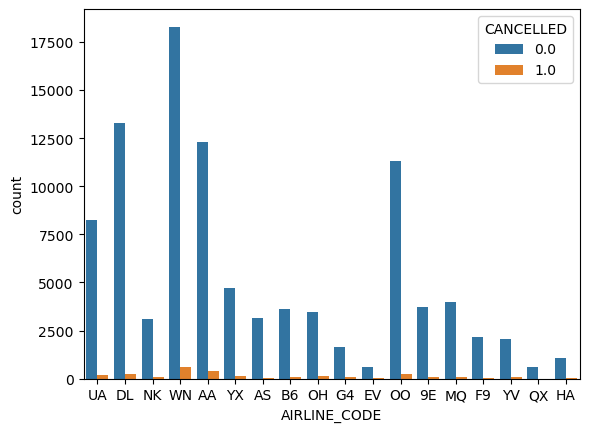

In [196]:
# WHICH AIRLNE HAS MAXIMUN CANCELLATIONS 
sns.countplot(x=chunk2['AIRLINE_CODE'],hue=chunk2['CANCELLED'])

#WN AIRLINE HAS HIGHEST CANCELLED FLIGHTS THAN OTHERS


<Axes: xlabel='AIRLINE_CODE', ylabel='count'>

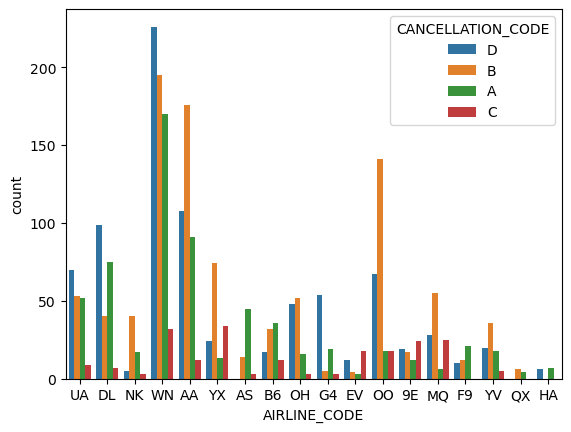

In [197]:
# REASONS BEHIND CANCELLATION

sns.countplot(x=chunk2['AIRLINE_CODE'],hue=chunk2['CANCELLATION_CODE'])

# WN MADEJAST CANCELLED THEN AA
# WN HAS HIGHEST CANCELLATION,REASON IS MAXIMUM D,THEN B
#AA made B maximum reason aahe,then D

In [198]:
chunk2['CANCELLED'] = chunk2['CANCELLED'].replace({0.0:0,1.0:1})

In [199]:
# Dropping redundant and not useful columns 

In [200]:
chunk2.drop(columns=['AIRLINE','AIRLINE_DOT','DOT_CODE','ORIGIN_CITY','DEST_CITY','DIVERTED','CRS_ARR_TIME','ARR_TIME','CRS_DEP_TIME','DEP_TIME','ELAPSED_TIME'],axis=1,inplace=True)

# Null value Treatment for delay columns
Logic to fill with 0 is because in the dataset the flights having the no delay they are on time 

In [201]:
chunk2['DELAY_DUE_CARRIER']=chunk2['DELAY_DUE_CARRIER'].fillna(0)

In [202]:
chunk2['DELAY_DUE_LATE_AIRCRAFT']=chunk2['DELAY_DUE_LATE_AIRCRAFT'].fillna(0)
chunk2['DELAY_DUE_NAS']=chunk2['DELAY_DUE_NAS'].fillna(0)
chunk2['DELAY_DUE_SECURITY']=chunk2['DELAY_DUE_SECURITY'].fillna(0)
chunk2['DELAY_DUE_WEATHER']=chunk2['DELAY_DUE_WEATHER'].fillna(0)
chunk2['CANCELLATION_CODE']=chunk2['CANCELLATION_CODE'].fillna(0)

In [203]:
# Splitting FL_DATE into 3 columns FlightYear,FlightDay,FlightMonth

In [204]:
chunk2['FlightYear']=chunk2['FL_DATE'].apply(lambda x:int(x.split('-')[0]))
chunk2['FlightDay']=chunk2['FL_DATE'].apply(lambda x:int(x.split('-')[2]))
chunk2['FlightMonth']=chunk2['FL_DATE'].apply(lambda x:int(x.split('-')[1]))

In [205]:
chunk2.drop(columns='FL_DATE',axis=0,inplace=True)

In [206]:
chunk2.reset_index(inplace=True)

In [207]:
chunk2.head(1)

,index,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,0,UA,1562,FLL,EWR,-4.0,19.0,1210.0,1443.0,4.0,-14.0,0.0,0,186.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,9,1


In [208]:
chunk2.drop('index',axis=1,inplace=True)

In [209]:
# Since we are predicting flight cancellation for normal scenario we will drop the covid data i.e. March 2020 data 

In [210]:
chunk2 = chunk2[~((chunk2.FlightYear==2020) & (chunk2.FlightMonth==3) )]
chunk2

,AIRLINE_CODE,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,UA,1562,FLL,EWR,-4.0,19.0,1210.0,1443.0,4.0,-14.0,0.0,0,186.0,153.0,1065.0,0.0,0.0,0.0,0.0,0.0,2019,9,1
1,DL,1149,MSP,SEA,-6.0,9.0,2123.0,2232.0,38.0,-5.0,0.0,0,235.0,189.0,1399.0,0.0,0.0,0.0,0.0,0.0,2022,19,11
2,UA,459,DEN,MSP,6.0,20.0,1020.0,1247.0,5.0,0.0,0.0,0,118.0,87.0,680.0,0.0,0.0,0.0,0.0,0.0,2022,22,7
3,DL,2295,MSP,SFO,-1.0,27.0,1635.0,1844.0,9.0,24.0,0.0,0,260.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0,2023,6,3
4,NK,407,MCO,DFW,-2.0,15.0,1853.0,2026.0,14.0,-1.0,0.0,0,181.0,153.0,985.0,0.0,0.0,0.0,0.0,0.0,2020,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,OO,3991,SEA,BOI,8.0,13.0,1531.0,1723.0,3.0,-13.0,0.0,0,89.0,52.0,399.0,0.0,0.0,0.0,0.0,0.0,2019,11,12
99996,WN,343,ATL,DAL,108.0,11.0,1929.0,2029.0,4.0,108.0,0.0,0,135.0,120.0,721.0,0.0,0.0,108.0,0.0,0.0,2021,4,11
99997,YX,4651,SRQ,DCA,-3.0,50.0,1229.0,1425.0,4.0,29.0,0.0,0,138.0,116.0,851.0,0.0,0.0,29.0,0.0,0.0,2020,26,12
99998,AA,1469,DFW,RSW,-5.0,17.0,727.0,1036.0,3.0,-11.0,0.0,0,155.0,129.0,1017.0,0.0,0.0,0.0,0.0,0.0,2019,20,10


<Axes: xlabel='FlightYear', ylabel='FL_NUMBER'>

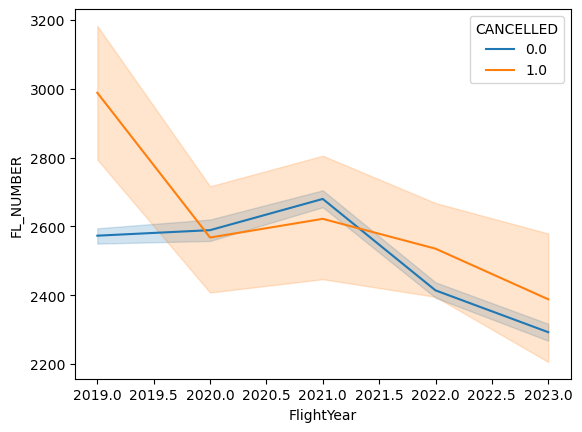

In [211]:
sns.lineplot(x=chunk2['FlightYear'],y=chunk2['FL_NUMBER'],hue=chunk2['CANCELLED'])

#2019 made highest flights cancel,then steap decrease,then after 2020 steapincrease 2021 2nd highest cancelled flights.

<Axes: xlabel='FlightMonth', ylabel='FL_NUMBER'>

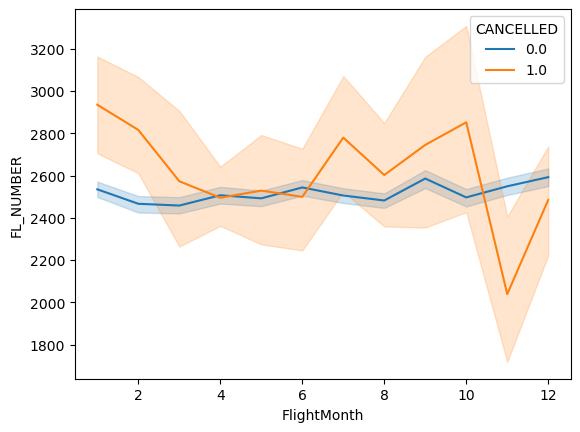

In [212]:
sns.lineplot(x=chunk2['FlightMonth'],y=chunk2['FL_NUMBER'],hue=chunk2['CANCELLED'])

# 6,8  month made =1 flights jast cancel hotat with flightnumber =2900

In [213]:
chunk2.describe()

,FL_NUMBER,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
count,97764.000000,95565.000000,95538.000000,95538.000000,95507.000000,95507.000000,95333.000000,97764.000000,97762.000000,95333.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000
mean,2518.144051,10.367446,16.668844,1350.317539,1460.365942,7.736438,4.549915,0.022871,142.037018,112.067626,807.655241,4.644071,0.748271,2.288849,0.025388,4.540659,2020.894225,15.749397,6.314799
std,1743.064404,50.153165,9.201122,501.400717,527.281739,6.331721,52.079040,0.149494,71.178570,69.354607,585.192296,33.469210,15.069632,14.055648,1.483338,25.065885,1.425801,8.762046,3.375567
min,1.000000,-68.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,20.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000
25%,1065.000000,-6.000000,11.000000,930.000000,1048.000000,4.000000,-15.000000,0.000000,90.000000,61.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,8.000000,3.000000
50%,2163.000000,-2.000000,14.000000,1333.000000,1459.000000,6.000000,-7.000000,0.000000,125.000000,95.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,16.000000,6.000000
75%,3786.000000,7.000000,19.000000,1751.000000,1907.000000,9.000000,7.000000,0.000000,172.000000,142.000000,1045.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,23.000000,9.000000
max,8814.000000,1643.000000,172.000000,2400.000000,2400.000000,222.000000,1644.000000,1.000000,685.000000,661.000000,5095.000000,1643.000000,1230.000000,1124.000000,286.000000,1321.000000,2023.000000,31.000000,12.000000


In [214]:
chunk2['ORIGIN'].nunique()

375

In [215]:
chunk2['DEST'].nunique()

368

In [216]:
chunk2['AIRLINE_CODE'].value_counts()
# frequncy encoding as different counts for each category
chunk2['AIRLINE_CODE'].value_counts(normalize=True)

WN    0.189497
DL    0.134825
AA    0.126662
OO    0.115810
UA    0.084561
YX    0.048730
MQ    0.040864
9E    0.038092
B6    0.037018
OH    0.035923
AS    0.032323
NK    0.032016
F9    0.022012
YV    0.021061
G4    0.017389
HA    0.010669
QX    0.006536
EV    0.006014
Name: AIRLINE_CODE, dtype: float64

<Axes: >

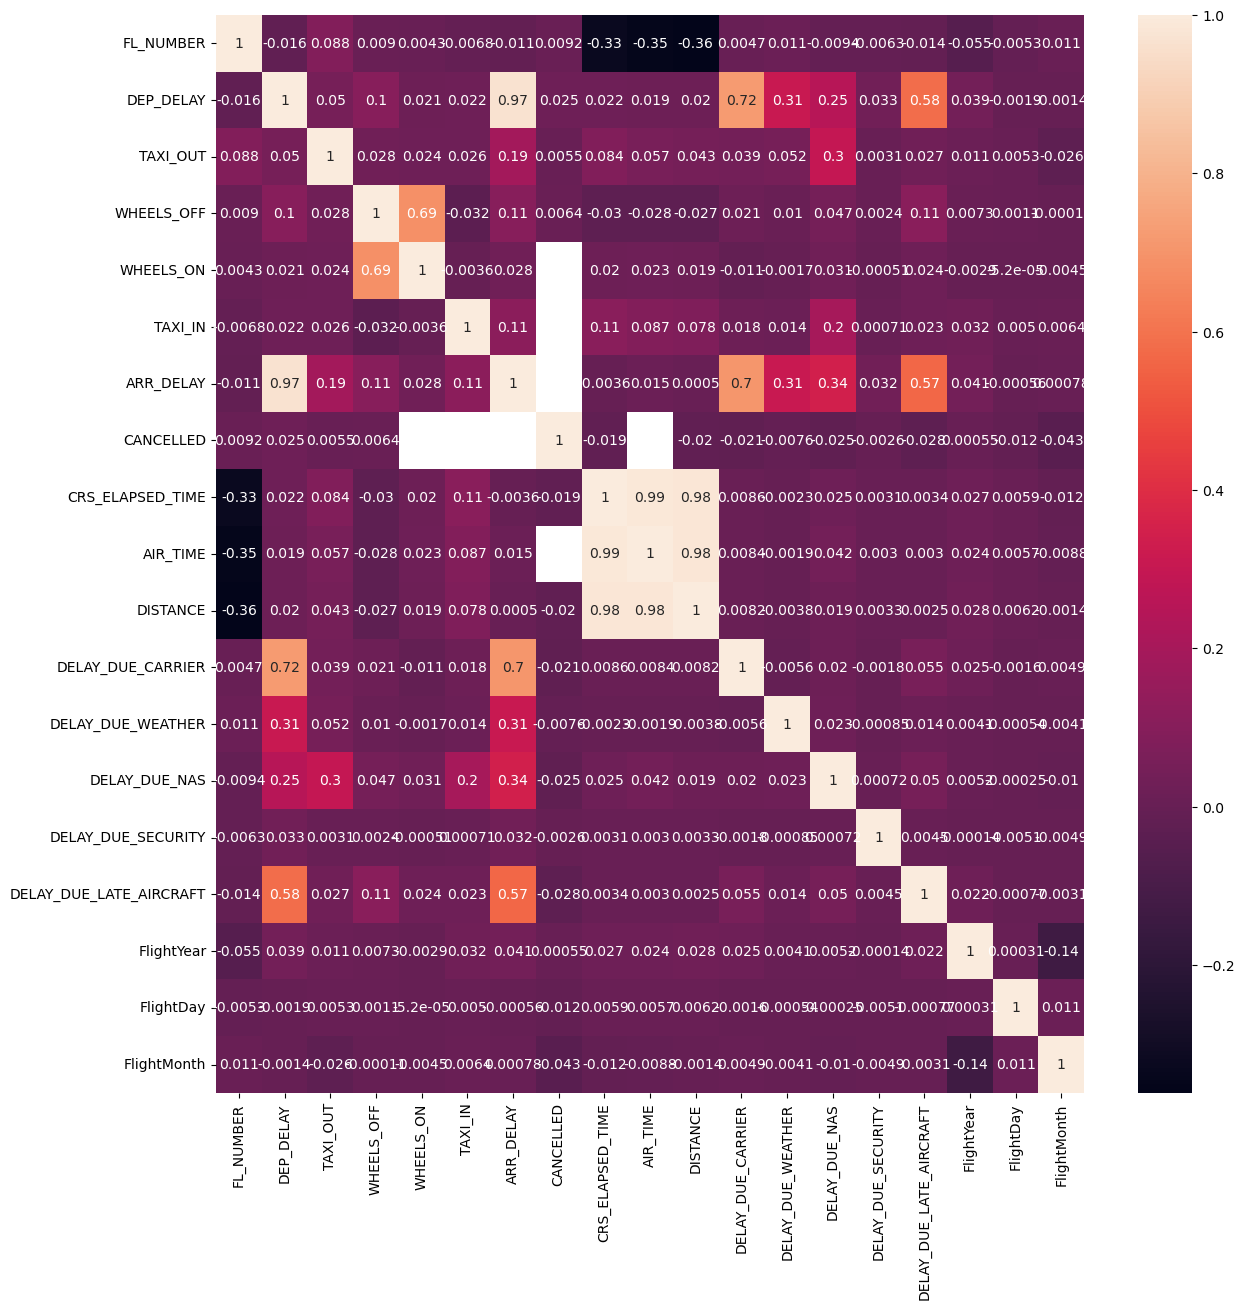

In [217]:
plt.figure(figsize=[14,14])


sns.heatmap(chunk2.select_dtypes(exclude='object').corr(),annot=True)

In [218]:

# Converting the Categorical into numeric for machine learning model 

In [219]:
# FREQUENCY/PERCENTAGE ENCODING,CATBOOST ENCODING

In [220]:
d = chunk2['AIRLINE_CODE'].value_counts(normalize=True).to_dict()
chunk2['AIRLINE_CODE_en'] = chunk2['AIRLINE_CODE'].map(d)
chunk2.drop(columns='AIRLINE_CODE',axis=1,inplace=True)

In [221]:
import  category_encoders as ce 
def catboost(catin , tar):
    catboo=ce.cat_boost.CatBoostEncoder()
    catboo.fit(catin,tar)
    chunk2_encode=catboo.transform(catin)
    
    return chunk2_encode

In [222]:
# CAT BOOST ENCONDING FOR ORIGIN AND DEST

In [223]:
chunk2['ORIGIN'] = catboost(chunk2.ORIGIN, chunk2.CANCELLED)
chunk2['DEST'] = catboost(chunk2.DEST, chunk2.CANCELLED)

In [224]:
chunk2['CANCELLATION_CODE'].isnull().sum()

0

In [225]:
chunk2['CANCELLATION_CODE'].value_counts()

0    95528
B      951
A      592
D      488
C      205
Name: CANCELLATION_CODE, dtype: int64

In [226]:
# FREQUENCY ENCODING FOR CANCELLATION_CODE

In [227]:
v = chunk2['CANCELLATION_CODE'].value_counts(normalize=True).to_dict()
chunk2['CANCELLATION_CODE'] = chunk2['CANCELLATION_CODE'].replace({'B': 0.00957, 'D': 0.008212, 'A': 0.006503, 'C': 0.002115})
chunk2['CANCELLATION_CODE'].astype('float')




0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: CANCELLATION_CODE, Length: 97764, dtype: float64

In [228]:
chunk2.isnull().sum()

FL_NUMBER                     0
ORIGIN                        0
DEST                          0
DEP_DELAY                  2199
TAXI_OUT                   2226
WHEELS_OFF                 2226
WHEELS_ON                  2257
TAXI_IN                    2257
ARR_DELAY                  2431
CANCELLED                     0
CANCELLATION_CODE             0
CRS_ELAPSED_TIME              2
AIR_TIME                   2431
DISTANCE                      0
DELAY_DUE_CARRIER             0
DELAY_DUE_WEATHER             0
DELAY_DUE_NAS                 0
DELAY_DUE_SECURITY            0
DELAY_DUE_LATE_AIRCRAFT       0
FlightYear                    0
FlightDay                     0
FlightMonth                   0
AIRLINE_CODE_en               0
dtype: int64

# Handling imbalanced dataset with different methods

1.Centroid based undersampling


2.SMOTE oversampling




In [229]:
# 1.Centroid based undersampling

In [230]:
chunk2.isnull().sum()

FL_NUMBER                     0
ORIGIN                        0
DEST                          0
DEP_DELAY                  2199
TAXI_OUT                   2226
WHEELS_OFF                 2226
WHEELS_ON                  2257
TAXI_IN                    2257
ARR_DELAY                  2431
CANCELLED                     0
CANCELLATION_CODE             0
CRS_ELAPSED_TIME              2
AIR_TIME                   2431
DISTANCE                      0
DELAY_DUE_CARRIER             0
DELAY_DUE_WEATHER             0
DELAY_DUE_NAS                 0
DELAY_DUE_SECURITY            0
DELAY_DUE_LATE_AIRCRAFT       0
FlightYear                    0
FlightDay                     0
FlightMonth                   0
AIRLINE_CODE_en               0
dtype: int64

In [231]:
chunk2.describe()

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en
count,97764.000000,97764.000000,97764.000000,95565.000000,95538.000000,95538.000000,95507.000000,95507.000000,95333.000000,97764.000000,97764.000000,97762.000000,95333.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000,97764.000000
mean,2518.144051,0.022871,0.022861,10.367446,16.668844,1350.317539,1460.365942,7.736438,4.549915,0.022871,0.000178,142.037018,112.067626,807.655241,4.644071,0.748271,2.288849,0.025388,4.540659,2020.894225,15.749397,6.314799,0.102342
std,1743.064404,0.010707,0.011247,50.153165,9.201122,501.400717,527.281739,6.331721,52.079040,0.149494,0.001209,71.178570,69.354607,585.192296,33.469210,15.069632,14.055648,1.483338,25.065885,1.425801,8.762046,3.375567,0.058323
min,1.000000,0.000194,0.000124,-68.000000,1.000000,1.000000,1.000000,1.000000,-78.000000,0.000000,0.000000,20.000000,8.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,1.000000,1.000000,0.006014
25%,1065.000000,0.017517,0.016420,-6.000000,11.000000,930.000000,1048.000000,4.000000,-15.000000,0.000000,0.000000,90.000000,61.000000,376.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000,8.000000,3.000000,0.038092
50%,2163.000000,0.021745,0.022429,-2.000000,14.000000,1333.000000,1459.000000,6.000000,-7.000000,0.000000,0.000000,125.000000,95.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000,16.000000,6.000000,0.115810
75%,3786.000000,0.028230,0.027352,7.000000,19.000000,1751.000000,1907.000000,9.000000,7.000000,0.000000,0.000000,172.000000,142.000000,1045.250000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,23.000000,9.000000,0.134825
max,8814.000000,0.288982,0.255718,1643.000000,172.000000,2400.000000,2400.000000,222.000000,1644.000000,1.000000,0.009570,685.000000,661.000000,5095.000000,1643.000000,1230.000000,1124.000000,286.000000,1321.000000,2023.000000,31.000000,12.000000,0.189497


In [232]:
# NULL VALUE TREATMENT FOR COLUMNS OTHER THAN DELAY 

In [233]:
chunk2['WHEELS_OFF'] = chunk2['WHEELS_OFF'].fillna(chunk2['WHEELS_OFF'].median())
chunk2['WHEELS_ON'] = chunk2['WHEELS_ON'].fillna(chunk2['WHEELS_ON'].median())
chunk2['TAXI_IN'] = chunk2['TAXI_IN'].fillna(chunk2['TAXI_IN'].median())
chunk2['ARR_DELAY'] = chunk2['ARR_DELAY'].fillna(0)
chunk2['AIR_TIME'] = chunk2['AIR_TIME'].fillna(chunk2['AIR_TIME'].median())
chunk2['TAXI_OUT'] = chunk2['TAXI_OUT'].fillna(np.mean(chunk2['TAXI_OUT']))

chunk2['DEP_DELAY'] = chunk2['DEP_DELAY'].fillna(0)
chunk2['CRS_ELAPSED_TIME'] = chunk2['CRS_ELAPSED_TIME'].fillna(0)

In [234]:
chunk2.isnull().sum()

FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_DELAY                  0
CANCELLED                  0
CANCELLATION_CODE          0
CRS_ELAPSED_TIME           0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FlightYear                 0
FlightDay                  0
FlightMonth                0
AIRLINE_CODE_en            0
dtype: int64

In [235]:
chunk2['CANCELLED'] = chunk2['CANCELLED'].astype(int)

In [236]:
# Dividing into X(predictors ) and y(Target) 

In [237]:
X = chunk2.drop(["CANCELLED"],axis=1)
y =chunk2['CANCELLED']

In [238]:
X.isnull().sum()

FL_NUMBER                  0
ORIGIN                     0
DEST                       0
DEP_DELAY                  0
TAXI_OUT                   0
WHEELS_OFF                 0
WHEELS_ON                  0
TAXI_IN                    0
ARR_DELAY                  0
CANCELLATION_CODE          0
CRS_ELAPSED_TIME           0
AIR_TIME                   0
DISTANCE                   0
DELAY_DUE_CARRIER          0
DELAY_DUE_WEATHER          0
DELAY_DUE_NAS              0
DELAY_DUE_SECURITY         0
DELAY_DUE_LATE_AIRCRAFT    0
FlightYear                 0
FlightDay                  0
FlightMonth                0
AIRLINE_CODE_en            0
dtype: int64

In [239]:
chunk2[chunk2['CRS_ELAPSED_TIME'].isnull()==True]

,FL_NUMBER,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CANCELLED,CANCELLATION_CODE,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth,AIRLINE_CODE_en


In [240]:
# CLUSTER CENTROID UNDERSAMPLING

In [241]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE, RandomOverSampler

class HandleImbalance:
    def __init__(self, df):
        self.df = df
        self.X = df.drop(["CANCELLED"], axis=1)
        self.y = df['CANCELLED']

    def undersample(self):
        cc = ClusterCentroids(random_state=42)
        X_res, y_res = cc.fit_resample(self.X, self.y)
        return X_res, y_res

    def oversample_smote(self):
        sm = SMOTE(random_state=42)
        X_res, y_res = sm.fit_resample(self.X, self.y)
        return X_res, y_res

    def oversample_random(self):
        ros = RandomOverSampler(random_state=42)
        X_res, y_res = ros.fit_resample(self.X, self.y)
        return X_res, y_res



handle_imbalance = HandleImbalance(chunk2)
X_res_undersample, y_res_undersample = handle_imbalance.undersample()
X_res_smote, y_res_smote = handle_imbalance.oversample_smote()
X_res_random, y_res_random = handle_imbalance.oversample_random()


In [242]:
from sklearn.pipeline import Pipeline

In [243]:
X_res_undersample.columns

Index(['FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CANCELLATION_CODE',
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth',
       'AIRLINE_CODE_en'],
      dtype='object')

In [244]:
X_out = X_res_undersample[['FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth']]

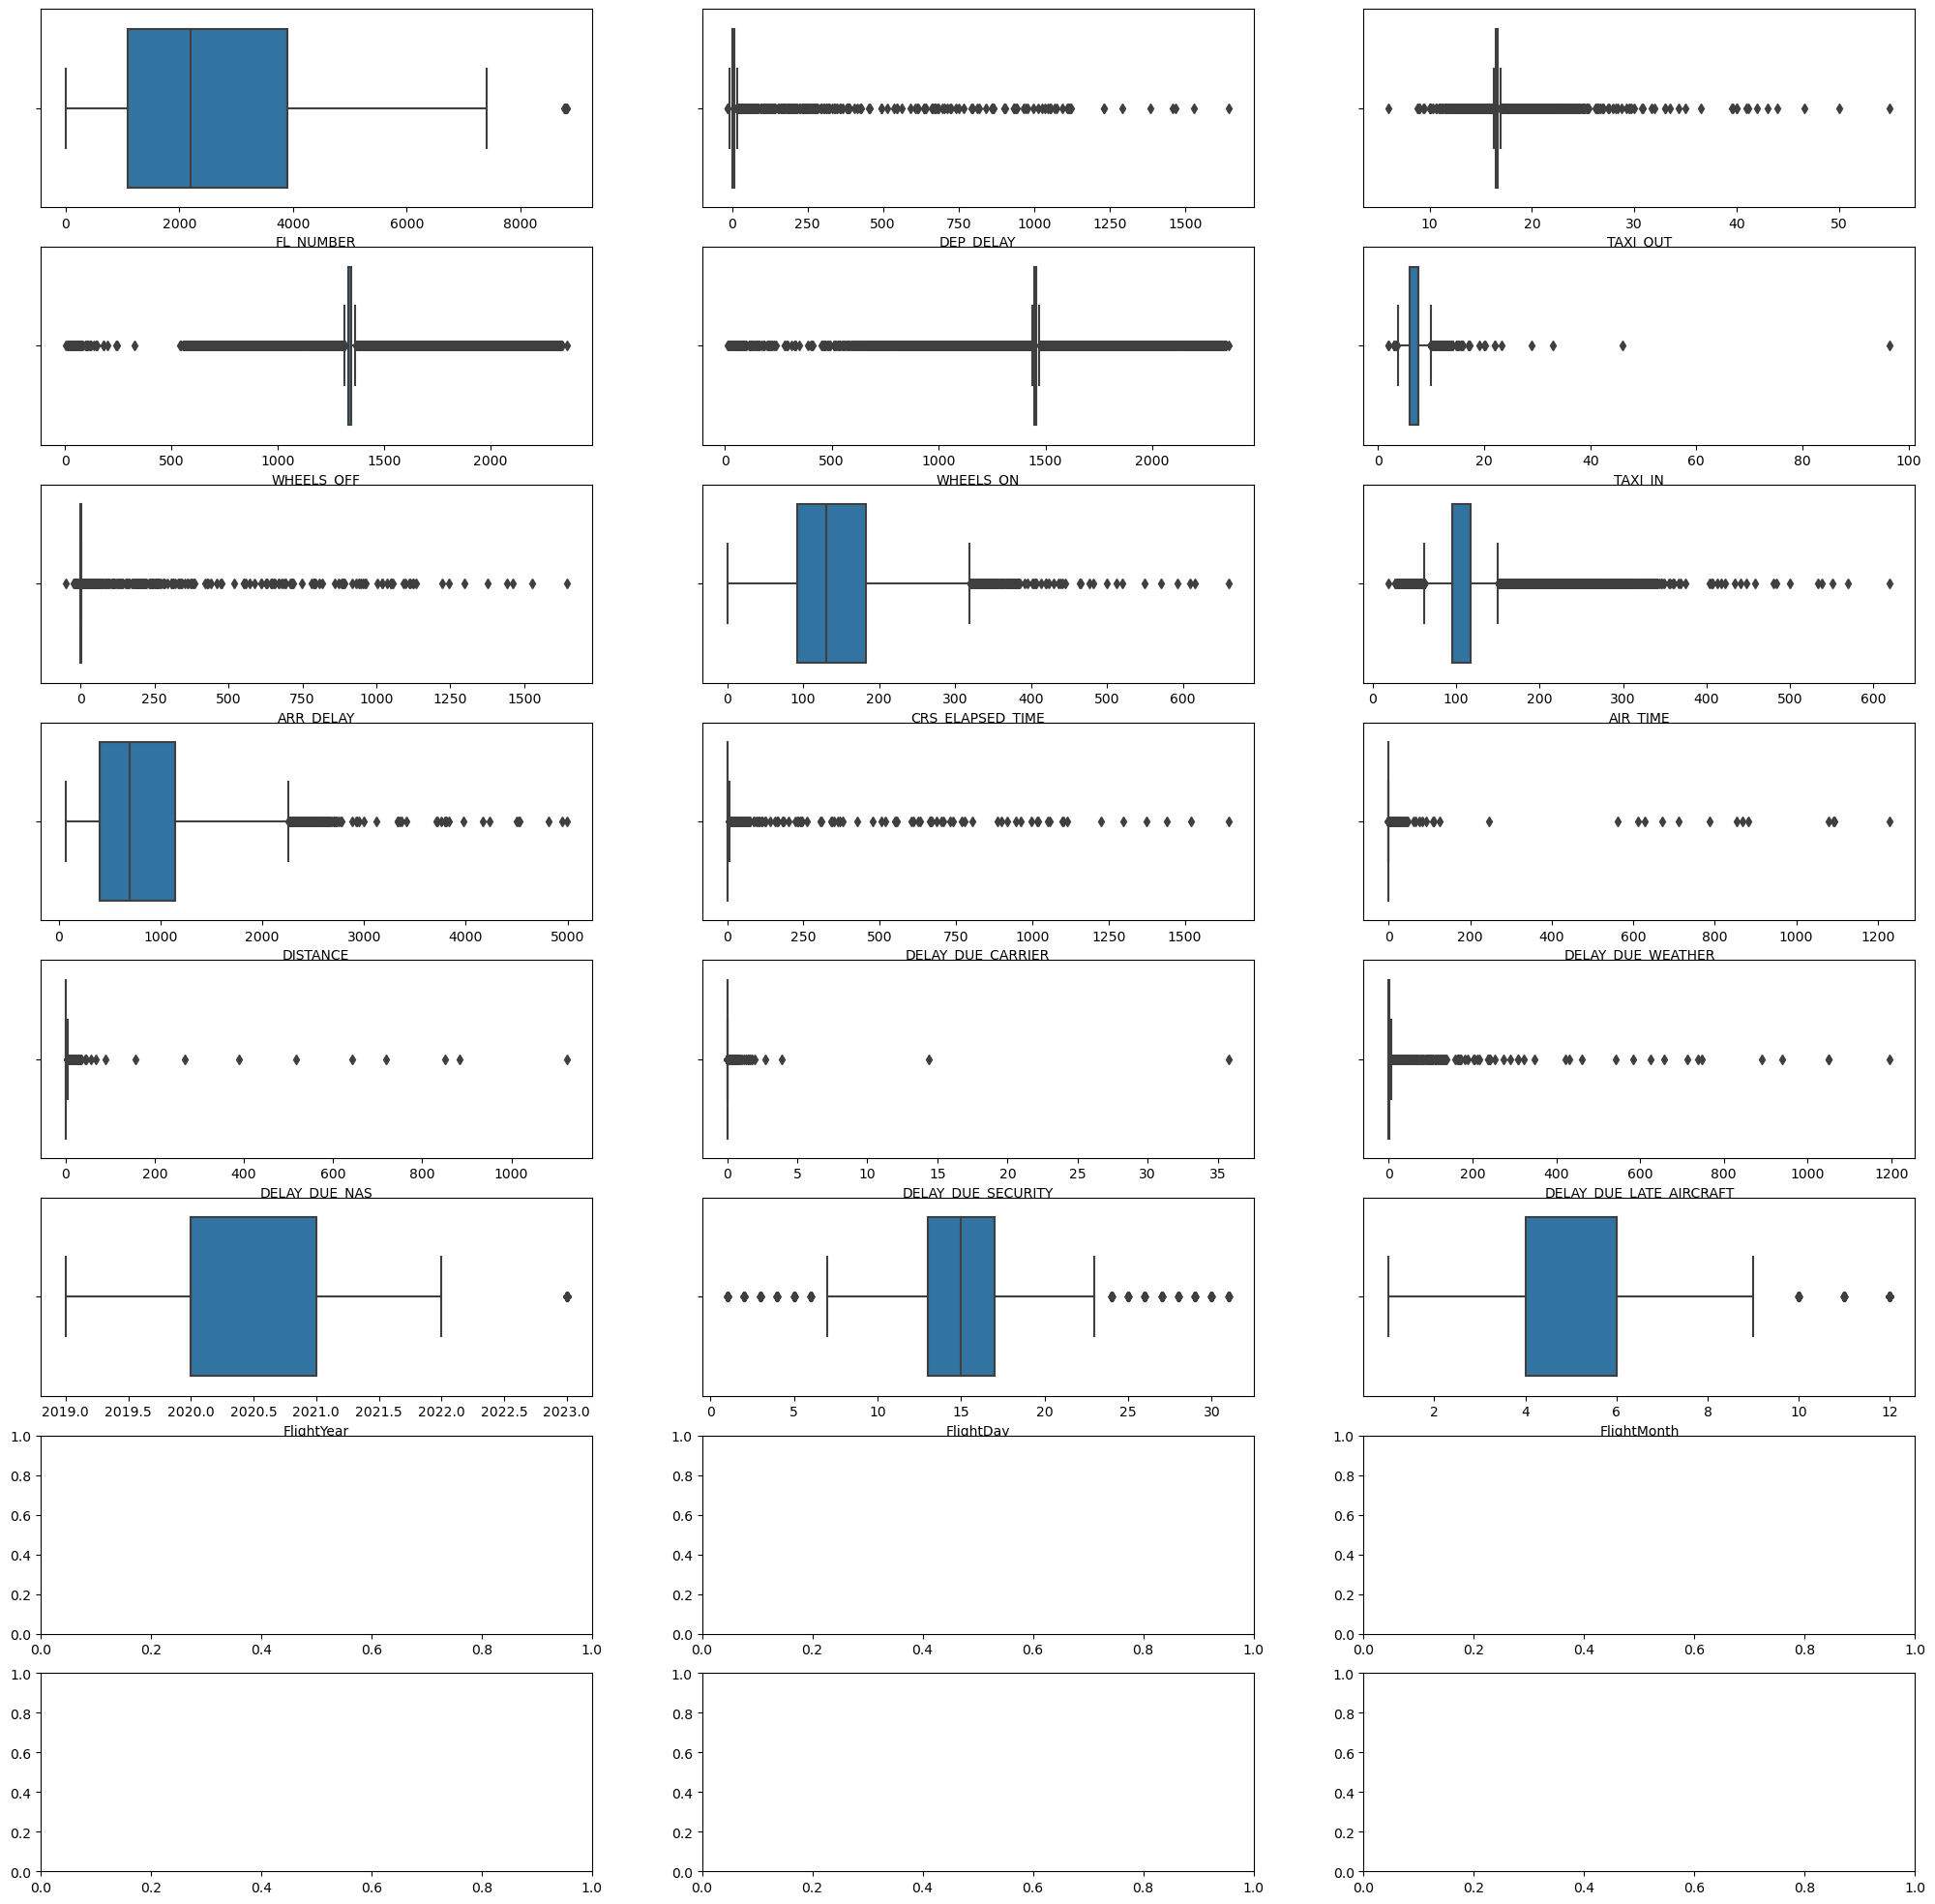

In [245]:
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

In [246]:
# Treating outliers using capping

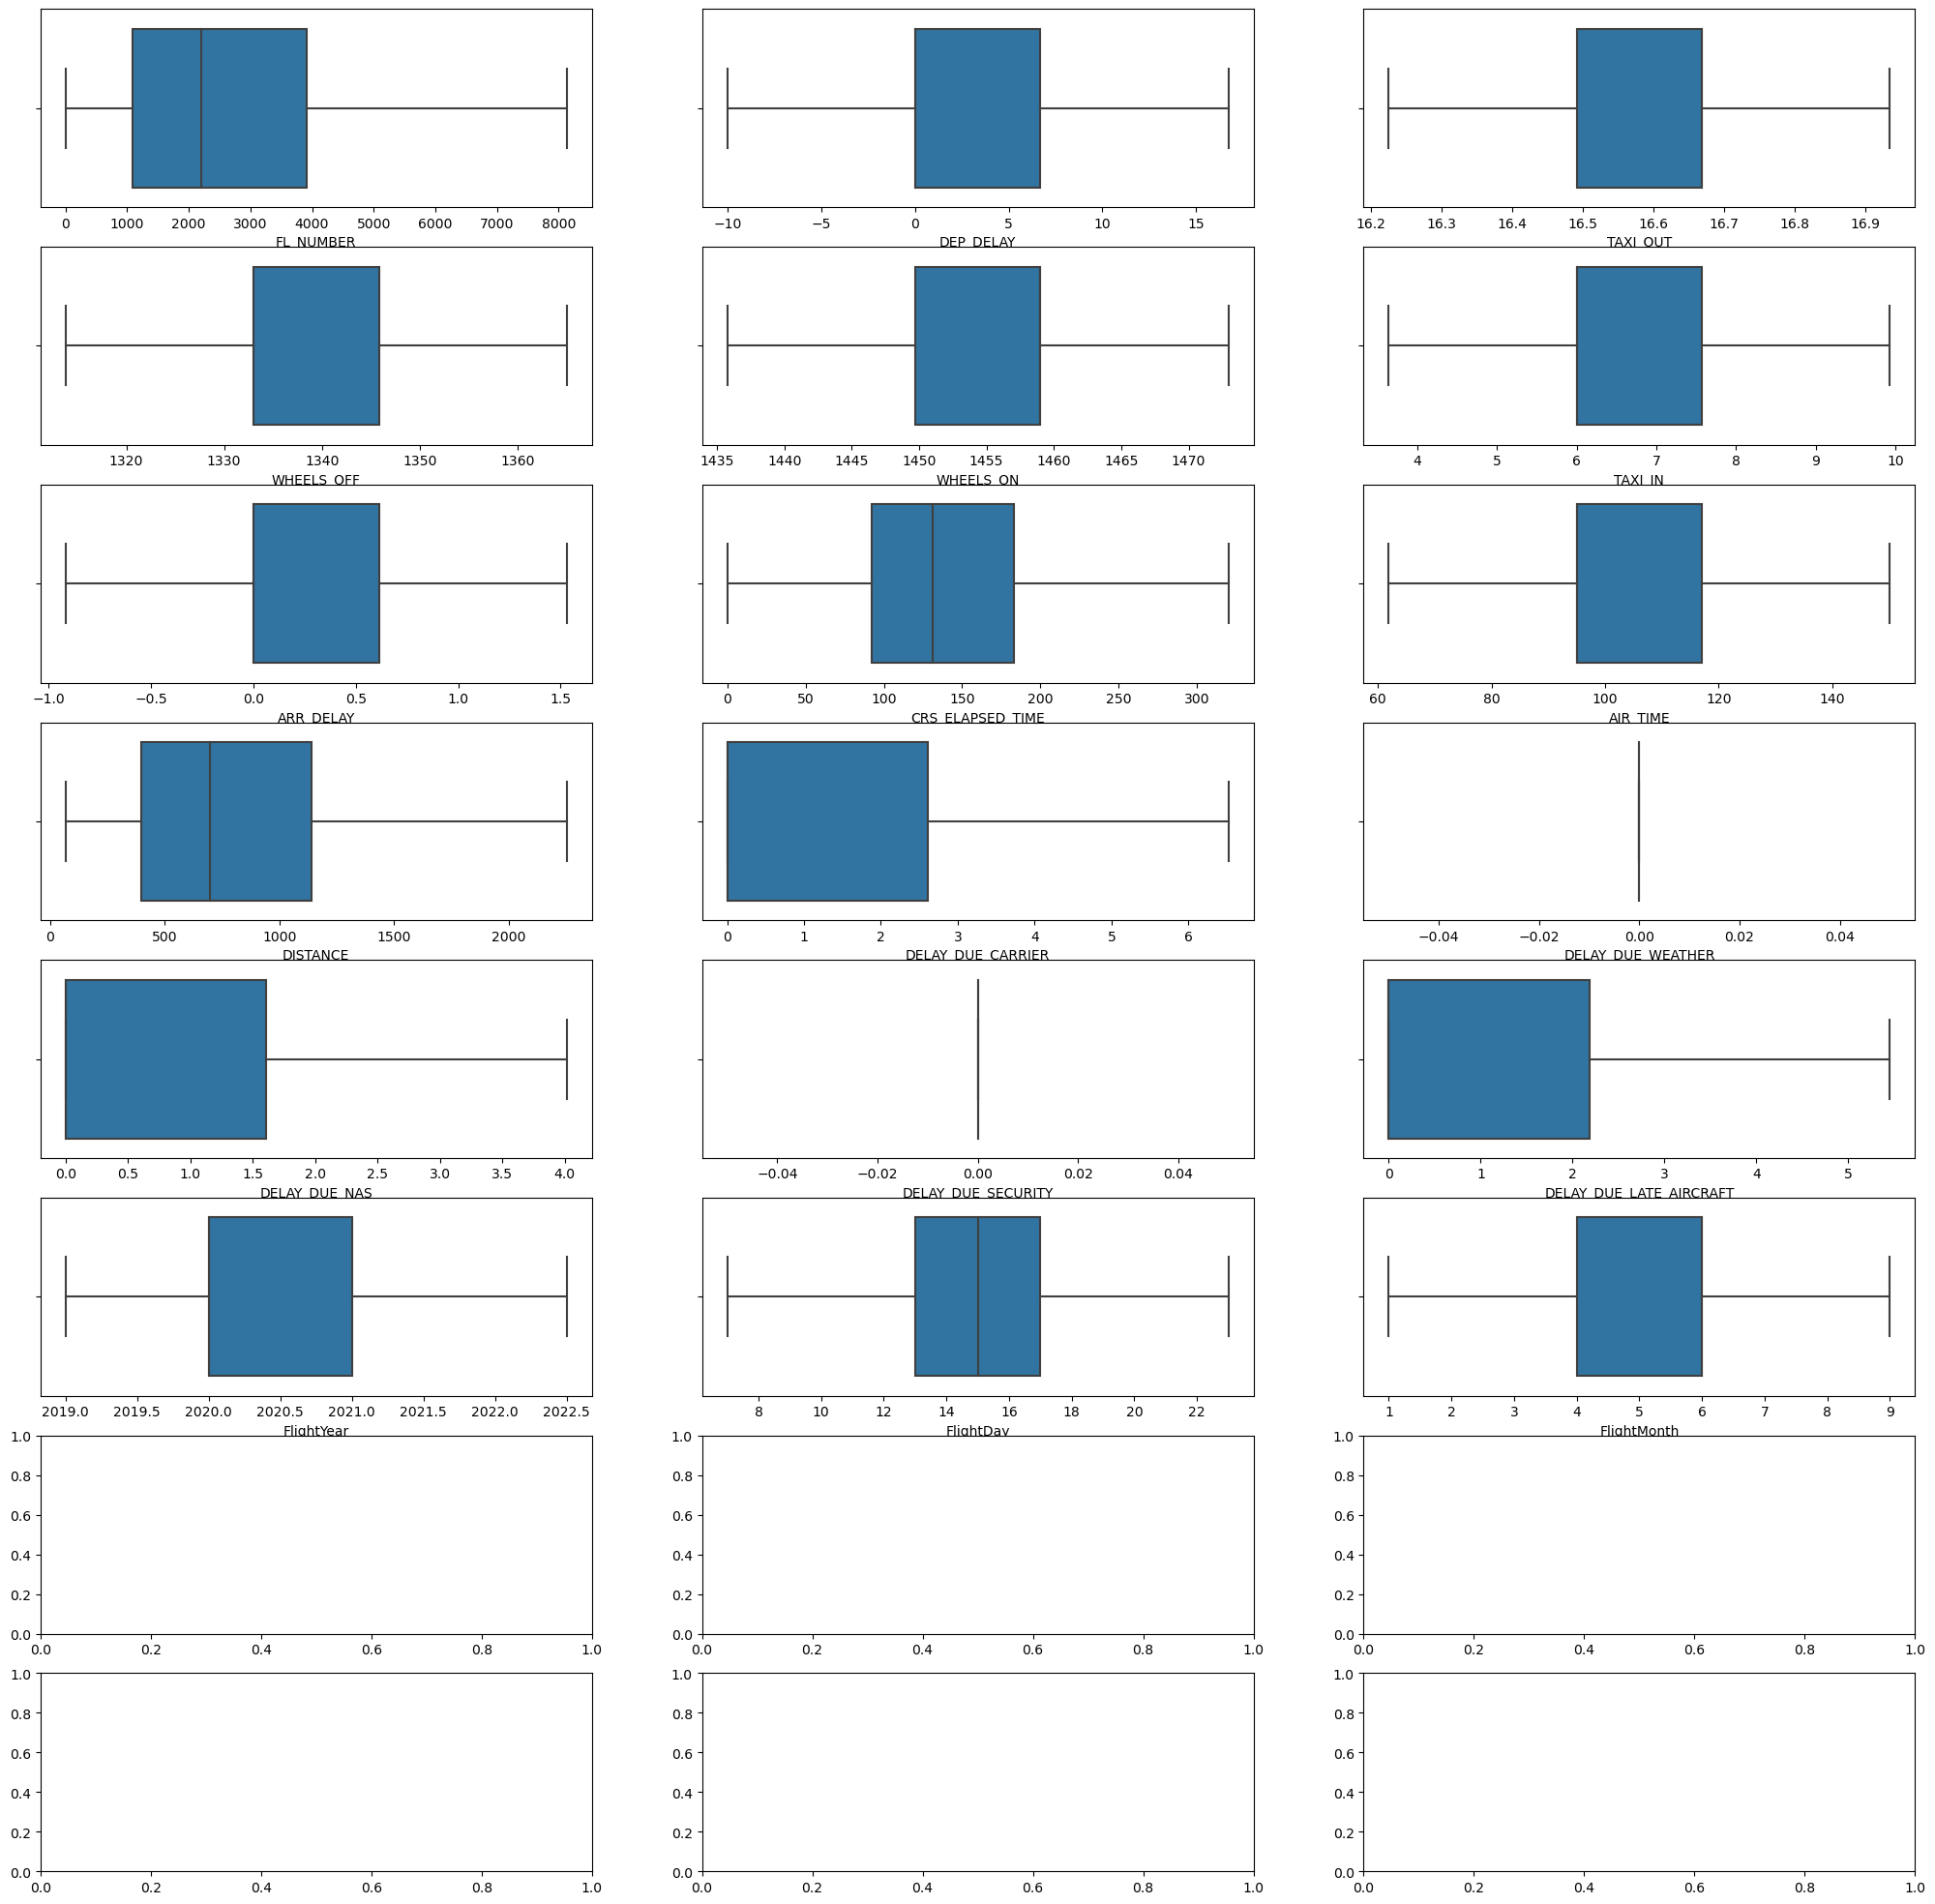

In [247]:
for i in X_out:
    q1=X_out[i].quantile(0.25)
    q3=X_out[i].quantile(0.75)
    iqr=q3-q1
    u=q3+(1.5*iqr)
    l=q1-(1.5*iqr)
    X_out[i]=X_out[i].apply(lambda x:l if x<l else u if x>u else x)

    
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out,ax.flatten()):
    
    sns.boxplot(x=X_out[var],ax=subplot)

plt.show()

In [248]:
X_res_undersample = pd.concat((X_res_undersample[['ORIGIN','DEST','CANCELLATION_CODE','AIRLINE_CODE_en']]  ,X_out),axis=1)

In [249]:
X_res_undersample

,ORIGIN,DEST,CANCELLATION_CODE,AIRLINE_CODE_en,FL_NUMBER,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,ARR_DELAY,CRS_ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FlightYear,FlightDay,FlightMonth
0,0.022208,0.022441,0.000000,0.135151,1962.0,6.705128,16.224804,1365.02225,1472.951242,5.743590,1.530342,78.166667,61.879850,294.782051,2.807692,0.0,2.346154,0.0,4.025641,2020.0,15.0,5.0
1,0.020272,0.024318,0.000000,0.070953,4824.0,5.621622,16.864865,1365.02225,1472.951242,7.040541,-0.635135,107.162162,77.608108,499.621622,5.716216,0.0,0.797297,0.0,1.581081,2021.0,17.0,6.0
2,0.024598,0.022842,0.000000,0.119110,245.0,6.409091,16.224804,1313.78665,1435.747931,7.295455,1.530342,136.386364,112.431818,810.045455,2.022727,0.0,4.017197,0.0,3.840909,2020.0,15.0,5.0
3,0.022212,0.024277,0.000000,0.078591,3690.0,-0.057971,16.449275,1313.78665,1435.747931,7.811594,-0.918205,125.710145,96.115942,634.014493,2.304348,0.0,0.666667,0.0,0.275362,2020.0,16.0,6.0
4,0.019956,0.024721,0.000000,0.122611,1069.0,11.456522,16.224804,1365.02225,1472.951242,7.652174,1.530342,184.521739,150.200250,1246.586957,2.978261,0.0,1.630435,0.0,5.453065,2021.0,12.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4467,0.033801,0.010793,0.009570,0.084561,2032.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,319.900168,95.000000,2254.618924,0.000000,0.0,0.000000,0.0,0.000000,2021.0,9.0,7.0
4468,0.023592,0.023621,0.008212,0.126662,1313.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,176.000000,95.000000,1120.000000,0.000000,0.0,0.000000,0.0,0.000000,2020.0,7.0,4.0
4469,0.013623,0.016899,0.006503,0.084561,2128.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,125.000000,95.000000,599.000000,0.000000,0.0,0.000000,0.0,0.000000,2022.0,23.0,6.0
4470,0.021705,0.017295,0.008212,0.189497,1720.0,0.000000,16.668844,1333.00000,1459.000000,6.000000,0.000000,85.000000,95.000000,417.000000,0.000000,0.0,0.000000,0.0,0.000000,2020.0,22.0,4.0


In [250]:
import warnings
warnings.filterwarnings('ignore')

In [251]:
# FEATURE SELECTION USING RFE

In [252]:
from sklearn.metrics import confusion_matrix

In [253]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV



rfe_mod = RFECV(DecisionTreeClassifier(),min_features_to_select = 10) 
myvalues= rfe_mod.fit(X_res_undersample,y_res_undersample)

In [254]:
myvalues.support_
myvalues.ranking_ 

print("Num Features: %s" % (myvalues.n_features_))
print("Selected Features: %s" % (myvalues.support_))
print("Feature Ranking: %s" % (myvalues.ranking_))  

Num Features: 10
Selected Features: [False False  True False False False False False False  True False False
 False False  True  True  True  True  True  True  True  True]
Feature Ranking: [13 12  1  7  6  5  4  3  2  1  9 11 10  8  1  1  1  1  1  1  1  1]


In [255]:
# FEATURES SELECTED BY RFE

In [256]:
myvalues.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

In [257]:


X_res_feat_sel = X_res_undersample[myvalues.feature_names_in_]

In [258]:
# MODEL FITTING ON BALANCED DATA WITH FEATURE SELECTION

In [259]:
import statsmodels.api as sm
X_train, X_test, y_train, y_test = train_test_split(X_res_feat_sel, y_res_undersample,
                                                    random_state=0)

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [261]:
def performance(model):
        model.fit(X_train, y_train) 
        y_pred_tr = model.predict(X_train)
        y_pred_tst = model.predict(X_test)
      
        plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test,y_pred_tst),annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.show()
        
        print("Train")
        print(classification_report(y_train, y_pred_tr))
        print("Test")
        print(classification_report(y_test, y_pred_tst))

In [262]:
# GaussianNB

In [263]:
from sklearn.model_selection import GridSearchCV
gn=GaussianNB()
param_grid = {
    'var_smoothing':[0.01,0.001,0.5,1,8,15]
}
grid_search = GridSearchCV(estimator=gn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
k = grid_search.best_estimator_
k

GaussianNB(var_smoothing=0.001)

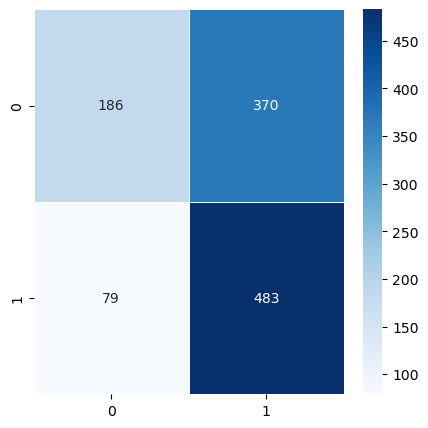

Train
              precision    recall  f1-score   support

           0       0.75      0.37      0.50      1680
           1       0.58      0.87      0.70      1674

    accuracy                           0.62      3354
   macro avg       0.66      0.62      0.60      3354
weighted avg       0.66      0.62      0.60      3354

Test
              precision    recall  f1-score   support

           0       0.70      0.33      0.45       556
           1       0.57      0.86      0.68       562

    accuracy                           0.60      1118
   macro avg       0.63      0.60      0.57      1118
weighted avg       0.63      0.60      0.57      1118



In [264]:
gn=GaussianNB(**best_params)
performance(gn)

In [265]:
# KNeighborsClassifier

In [266]:
s= StandardScaler()

In [267]:
X_trainknn= X_train.copy()
X_testknn=X_test.copy()

In [268]:
for i in X_train.columns:
    X_trainknn[i]=s.fit_transform(X_trainknn[[i]])
    X_trainknn[i]=s.transform(X_trainknn[[i]])
    

In [269]:

param_grid = {
    'weights': ['uniform','distance'],
    'n_neighbors':[6,10,15]
}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainknn, y_train)
best_params = grid_search.best_params_
k = grid_search.best_estimator_

In [270]:
k

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [271]:
kn = KNeighborsClassifier(**best_params)


In [272]:
kn.fit(X_trainknn,y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [273]:
print(classification_report(y_train,kn.predict(X_trainknn)))
print(classification_report(y_test,kn.predict(X_testknn)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1674

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       556
           1       0.50      1.00      0.67       562

    accuracy                           0.50      1118
   macro avg       0.25      0.50      0.33      1118
weighted avg       0.25      0.50      0.34      1118



<Axes: >

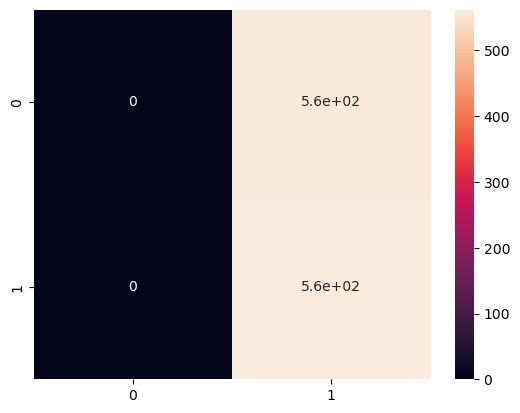

In [274]:
sns.heatmap(confusion_matrix(y_test,kn.predict(X_testknn)),annot=True)

In [275]:
# LogisticRegression

In [276]:

param_grid = {
   
    'max_iter' : range(14,15,16),
    'C': [0.001,0.00001] }
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
regul_lr = grid_search.best_estimator_

In [277]:
regul_lr

LogisticRegression(C=0.001, max_iter=14)

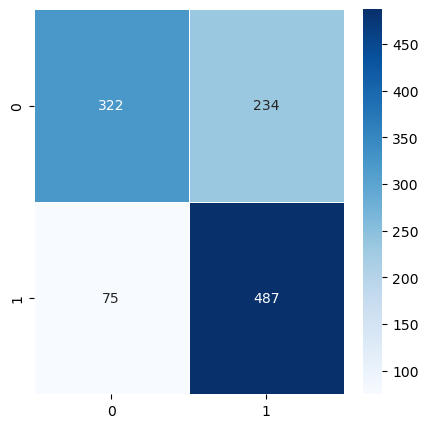

Train
              precision    recall  f1-score   support

           0       0.85      0.65      0.74      1680
           1       0.72      0.89      0.79      1674

    accuracy                           0.77      3354
   macro avg       0.79      0.77      0.77      3354
weighted avg       0.79      0.77      0.77      3354

Test
              precision    recall  f1-score   support

           0       0.81      0.58      0.68       556
           1       0.68      0.87      0.76       562

    accuracy                           0.72      1118
   macro avg       0.74      0.72      0.72      1118
weighted avg       0.74      0.72      0.72      1118



In [278]:
lr = LogisticRegression(max_iter=14,C=0.00001)
performance(lr)

In [279]:
from sklearn.metrics import f1_score,accuracy_score

In [280]:
accuracy_score(y_test,lr.predict(X_test))

0.723613595706619

In [281]:
lr.coef_

array([[ 1.56645930e-05,  1.84338077e-05,  2.58728154e-05,
        -9.77223160e-07, -3.10996399e-05, -2.37133974e-02,
         3.91410144e-04, -2.13408354e-02,  1.75519620e-02,
        -5.19386225e-03, -1.32231820e-03,  1.20363900e-03,
        -2.54170593e-02, -7.60488675e-04, -1.02245972e-02,
         0.00000000e+00, -6.29713751e-03,  0.00000000e+00,
        -8.92441729e-03,  3.03487327e-03, -1.13996050e-03,
        -3.01257340e-03]])

In [282]:
lr.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
       'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear',
       'FlightDay', 'FlightMonth'], dtype=object)

In [283]:
# Decision Tree 

In [284]:

param_grid = {
   
    'max_depth' : range(7,11),
    'criterion' : ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
dt_pruned  = grid_search.best_estimator_

In [285]:
best_params

{'criterion': 'gini', 'max_depth': 7}

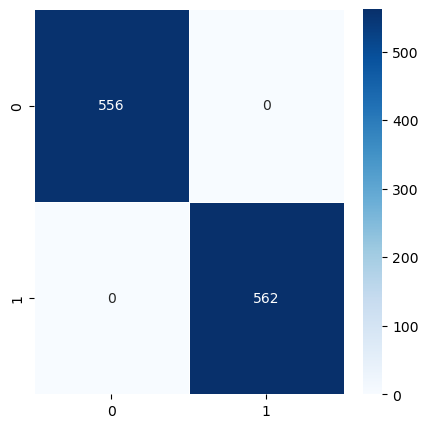

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680
           1       1.00      1.00      1.00      1674

    accuracy                           1.00      3354
   macro avg       1.00      1.00      1.00      3354
weighted avg       1.00      1.00      1.00      3354

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       562

    accuracy                           1.00      1118
   macro avg       1.00      1.00      1.00      1118
weighted avg       1.00      1.00      1.00      1118



In [286]:
dt=DecisionTreeClassifier(**best_params)
performance(dt)

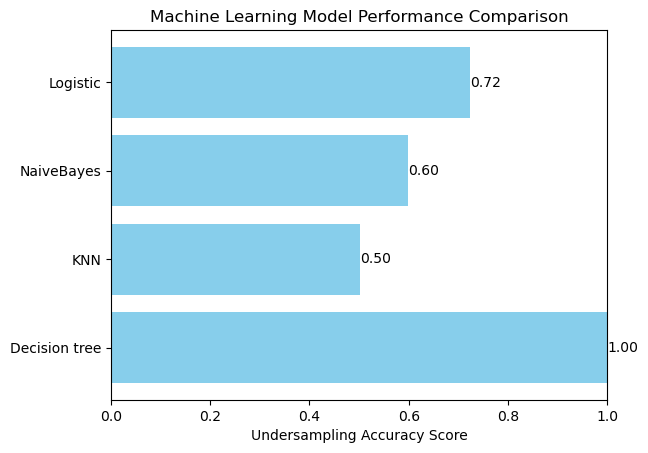

In [287]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores = [accuracy_score(y_test,dt.predict(X_test)),accuracy_score(y_test,kn.predict(X_test)),accuracy_score(y_test,gn.predict(X_test))
                  ,accuracy_score(y_test,lr.predict(X_test))]

# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Undersampling Accuracy Score')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

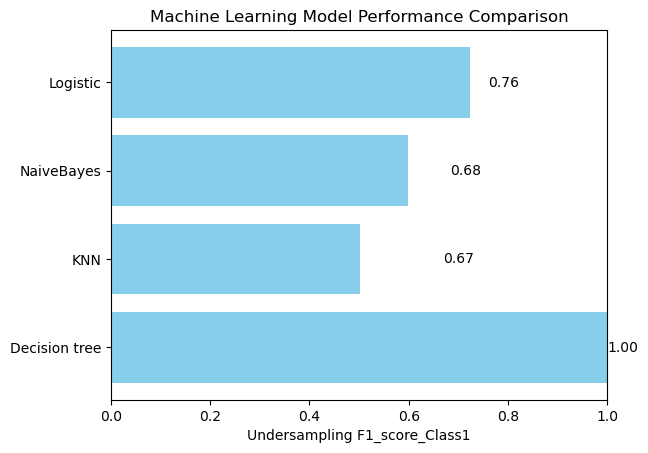

In [288]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
F1_score_Class1 = [f1_score(y_test,dt.predict(X_test)),f1_score(y_test,kn.predict(X_test)),f1_score(y_test,gn.predict(X_test))
                  ,f1_score(y_test,lr.predict(X_test))]


# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Undersampling F1_score_Class1')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(F1_score_Class1):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

In [289]:
from sklearn.metrics import roc_auc_score,roc_curve

In [290]:
def roc_plot(model,x,y,label):
    yprod= model.predict_proba(x)[:,1]
    
    fpr,tpr,thres = roc_curve(y,yprod)
    
    auc_score = roc_auc_score(y,yprod)
    
    plt.plot(fpr,tpr, label=label+'(AUC_SCore =%0.4f )'% auc_score)
    
    
    plt.xlim([0.0,1.0])
    
    plt.ylim([0.0,1.0])
    
    plt.plot([0, 1], [0, 1],'r--')


    plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 12)



    


    plt.grid(True)
    
    plt.legend(loc='lower right')
    
    
    

In [291]:
# 2. SMOTE based Oversampling

In [292]:
X_res_smote.columns

Index(['FL_NUMBER', 'ORIGIN', 'DEST', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 'CANCELLATION_CODE',
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth',
       'AIRLINE_CODE_en'],
      dtype='object')

In [293]:
X_out_2 = X_res_smote[['FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'ARR_DELAY', 
       'CRS_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'FlightYear', 'FlightDay', 'FlightMonth']]

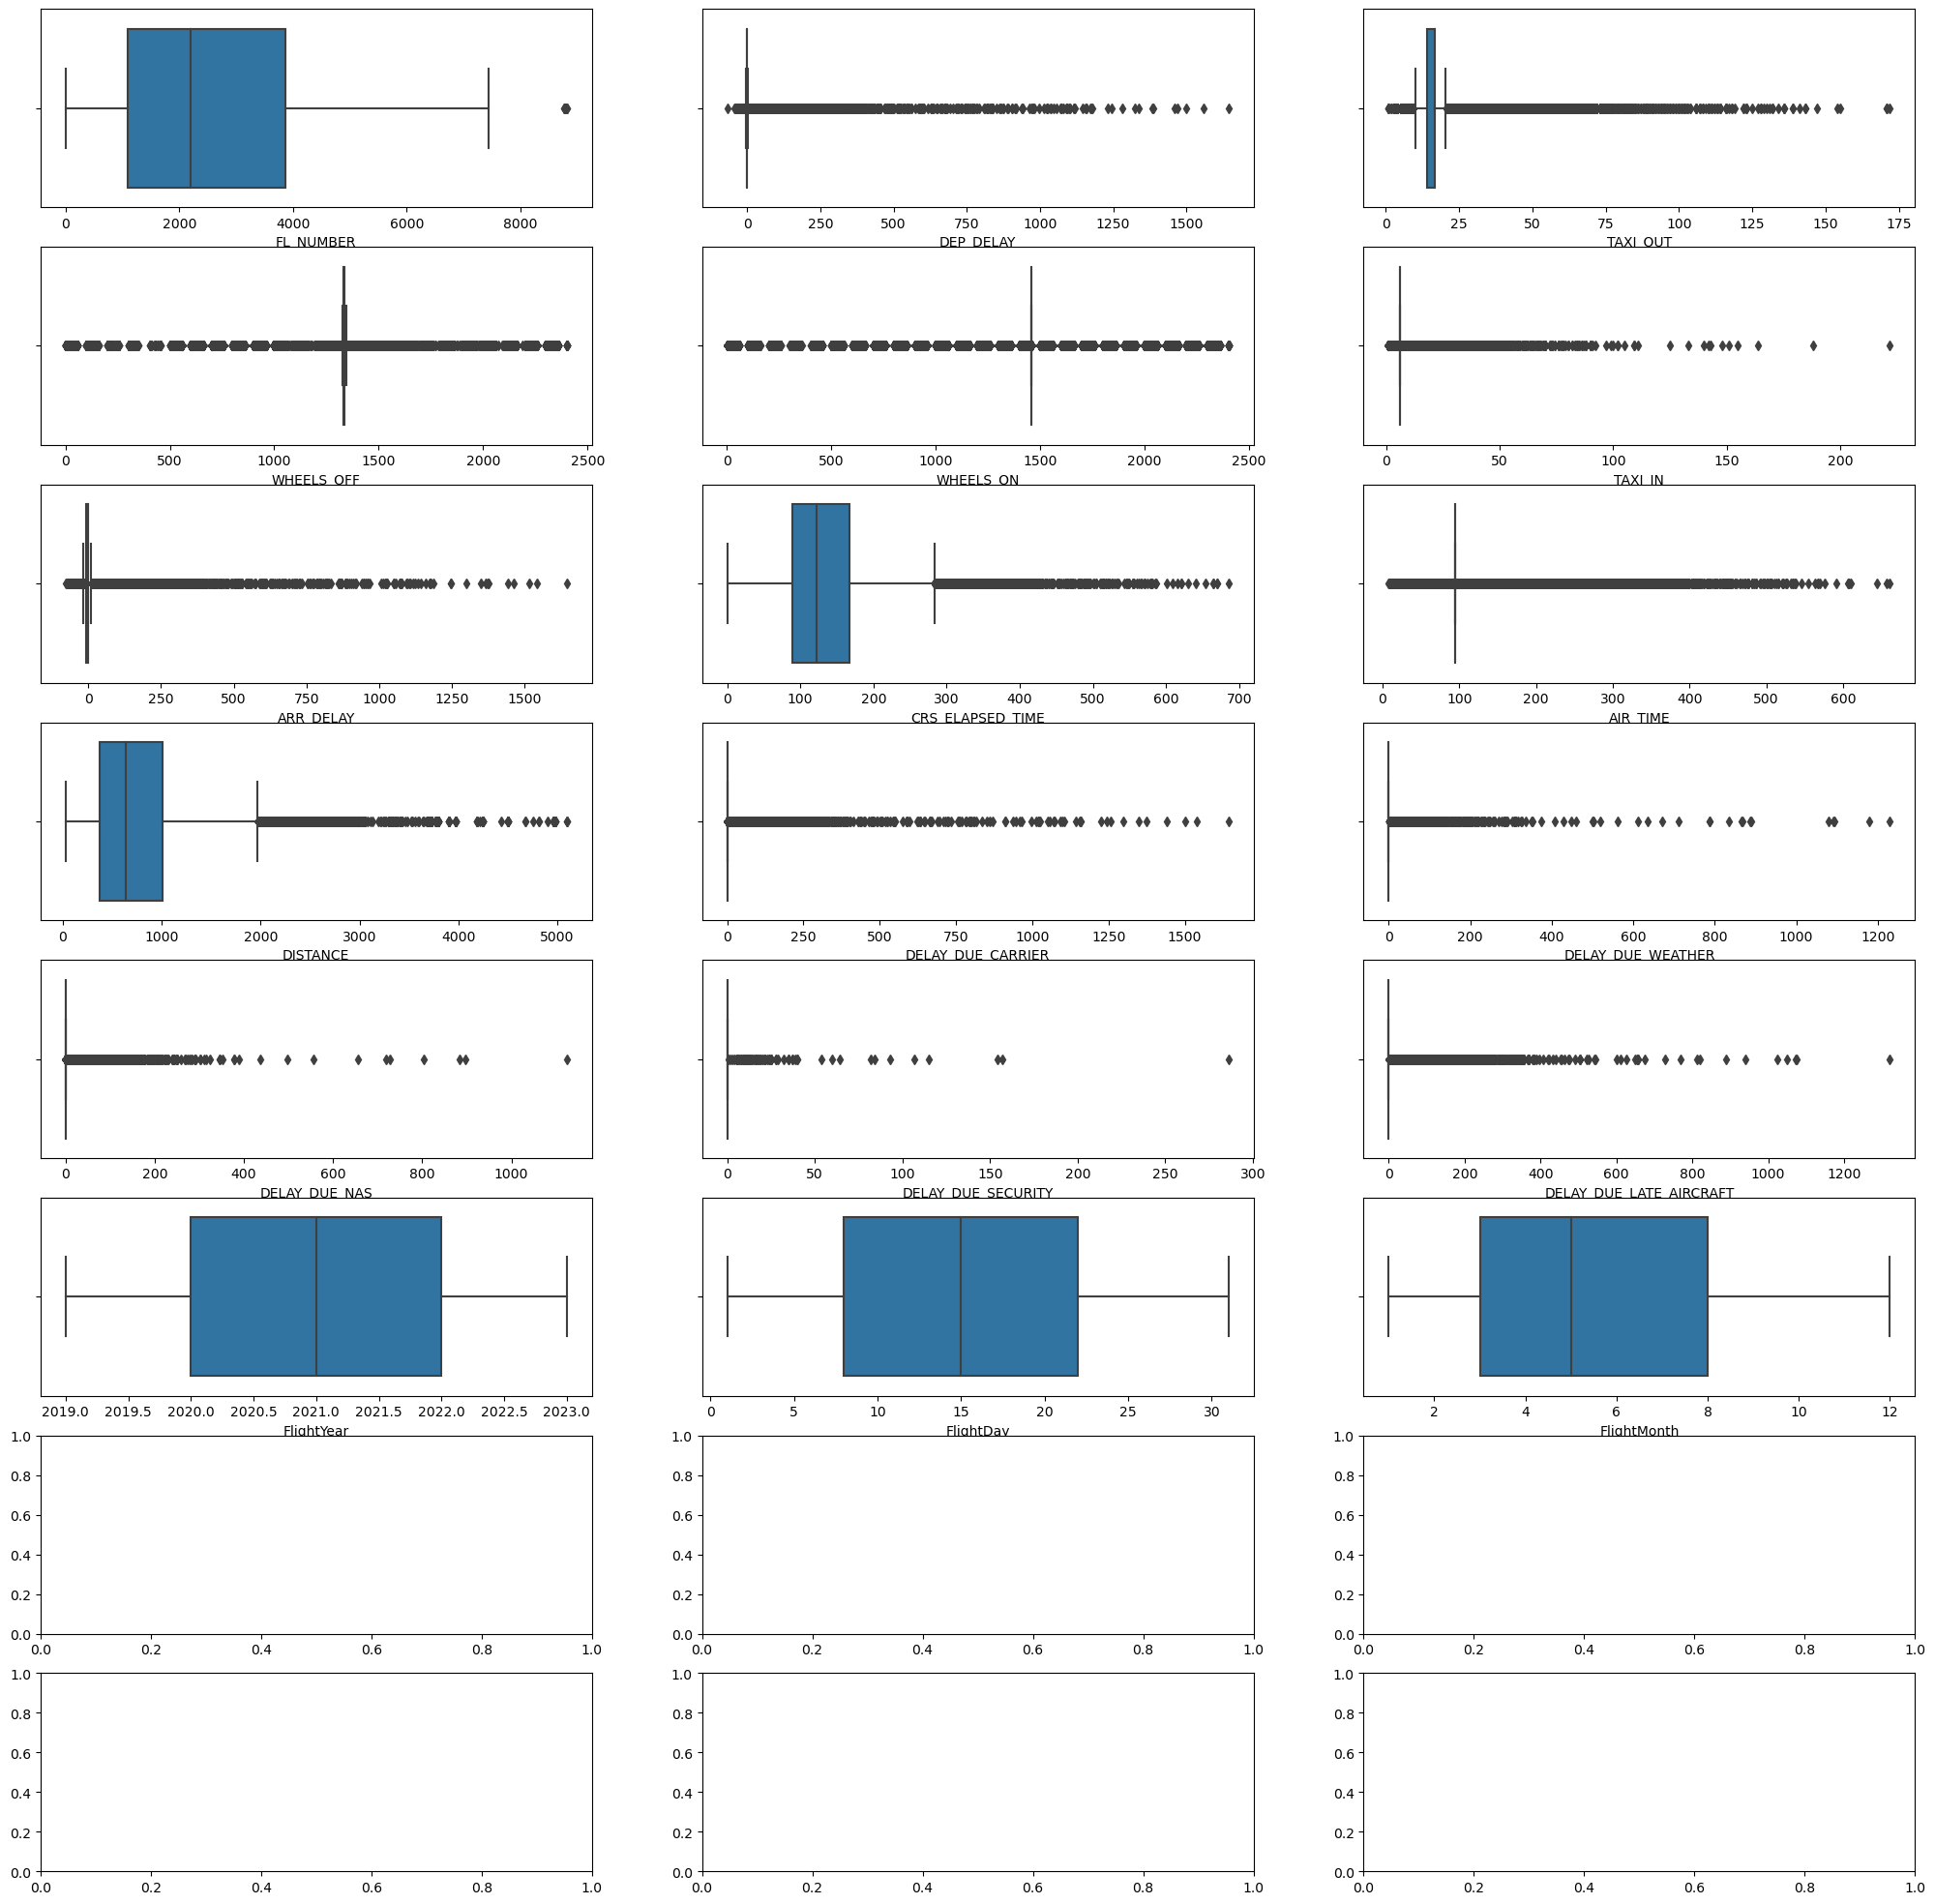

In [294]:
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out_2,ax.flatten()):
    
    sns.boxplot(x=X_out_2[var],ax=subplot)

plt.show()

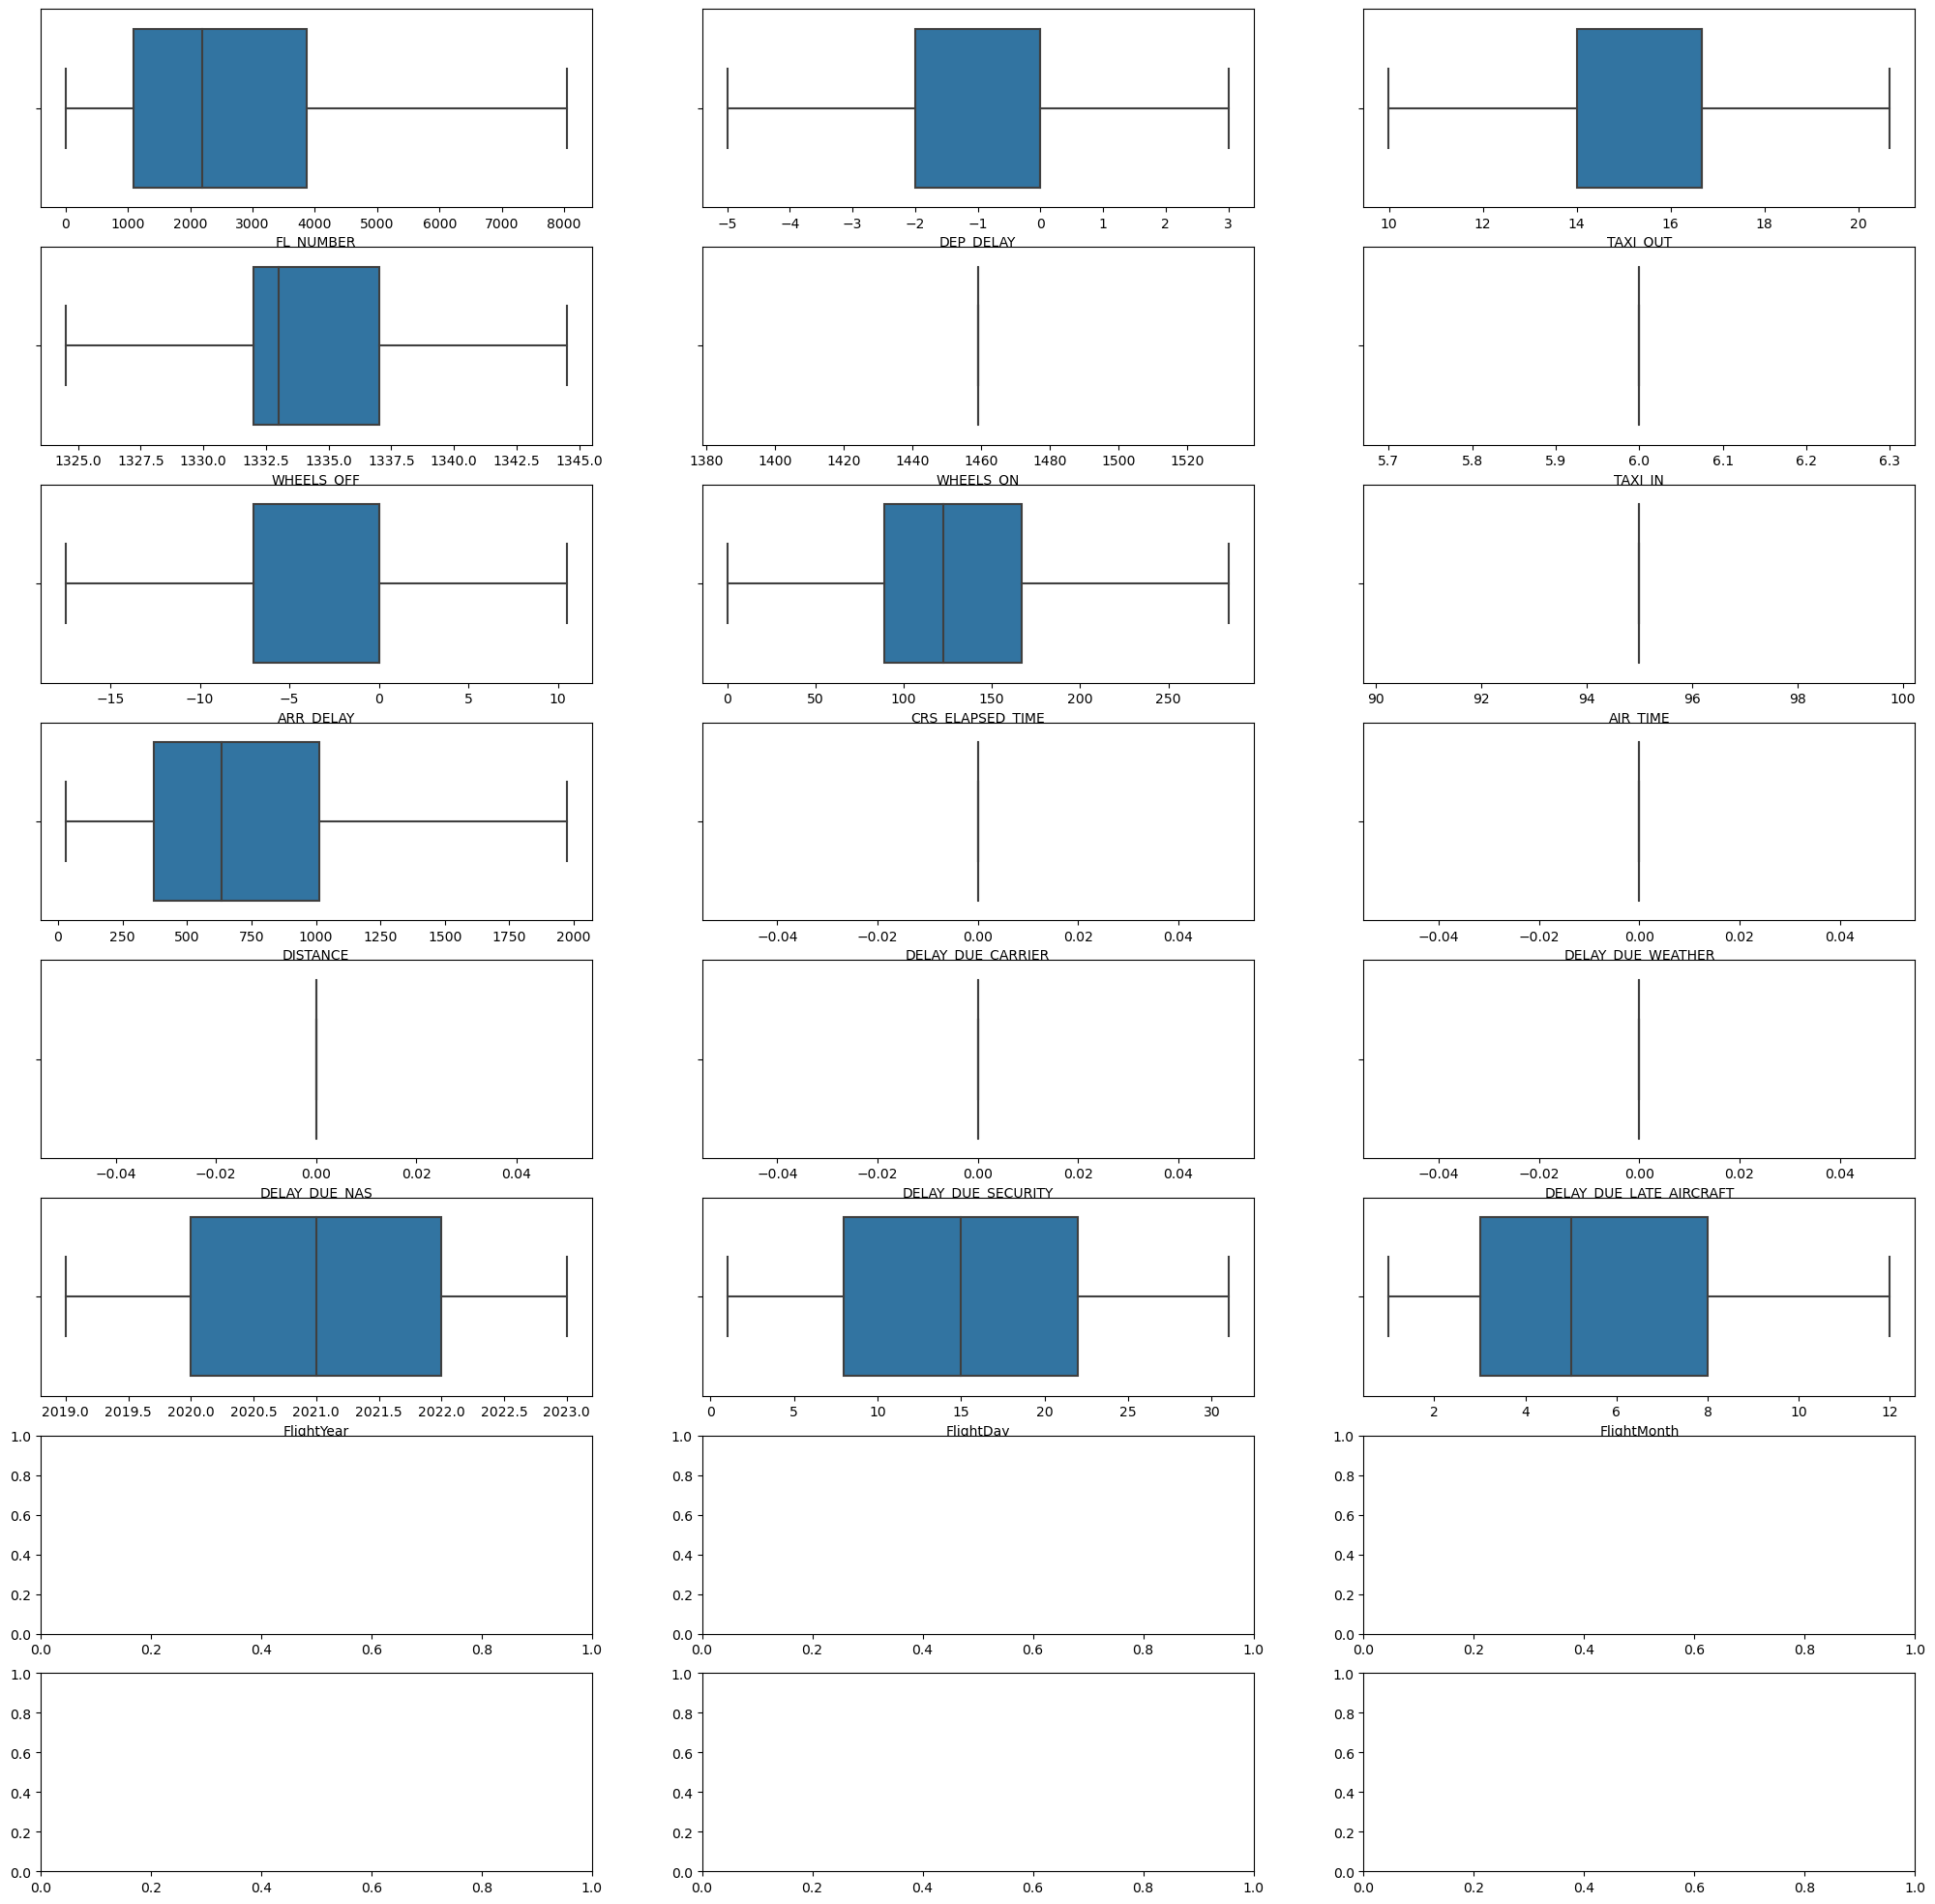

In [295]:
for i in X_out_2:
    q1=X_out_2[i].quantile(0.25)
    q3=X_out_2[i].quantile(0.75)
    iqr=q3-q1
    u=q3+(1.5*iqr)
    l=q1-(1.5*iqr)
    X_out_2[i]=X_out_2[i].apply(lambda x:l if x<l else u if x>u else x)

    
fig, ax=plt.subplots(8,3,figsize=(25,25))
for var, subplot in zip(X_out_2,ax.flatten()):
    
    sns.boxplot(x=X_out_2[var],ax=subplot)

plt.show()

In [296]:
X_res_smote = pd.concat((X_res_smote[['ORIGIN','DEST','CANCELLATION_CODE','AIRLINE_CODE_en']]  ,X_out_2),axis=1)

# FEATURE SELECTION USING SFS

In [297]:
from sklearn.feature_selection  import SequentialFeatureSelector

In [298]:
import statsmodels.api as sm


In [299]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_res_smote, y_res_smote,test_size=0.3,
                                                    random_state=0)

In [300]:
sfs = SequentialFeatureSelector(estimator=DecisionTreeClassifier(),cv=7,n_features_to_select=10)

In [301]:
sfs.fit(X_train2,y_train2)

SequentialFeatureSelector(cv=7, estimator=DecisionTreeClassifier(),
                          n_features_to_select=10)

In [302]:
sfs.get_feature_names_out()

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN'], dtype=object)

In [303]:
X_train2=X_train2[sfs.get_feature_names_out()]
X_test2=X_test2[sfs.get_feature_names_out()]


In [304]:
X_test2.columns

Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
      dtype='object')

In [305]:
X_train2.columns

Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
       'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
      dtype='object')

# MODEL FITTING ON BALANCED DATA WITH FEATURE SELECTION

In [306]:
def performance2(model):
        model.fit(X_train2, y_train2) 
        y_pred_tr = model.predict(X_train2)
        y_pred_tst = model.predict(X_test2)
      
        plt.figure(figsize=(5,5))
        sns.heatmap(confusion_matrix(y_test2,y_pred_tst),annot=True, fmt="d", cmap="Blues", linewidths=.5)
        plt.show()
        
        print("Train")
        print(classification_report(y_train2, y_pred_tr))
        print("Test")
        print(classification_report(y_test2, y_pred_tst))

# GaussianNB

In [307]:



# Assuming X_train2 and y_train2 are your training data
param_grid2 = {
    'var_smoothing': [0.05, 0.045, 0.80, 7, 17, 22]
}


grid_search2 = GridSearchCV(estimator= GaussianNB(), param_grid=param_grid2, cv=5, scoring='accuracy')
grid_search2.fit(X_train2, y_train2)

best_params2 = grid_search2.best_params_
best_estimator2 = grid_search2.best_estimator_

print("Best parameters found: ", best_params2)
print("Best estimator found: ", best_estimator2)


Best parameters found:  {'var_smoothing': 7}
Best estimator found:  GaussianNB(var_smoothing=7)


In [308]:
gn3=GaussianNB(**best_params2)


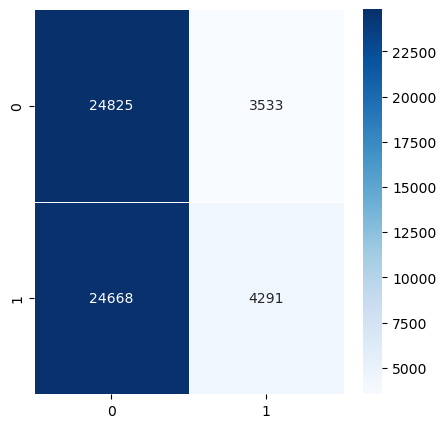

Train
              precision    recall  f1-score   support

           0       0.51      0.88      0.64     67170
           1       0.54      0.15      0.23     66569

    accuracy                           0.51    133739
   macro avg       0.53      0.51      0.44    133739
weighted avg       0.53      0.51      0.44    133739

Test
              precision    recall  f1-score   support

           0       0.50      0.88      0.64     28358
           1       0.55      0.15      0.23     28959

    accuracy                           0.51     57317
   macro avg       0.53      0.51      0.44     57317
weighted avg       0.53      0.51      0.43     57317



In [309]:
performance2(gn3)

# KNeighborsClassifier

In [310]:
s= StandardScaler()

X_trainknn= X_train2.copy()
X_testknn=X_test2.copy()

for i in X_train2.columns:
    X_trainknn[i]=s.fit_transform(X_trainknn[[i]])
    X_testknn[i]=s.transform(X_testknn[[i]])
    




In [311]:

param_gridk = {
    'weights': ['uniform','distance'],
    'n_neighbors':[34,20,76]
}
grid_searchk = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_gridk, cv=5, scoring='accuracy')
grid_searchk.fit(X_trainknn, y_train2)
best_paramsk = grid_searchk.best_params_
kk = grid_searchk.best_estimator_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67170
           1       1.00      1.00      1.00     66569

    accuracy                           1.00    133739
   macro avg       1.00      1.00      1.00    133739
weighted avg       1.00      1.00      1.00    133739

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



<Axes: >

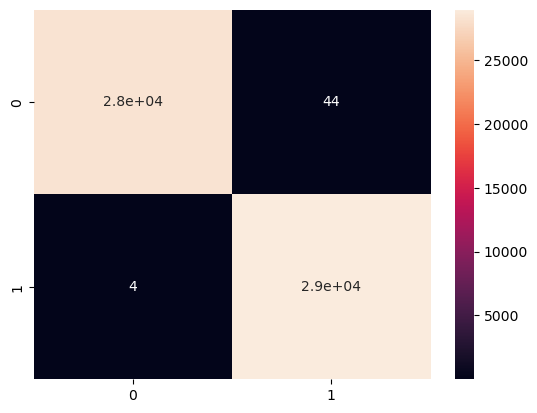

In [312]:
knn2 = KNeighborsClassifier(**best_paramsk)


knn2.fit(X_trainknn,y_train2)

print(classification_report(y_train2,knn2.predict(X_trainknn)))
print(classification_report(y_test2,knn2.predict(X_testknn)))

sns.heatmap(confusion_matrix(y_test2,knn2.predict(X_testknn)),annot=True)

In [313]:
X_test2.columns,X_train2.columns

(Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
        'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
       dtype='object'),
 Index(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en', 'FL_NUMBER',
        'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN'],
       dtype='object'))

# LogisticRegression

In [314]:

param_gridlr2 = {
   
    'max_iter' : range(16,17,18),
    'C': [0.0045,0.00051] }
grid_searchlr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_gridlr2, cv=5, scoring='accuracy')
grid_searchlr.fit(X_train2, y_train2)
best_paramslr = grid_searchlr.best_params_
regul_lr2 = grid_searchlr.best_estimator_

In [315]:
regul_lr2

LogisticRegression(C=0.0045, max_iter=16)

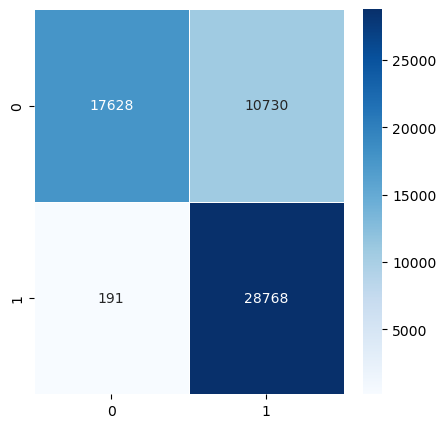

Train
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     67170
           1       0.72      0.99      0.83     66569

    accuracy                           0.80    133739
   macro avg       0.85      0.80      0.80    133739
weighted avg       0.85      0.80      0.80    133739

Test
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     28358
           1       0.73      0.99      0.84     28959

    accuracy                           0.81     57317
   macro avg       0.86      0.81      0.80     57317
weighted avg       0.86      0.81      0.80     57317



In [316]:
lr2 = LogisticRegression(**best_paramslr)
performance2(lr2)

In [317]:
lr2.coef_

array([[ 5.80889857e-04,  6.45880277e-04,  8.71512581e-04,
         2.52479917e-04,  3.06938940e-05,  1.61868573e-01,
         1.86545436e-01, -8.65495953e-02,  7.70835029e-02,
         3.16998641e-04]])

In [318]:
lr2.feature_names_in_

array(['ORIGIN', 'DEST', 'CANCELLATION_CODE', 'AIRLINE_CODE_en',
       'FL_NUMBER', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN'], dtype=object)

# DecisionTreeClassifier

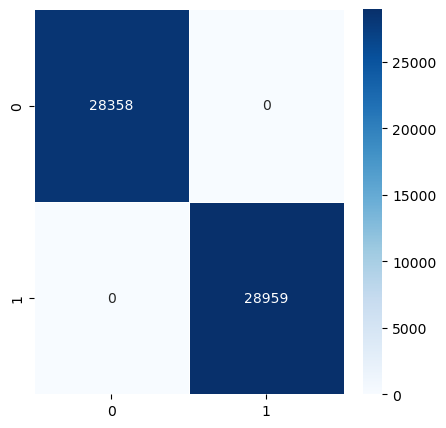

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67170
           1       1.00      1.00      1.00     66569

    accuracy                           1.00    133739
   macro avg       1.00      1.00      1.00    133739
weighted avg       1.00      1.00      1.00    133739

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



In [319]:

param_grid = {
   
    'max_depth' : range(7,16),
    'criterion' : ["gini", "entropy", "log_loss"]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=7, scoring='accuracy')
grid_search.fit(X_train2, y_train2)
best_params = grid_search.best_params_
dt_pruned  = grid_search.best_estimator_

best_params

dt3=DecisionTreeClassifier(**best_params)
performance2(dt3)

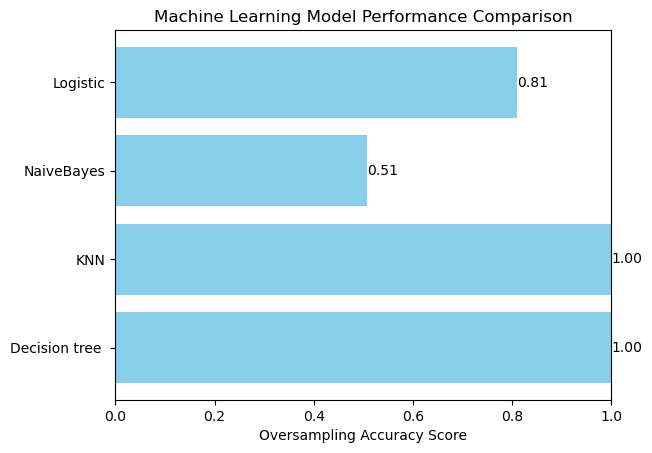

In [320]:
model_names = ['Decision tree ', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores = [accuracy_score(y_test2,dt3.predict(X_test2)),accuracy_score(y_test2,knn2.predict(X_testknn)),accuracy_score(y_test2,gn3.predict(X_test2))
                  ,accuracy_score(y_test2,lr2.predict(X_test2))]


# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Oversampling Accuracy Score')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(accuracy_scores):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

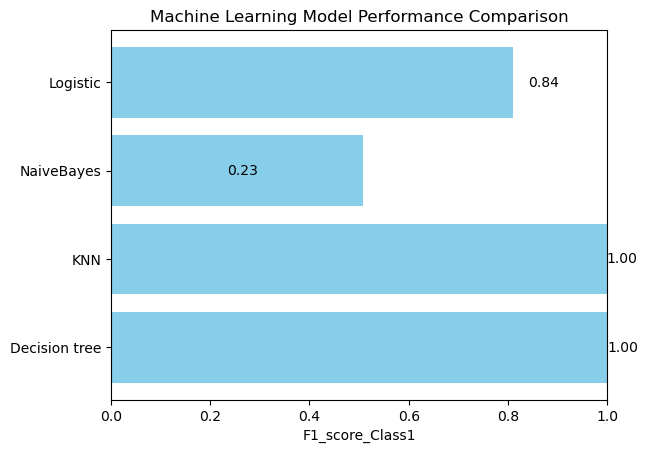

In [321]:
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
F1_score_Class1 = [f1_score(y_test2,dt3.predict(X_test2)),f1_score(y_test2,knn2.predict(X_testknn)),f1_score(y_test2,gn3.predict(X_test2))
                  ,f1_score(y_test2,lr2.predict(X_test2))]

# Create a horizontal bar plot
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('F1_score_Class1')
plt.title('Machine Learning Model Performance Comparison')
plt.xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars
for index, value in enumerate(F1_score_Class1):
    plt.text(value, index, f'{value:.2f}', va='center')

# Show the plot
plt.show()

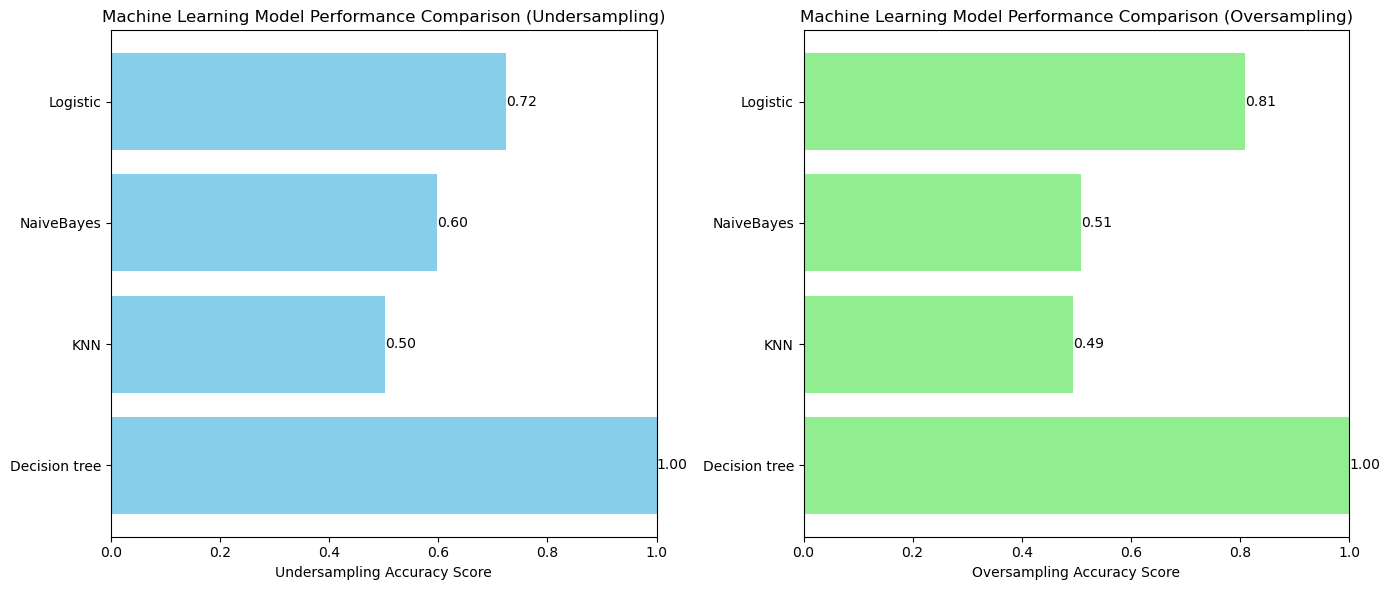

In [322]:


# Sample data and model predictions
model_names = ['Decision tree', 'KNN', 'NaiveBayes', 'Logistic']
accuracy_scores_undersampling = [
    accuracy_score(y_test, dt.predict(X_test)),
    accuracy_score(y_test, kn.predict(X_test)),
    accuracy_score(y_test, gn.predict(X_test)),
    accuracy_score(y_test, lr.predict(X_test))
]

accuracy_scores_oversampling = [
    accuracy_score(y_test2, dt3.predict(X_test2)),
    accuracy_score(y_test2, knn2.predict(X_test2)),
    accuracy_score(y_test2, gn3.predict(X_test2)),
    accuracy_score(y_test2, lr2.predict(X_test2))
]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# First subplot - Undersampling Accuracy Scores
axes[0].barh(model_names, accuracy_scores_undersampling, color='skyblue')
axes[0].set_xlabel('Undersampling Accuracy Score')
axes[0].set_title('Machine Learning Model Performance Comparison (Undersampling)')
axes[0].set_xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

# Display the accuracy scores on the bars for undersampling
for index, value in enumerate(accuracy_scores_undersampling):
    axes[0].text(value, index, f'{value:.2f}', va='center')

# Second subplot - Oversampling Accuracy Scores
axes[1].barh(model_names, accuracy_scores_oversampling, color='lightgreen')
axes[1].set_xlabel('Oversampling Accuracy Score')
axes[1].set_title('Machine Learning Model Performance Comparison (Oversampling)')
axes[1].set_xlim(0, 1)  # Set the x-axis limit to represent accuracy scores between 0 and 1

for index, value in enumerate(accuracy_scores_oversampling):
    axes[1].text(value, index, f'{value:.2f}', va='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()



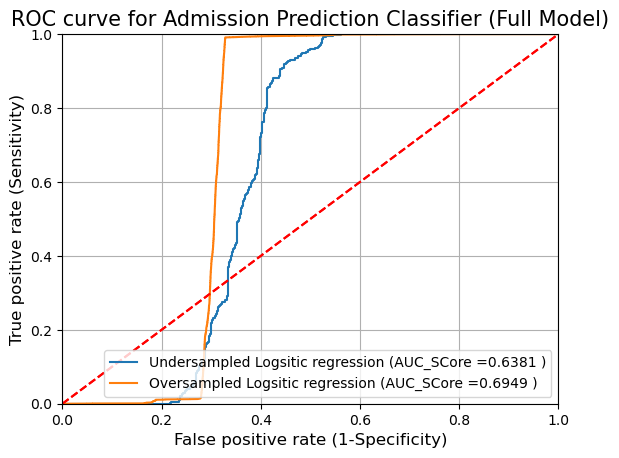

In [323]:

roc_plot(lr,X_test,y_test,'Undersampled Logsitic regression ')
roc_plot(lr2,X_test2,y_test2,'Oversampled Logsitic regression ')

# Use of pipelines 

In [324]:
from sklearn.feature_selection import SelectKBest, f_classif

In [325]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Feature scaling
    ('feature_selection', SelectKBest(f_classif)),     # Feature selection
    ('classifier', RandomForestClassifier())           # Random forest classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'feature_selection__k': [10, 15, 20],                  # Number of features to select
    'classifier__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       562

    accuracy                           1.00      1118
   macro avg       1.00      1.00      1.00      1118
weighted avg       1.00      1.00      1.00      1118



In [326]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),                      # Feature scaling
    ('feature_selection', SelectKBest(f_classif)),     # Feature selection
    ('classifier', RandomForestClassifier())           # Random forest classifier
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'feature_selection__k': [10, 15, 20],                  # Number of features to select
    'classifier__n_estimators': [50, 100, 200],            # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],           # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]              # Minimum number of samples required to be at a leaf node
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train2, y_train2)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test2)

print("Classification Report:\n", classification_report(y_test2, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50, 'feature_selection__k': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28358
           1       1.00      1.00      1.00     28959

    accuracy                           1.00     57317
   macro avg       1.00      1.00      1.00     57317
weighted avg       1.00      1.00      1.00     57317



In [327]:
from sklearn.metrics import mean_squared_error

In [328]:
# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10)

train_errors = []
test_errors = []

# Train models and compute errors
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train, y_train)
    
    # Compute training and test errors
    train_error = mean_squared_error(y_train, model.predict(X_train))
    test_error = mean_squared_error(y_test, model.predict(X_test))
    
    train_errors.append(train_error)
    test_errors.append(test_error)


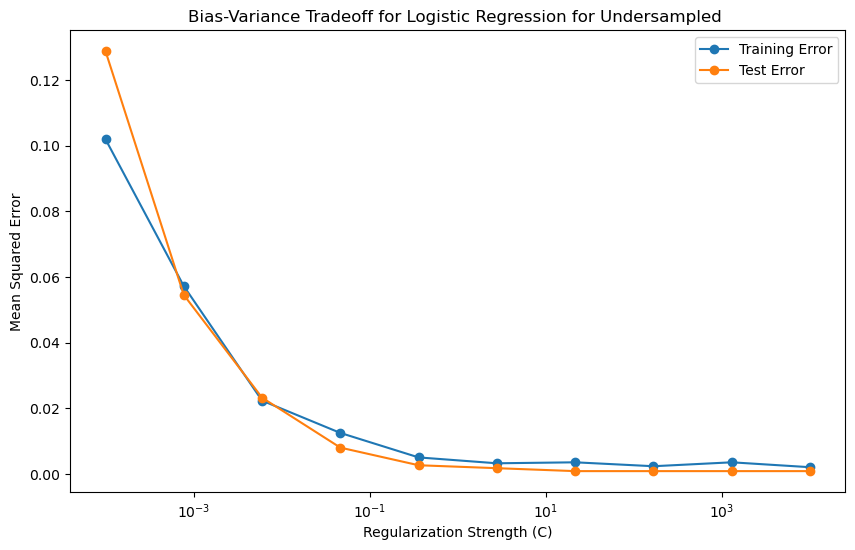

In [329]:
# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o')
plt.plot(C_values, test_errors, label='Test Error', marker='o')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff for Logistic Regression for Undersampled ')
plt.legend()
plt.show()


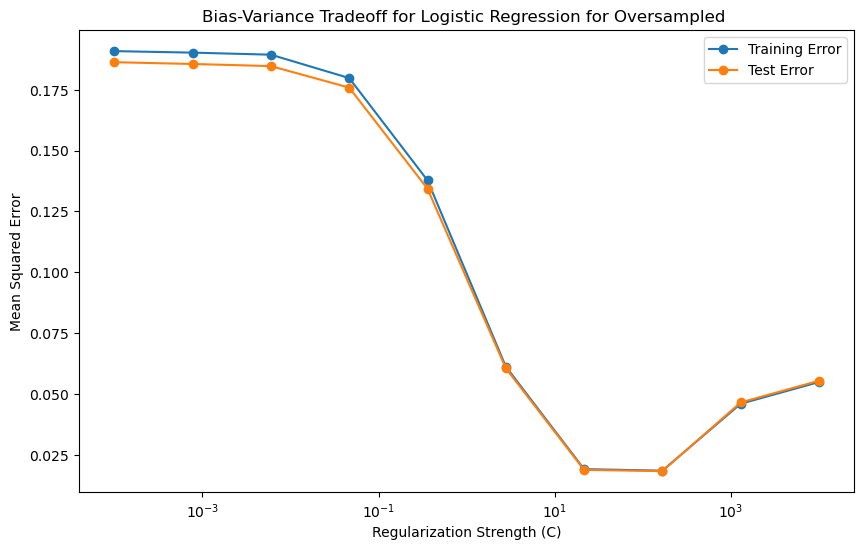

In [330]:
# Define a range of regularization strengths
C_values = np.logspace(-4, 4, 10)

train_errors = []
test_errors = []

# Train models and compute errors
for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear')
    model.fit(X_train2, y_train2)
    
    # Compute training and test errors
    train_error = mean_squared_error(y_train2, model.predict(X_train2))
    test_error = mean_squared_error(y_test2, model.predict(X_test2))
    
    train_errors.append(train_error)
    test_errors.append(test_error)


# Plot the errors
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_errors, label='Training Error', marker='o')
plt.plot(C_values, test_errors, label='Test Error', marker='o')

plt.xscale('log')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff for Logistic Regression for Oversampled ')
plt.legend()
plt.show()
